In [ ]:
# MIT License

# Copyright (c) 2024 GitHub

# Permission is hereby granted, free of charge, to any person obtaining a copy
# of this software and associated documentation files (the "Software"), to deal
# in the Software without restriction, including without limitation the rights
# to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
# copies of the Software, and to permit persons to whom the Software is
# furnished to do so, subject to the following conditions:

# The above copyright notice and this permission notice shall be included in all
# copies or substantial portions of the Software.

# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
# AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
# OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
# SOFTWARE.


# African-American English Vernacular English

African American Vernacular English (AAVE), also known as African American English (AAE) or Black English, is a distinctive dialect of English spoken primarily by African Americans. It has its roots in the linguistic legacy of African slaves brought to the United States, blending elements of West African languages with English. AAVE is characterized by unique grammatical, phonological, and syntactic features, such as the use of double negatives, the dropping of consonant clusters, and a specific set of verb tenses. Although often stigmatized and misunderstood, AAVE is a legitimate, rule-governed variety of English with deep cultural and historical significance. It serves as a powerful tool of identity and cultural expression within the African-American community.

Corpus of Regional African American Language (CORAAL) is a corpus of African American Language Varieties. The data set provides several hours of audio and transcripts from variety of communities. The UF Data studio has added much of the data set to HuggingFace [CORAAL Data Set](https://huggingface.co/datasets/zsayers/CORAAL).

## Import Libraries

In [ ]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import wavfile
from IPython.display import Audio

## Component Details
### CORAAL:ATL (Atlanta, GA 2017; Version 2020.05)

CORAAL:ATL consists of 13 primary speakers across 14 audio files, collected in 2017 and 2018 by Patrick Slay Brooks, a music producer in Atlanta ([www.slayinrecords.com](www.slayinrecords.com)), specifically for CORAAL. Speakers represent a modern friendship network in Atlanta, GA. Atlanta has been  described as a “black mecca" in the South (Hobson 2010), especially in the context of the so- called reverse Great Migration, the movement of African Americans from Northern and Western cities back to the (urban) South. Brooks has a friendship group that highlights a diversity of experiences in Atlanta. Speakers range from being born and raised in Atlanta, to growing up in  places like New York City, Washington DC, and Los Angeles, CA. As with all sub-components,  see metadata for speaker details.

Speakers were interviewed by Brooks for CORAAL to fill a 2 x 2 demographic matrix. In file naming, like with CORAAL:PRV and CORAAL:ROC, the socioeconomic group is listed as “0” (e.g., ATL_se0_ag1_m_01_1) to denote no focus on socioeconomic groups (not to indicate a group lower than 1). We have attempted to capture and include in the metadata broad information about speakers’ demographic backgrounds, such as length of residence and other places lived, but leave questions of interpretation up to end users.

### CORAAL:ATL data

The 14 audio files are 44.1 kHz, 16 bit, mono in WAV format, totaling 8.6 hours and 93.5K
words. Interviews were recording on a Zoom H5 recorder, with either a lapel microphone or an
internal microphone, between 2017 and 2018. Interviews are sociolinguistic styled interviews
and conversations on topics such as life in Atlanta, and the interviewee’s neighborhood,
schooling, and work history.   

Speaker numbers are listed in each cell.

| Socio-Economic Group | Gender | Age Group 1 (under 29) | Age Group 2 (30 to 50) |
|----------------------|--------|-------------------------|-------------------------|
| Group 0             | Female | 3                       | 2                       |
|                      | Male   | 5                       | 3                       |

In [ ]:
import os

# Define the path to the text file containing the URLs and the destination folder
url_file_path = '/content/urls_coraal.txt'
destination_folder = '/content/data/CORAAL'

# Create the destination folder if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)

# Read the URLs from the text file
with open(url_file_path, 'r') as file:
    urls = file.readlines()

# Download each file using wget
for url in urls:
    url = url.strip()  # Remove any leading/trailing whitespace
    if url:
        os.system(f'wget -P {destination_folder} {url}')

In [ ]:
import shutil

sources_list = ["ATL", "DCA", "DCB", "DTA", "LES", "PRV", "ROC", "VLD"]

data_path = '/content/data/CORAAL'
destination_path = [f'/content/data/CORAAL/{i}' for i in sources_list]

for idx in range(len(destination_path)):
    for file in sorted(os.listdir(data_path)):
      if file.startswith(f'{sources_list[idx]}_'):
        shutil.move(f"{data_path}/{file}", destination_path[idx])



In [ ]:
import tarfile

file = tarfile.open('/content/data/CORAAL/ATL/ATL_audio_part01_2020.05.tar.gz')
file.extractall('/content/data/CORAAL/ATL')

In [ ]:
# Set the path to your directory
data_directory = '/content/data/CORAAL/ATL/audio'

# Create a list of file paths
file_paths = [os.path.join(data_directory, filename) for filename in os.listdir(data_directory) if filename.endswith('.wav')]


In [ ]:
# Print paths of files
for paths in file_paths:
    print(paths)

/content/data/CORAAL/ATL/audio/ATL_se0_ag1_m_01_1.wav
/content/data/CORAAL/ATL/audio/ATL_se0_ag1_f_03_1.wav
/content/data/CORAAL/ATL/audio/ATL_se0_ag1_f_01_1.wav
/content/data/CORAAL/ATL/audio/ATL_se0_ag1_f_02_1.wav


In [ ]:
# Set test path to first file in file_paths list
test_path = file_paths[0]
print(test_path) # Print test_path

/content/data/CORAAL/ATL/audio/ATL_se0_ag1_m_01_1.wav


## Visualize some basic properties of the audio recordings

In [ ]:
# Load audio file
sr, y = wavfile.read(test_path) # read .wav audio file - returns sample rate and audio data
sr = sr/1000 # Converts sample rate from Hz to kHz

# Calculate duration
duration = len(y) / sr # duration = total number of samples in audio data divided by duration

# Generate a time array for plotting - represents time axis for each sample in audio data
time = np.linspace(0, duration, len(y)) # Create linearly spaced array that iterates from 0 to the duration containing len(y) points

# Get number of audio samples
num_samples = len(y)
num_channels = 1 if len(y.shape) == 1 else y.shape[1]  # audio data is one-dimensional (mono audio file), so there are 1 channels


### Audio Properties

1. **Audio Information**: Properties of the audio sample (frequency, samples, duration, channels)
1. **Waveform**: Amplitude of the audio signal over time.
1. **Spectrogram**: Frequency content of the audio signal over time.

In [ ]:
# Print audio information
print(f"File: {test_path}")
print(f"Sample Rate: {sr} kHz")
print(f"Duration: {duration:.2f} seconds")
print(f"Number of Samples: {num_samples}")
print(f"Number of Channels: {num_channels}")

File: /content/data/CORAAL/ATL/audio/ATL_se0_ag1_m_01_1.wav
Sample Rate: 44.1 kHz
Duration: 2756499.93 seconds
Number of Samples: 121561647
Number of Channels: 1


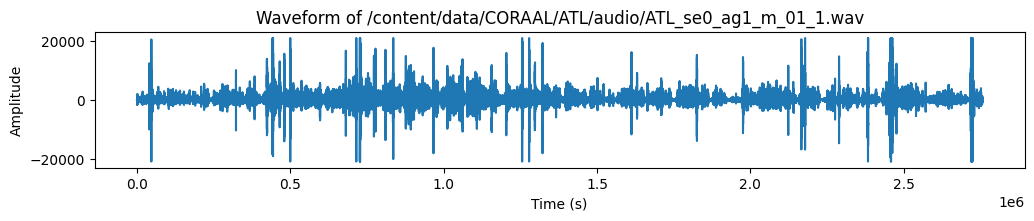

In [ ]:
# Plot Time and Amplitude of Waveforms
plt.figure(figsize=(12, 6)) # set height and width of figure
plt.subplot(3, 1, 1) # create subplot with 3 rows and 1 column + set current subplot to first position
plt.plot(time, y)
plt.title(f'Waveform of {test_path}')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In [ ]:
# Plot Spectrogram of Time and Frequency
plt.subplot(3, 1, 2) # 3 rows, 1 column, current plot will be the second subplot - create multiple plots in a single figure
# y = audio signal data, Fs = sample rate of audio data in Hz, NFFT = num data points used in each block for FFT
# nonoverlap = overlapping between consecutive FFT windows, cmap = plasma colormap for spectogram
plt.specgram(y, Fs=sr, NFFT=1024, noverlap=512, cmap='plasma')
plt.title('Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()

In [ ]:
# Display audio widget from test_path
display(Audio(test_path))

## Audio File Analysis

1. **Duration Analysis**: Calculate the duration of each audio file to understand the average length of interviews.
1. **Sample Rate and Channels**: Check the sample rate and number of channels to ensure consistency across your dataset.
1. **Signal Visualization**: Plot waveforms of a few audio samples to visualize variations in speech patterns.
1. **Spectrograms**: Generate spectrograms to analyze frequency content and observe characteristics of speech patterns.

In [ ]:
def audio_properties(filepath): # Takes file path of audio file as an argument and returns dictionary containing various properties
    # Load the audio file
    sr, y = wavfile.read(filepath)
    sr = sr/1000 # Converts sample rate from Hz to kHz

    # Calculate duration of audio file in seconds
    duration = (len(y) / sr)

    # Generate a time array for plotting
    time = np.linspace(0, duration, len(y))

    # Calculates total number of samples in audio data
    num_samples = len(y)
    # Determines number of audio channels
    num_channels = 1 if len(y.shape) == 1 else y.shape[1]  # If data is one-dimensional, it is a mono audio file; if audio data is two-dimensional, it is a stereo audio file

    # Create/return dictionary of audio properties
    audio_prop_dict = {"Audio Path": filepath,
                       "Sample Rate (kHz)": sr,
                       "Duration (s)": duration,
                       "Number of Samples": num_samples,
                       "Number of Channels": num_channels}
    return audio_prop_dict

In [ ]:
# Call function for test_path
audio_properties(file_paths[0])

{'Audio Path': '/content/data/CORAAL/ATL/audio/ATL_se0_ag1_m_01_1.wav',
 'Sample Rate (kHz)': 44.1,
 'Duration (s)': 2756499.931972789,
 'Number of Samples': 121561647,
 'Number of Channels': 1}

In [ ]:
# Declare/initialize audio property list
audio_prop_list = []

# Iterate through file paths and store audio properties of each file in file_paths to audio properties list
for paths in file_paths:
    prop = audio_properties(paths)
    audio_prop_list.append(prop)

print(audio_prop_list)

[{'Audio Path': '/content/data/CORAAL/ATL/audio/ATL_se0_ag1_m_01_1.wav', 'Sample Rate (kHz)': 44.1, 'Duration (s)': 2756499.931972789, 'Number of Samples': 121561647, 'Number of Channels': 1}, {'Audio Path': '/content/data/CORAAL/ATL/audio/ATL_se0_ag1_f_03_1.wav', 'Sample Rate (kHz)': 44.1, 'Duration (s)': 1808800.0, 'Number of Samples': 79768080, 'Number of Channels': 1}, {'Audio Path': '/content/data/CORAAL/ATL/audio/ATL_se0_ag1_f_01_1.wav', 'Sample Rate (kHz)': 44.1, 'Duration (s)': 1862999.909297052, 'Number of Samples': 82158296, 'Number of Channels': 1}, {'Audio Path': '/content/data/CORAAL/ATL/audio/ATL_se0_ag1_f_02_1.wav', 'Sample Rate (kHz)': 44.1, 'Duration (s)': 2211799.977324263, 'Number of Samples': 97540379, 'Number of Channels': 1}]


In [ ]:
# Create/display DataFrame from audio properties
df = pd.DataFrame(audio_prop_list)
display(df)

Audio Path  Sample Rate (kHz)  \
0  /content/data/CORAAL/ATL/audio/ATL_se0_ag1_m_0...               44.1   
1  /content/data/CORAAL/ATL/audio/ATL_se0_ag1_f_0...               44.1   
2  /content/data/CORAAL/ATL/audio/ATL_se0_ag1_f_0...               44.1   
3  /content/data/CORAAL/ATL/audio/ATL_se0_ag1_f_0...               44.1   

   Duration (s)  Number of Samples  Number of Channels  
0  2.756500e+06          121561647                   1  
1  1.808800e+06           79768080                   1  
2  1.863000e+06           82158296                   1  
3  2.211800e+06           97540379                   1

In [ ]:
# Get DataFrame details
df.describe()

Sample Rate (kHz)  Duration (s)  Number of Samples  Number of Channels
count                4.0  4.000000e+00       4.000000e+00                 4.0
mean                44.1  2.160025e+06       9.525710e+07                 1.0
std                  0.0  4.359074e+05       1.922352e+07                 0.0
min                 44.1  1.808800e+06       7.976808e+07                 1.0
25%                 44.1  1.849450e+06       8.156074e+07                 1.0
50%                 44.1  2.037400e+06       8.984934e+07                 1.0
75%                 44.1  2.347975e+06       1.035457e+08                 1.0
max                 44.1  2.756500e+06       1.215616e+08                 1.0

In [ ]:
# Get DataFrame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Audio Path          4 non-null      object 
 1   Sample Rate (kHz)   4 non-null      float64
 2   Duration (s)        4 non-null      float64
 3   Number of Samples   4 non-null      int64  
 4   Number of Channels  4 non-null      int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 288.0+ bytes


In [ ]:
# Find/print shortest and longest duration
shortest_duration = df['Duration (s)'].min()
longest_duration = df['Duration (s)'].max()

print("Shortest Sample Duration:", shortest_duration,
      "\nLongest Sample Duration:", longest_duration)

Shortest Sample Duration: 1808800.0 
Longest Sample Duration: 2756499.931972789


In [ ]:
# Find/print shortest and longest sample frequencies
shortest_sample_freq = df['Number of Samples'].min()
longest_sample_freq = df['Number of Samples'].max()

print("Shortest Sample Frequency:", shortest_sample_freq,
      "\nLongest Sample Frequency:", longest_sample_freq)

Shortest Sample Frequency: 79768080 
Longest Sample Frequency: 121561647


## Analyzing Transcript

In [ ]:
# Set the path to your directory
data_directory = '/content/text'

# Create list of file paths
file_paths = [os.path.join(data_directory, filename) for filename in os.listdir(data_directory) if filename.endswith('.txt')]


In [ ]:
# Print all filepaths
file_paths

['/content/text/DCA_se2_ag1_m_03_1.txt',
 '/content/text/DCA_se2_ag1_f_05_1.txt',
 '/content/text/DCA_se1_ag1_f_04_1.txt',
 '/content/text/PRV_se0_ag3_m_01_1.txt',
 '/content/text/PRV_se0_ag3_f_02_1.txt',
 '/content/text/ATL_se0_ag1_f_02_1.txt',
 '/content/text/DCA_se2_ag2_m_03_1.txt',
 '/content/text/PRV_se0_ag2_f_01_3.txt',
 '/content/text/DTA_se3_ag4_f_03_1.txt',
 '/content/text/PRV_se0_ag2_f_01_4.txt',
 '/content/text/PRV_se0_ag2_f_03_1.txt',
 '/content/text/DTA_se1_ag4_f_01_1.txt',
 '/content/text/DTA_se1_ag1_f_01_1.txt',
 '/content/text/DCA_se1_ag3_f_01_1.txt',
 '/content/text/DCB_se2_ag3_m_02_1.txt',
 '/content/text/DTA_se3_ag1_m_01_1.txt',
 '/content/text/DTA_se3_ag1_m_02_1.txt',
 '/content/text/DCB_se2_ag4_f_02_1.txt',
 '/content/text/LES_se0_ag2_f_02_2.txt',
 '/content/text/ROC_se0_ag1_f_03_1.txt',
 '/content/text/DCB_se3_ag2_f_01_1.txt',
 '/content/text/DCB_se1_ag4_f_01_1.txt',
 '/content/text/DCA_se1_ag1_m_01_1.txt',
 '/content/text/DCB_se3_ag4_f_01_1.txt',
 '/content/text/

In [ ]:
# Reads transcript file into DataFrame
def transcript_properties(filepath):
    # filepath = path to transcript file, delimiter = columns in file are separated by tables, index_col = sets "Line" column as DataFrame index
    df = pd.read_csv(filepath, delimiter="\t", index_col="Line")
    df['Audio Path'] = filepath # Adds new column to DataFrame
    return df

In [ ]:
# Displays transcript properties
for paths in file_paths:
    display(transcript_properties(paths).head())

Spkr  StTime                               Content  EnTime  \
Line                                                                           
1           DCA_int_07  0.5307                    What was it again?  1.0296   
2     DCA_se2_ag1_m_03  1.3327                          /RD-NAME-2/.  2.2792   
3           DCA_int_07  2.1673                          /RD-NAME-2/?  2.7782   
4           DCA_int_07  3.6455  You live in Washington, /RD-NAME-1/?  4.6760   
5     DCA_se2_ag1_m_03  5.1318                             Yes I do.  5.5235   

                                Audio Path  
Line                                        
1     /content/text/DCA_se2_ag1_m_03_1.txt  
2     /content/text/DCA_se2_ag1_m_03_1.txt  
3     /content/text/DCA_se2_ag1_m_03_1.txt  
4     /content/text/DCA_se2_ag1_m_03_1.txt  
5     /content/text/DCA_se2_ag1_m_03_1.txt

Spkr  StTime                                            Content  \
Line                                                                          
1     DCA_int_02  0.5054                                          Okay, uh,   
2     DCA_int_02  1.5037                                       (pause 0.70)   
3     DCA_int_02  2.2035                                           tell me,   
4     DCA_int_02  2.7257                                       (pause 1.05)   
5     DCA_int_02  3.7795  when you were smaller, what kinds of games did...   

      EnTime                            Audio Path  
Line                                                
1     1.5037  /content/text/DCA_se2_ag1_f_05_1.txt  
2     2.2035  /content/text/DCA_se2_ag1_f_05_1.txt  
3     2.7257  /content/text/DCA_se2_ag1_f_05_1.txt  
4     3.7795  /content/text/DCA_se2_ag1_f_05_1.txt  
5     8.2314  /content/text/DCA_se2_ag1_f_05_1.txt

Spkr  StTime               Content  EnTime  \
Line                                                     
1     DCA_int_03  0.3837                  Okay  0.6686   
2     DCA_int_03  0.6686          (pause 0.20)  0.8686   
3     DCA_int_03  0.8686  say your name again.  1.7134   
4     DCA_int_03  1.7134          (pause 0.28)  1.9934   
5     DCA_int_03  1.9934      Your whole name.  2.5333   

                                Audio Path  
Line                                        
1     /content/text/DCA_se1_ag1_f_04_1.txt  
2     /content/text/DCA_se1_ag1_f_04_1.txt  
3     /content/text/DCA_se1_ag1_f_04_1.txt  
4     /content/text/DCA_se1_ag1_f_04_1.txt  
5     /content/text/DCA_se1_ag1_f_04_1.txt

Spkr  StTime  \
Line                             
1           PRV_int_01  1.0257   
2           PRV_int_01  2.0102   
3           PRV_int_01  2.4200   
4     PRV_se0_ag3_m_01  6.7511   
5     PRV_se0_ag3_m_01  7.7309   

                                                Content  EnTime  \
Line                                                              
1                                    So you were saying  2.0102   
2                                          (pause 0.41)  2.4200   
3     you had some pictures there of- you did a fund...  6.4602   
4                                             Yeah, um,  7.7309   
5                                          (pause 0.73)  8.4649   

                                Audio Path  
Line                                        
1     /content/text/PRV_se0_ag3_m_01_1.txt  
2     /content/text/PRV_se0_ag3_m_01_1.txt  
3     /content/text/PRV_se0_ag3_m_01_1.txt  
4     /content/text/PRV_se0_ag3_m_01_1.txt  
5     /content/text/PRV_se0_ag3_m_01_1.txt

Spkr  StTime                              Content  EnTime  \
Line                                                                          
1           PRV_int_01  0.2090           And w- when were you born?  1.3221   
2     PRV_se0_ag3_f_02  1.5709                        Nineteen, uh,  3.0124   
3     PRV_se0_ag3_f_02  3.0124                         (pause 0.70)  3.7140   
4     PRV_se0_ag3_f_02  3.7140  thirty-nine, November the eleventh.  5.7155   
5           PRV_int_01  5.6514                   November eleventh?  6.3276   

                                Audio Path  
Line                                        
1     /content/text/PRV_se0_ag3_f_02_1.txt  
2     /content/text/PRV_se0_ag3_f_02_1.txt  
3     /content/text/PRV_se0_ag3_f_02_1.txt  
4     /content/text/PRV_se0_ag3_f_02_1.txt  
5     /content/text/PRV_se0_ag3_f_02_1.txt

Spkr  StTime                      Content  EnTime  \
Line                                                            
1     ATL_int_01  1.1436                        Okay.  1.7576   
2     ATL_int_01  1.7576                 (pause 0.16)  1.9174   
3     ATL_int_01  1.9174                          Um,  2.4949   
4     ATL_int_01  2.4949                 (pause 0.85)  3.3405   
5     ATL_int_01  3.3405  my name is /RD-NAME-3/, and  5.4601   

                                Audio Path  
Line                                        
1     /content/text/ATL_se0_ag1_f_02_1.txt  
2     /content/text/ATL_se0_ag1_f_02_1.txt  
3     /content/text/ATL_se0_ag1_f_02_1.txt  
4     /content/text/ATL_se0_ag1_f_02_1.txt  
5     /content/text/ATL_se0_ag1_f_02_1.txt

Spkr   StTime  \
Line                              
1           DCA_int_01   0.4621   
2     DCA_se2_ag2_m_03   7.5830   
3           DCA_int_01   9.7187   
4     DCA_se2_ag2_m_03  12.6475   
5     DCA_se2_ag2_m_03  15.4576   

                                                Content   EnTime  \
Line                                                               
1     Okay, /RD-NAME-3/, uh do you remember what kin...   5.8931   
2                  When I was ten? Let's see [<laugh>.]  11.6387   
3                        [Can you remember those days?]  11.2252   
4     Uh, there was a number of games <laugh> I used...  15.4576   
5                                          (pause 0.64)  16.0991   

                                Audio Path  
Line                                        
1     /content/text/DCA_se2_ag2_m_03_1.txt  
2     /content/text/DCA_se2_ag2_m_03_1.txt  
3     /content/text/DCA_se2_ag2_m_03_1.txt  
4     /content/text/DCA_se2_ag2_m_03_1.txt  
5     /content/text/DCA_se2_ag2_m_03_1.txt

Spkr  StTime                                            Content  \
Line                                                                          
1     PRV_int_01  0.4758  Just in terms of what you know and what you le...   
2     PRV_int_01  2.6615                                       (pause 0.36)   
3     PRV_int_01  3.0252                from your parents and grandparents,   
4     PRV_int_01  4.6479                                       (pause 0.45)   
5     PRV_int_01  5.0956                                         it sounds-   

      EnTime                            Audio Path  
Line                                                
1     2.6615  /content/text/PRV_se0_ag2_f_01_3.txt  
2     3.0252  /content/text/PRV_se0_ag2_f_01_3.txt  
3     4.6479  /content/text/PRV_se0_ag2_f_01_3.txt  
4     5.0956  /content/text/PRV_se0_ag2_f_01_3.txt  
5     5.6271  /content/text/PRV_se0_ag2_f_01_3.txt

Spkr   StTime  \
Line                              
1     DTA_se3_ag4_f_03   0.4970   
2           DTA_int_03   0.5031   
3     DTA_se3_ag4_f_03   6.9434   
4     DTA_se3_ag4_f_03   9.2860   
5     DTA_se3_ag4_f_03  10.2867   

                                                Content   EnTime  \
Line                                                               
1     [That] could be it too. Because now, we didn't...   6.5468   
2                                              [Mm-hm.]   0.8143   
3                        lot of things like science and   9.2860   
4                                          (pause 1.00)  10.2867   
5     l- the only extra curricular thing we had was uh,  13.7204   

                                Audio Path  
Line                                        
1     /content/text/DTA_se3_ag4_f_03_1.txt  
2     /content/text/DTA_se3_ag4_f_03_1.txt  
3     /content/text/DTA_se3_ag4_f_03_1.txt  
4     /content/text/DTA_se3_ag4_f_03_1.txt  
5     /content/text/DTA_se3_ag4_f_03_1.txt

Spkr  StTime                                      Content  \
Line                                                                          
1           PRV_int_01  0.4730  Did you- when did you move over to Tarboro?   
2     PRV_se0_ag2_f_01  3.0469            I moved to Tarboro in [nineteen-]   
3           PRV_int_01  6.3704                                    [<cough>]   
4     PRV_se0_ag2_f_01  8.1097                                          Hm.   
5           PRV_int_01  9.2708                                      <laugh>   

      EnTime                            Audio Path  
Line                                                
1     2.5853  /content/text/PRV_se0_ag2_f_01_4.txt  
2     6.6456  /content/text/PRV_se0_ag2_f_01_4.txt  
3     7.1678  /content/text/PRV_se0_ag2_f_01_4.txt  
4     8.5760  /content/text/PRV_se0_ag2_f_01_4.txt  
5     9.6018  /content/text/PRV_se0_ag2_f_01_4.txt

Spkr  StTime  \
Line                             
1     PRV_se0_ag2_f_03  0.5988   
2     PRV_se0_ag2_f_03  3.6026   
3     PRV_se0_ag2_f_03  5.3586   
4           PRV_int_02  7.0731   
5     PRV_se0_ag2_f_03  7.8673   

                                                Content  EnTime  \
Line                                                              
1     And then we left from there, but then we left ...  3.6026   
2                                          (pause 1.76)  5.3586   
3       Out there where all the trailers and things at?  7.1242   
4                                                 /Mm/.  7.4086   
5                   And we stayed out there for a year-  9.7445   

                                Audio Path  
Line                                        
1     /content/text/PRV_se0_ag2_f_03_1.txt  
2     /content/text/PRV_se0_ag2_f_03_1.txt  
3     /content/text/PRV_se0_ag2_f_03_1.txt  
4     /content/text/PRV_se0_ag2_f_03_1.txt  
5     /content/text/PRV_se0_ag2_f_03_1.txt

Spkr  StTime                                            Content  \
Line                                                                          
1     DTA_int_03  0.2811                                       Pretty good.   
2     DTA_int_03  0.8872                                       (pause 0.12)   
3     DTA_int_03  1.0032                                           Uh, now.   
4     DTA_int_03  1.8918                                       (pause 0.55)   
5     DTA_int_03  2.4445  <ts> Can you tell me about some of the games y...   

      EnTime                            Audio Path  
Line                                                
1     0.8872  /content/text/DTA_se1_ag4_f_01_1.txt  
2     1.0032  /content/text/DTA_se1_ag4_f_01_1.txt  
3     1.8918  /content/text/DTA_se1_ag4_f_01_1.txt  
4     2.4445  /content/text/DTA_se1_ag4_f_01_1.txt  
5     5.3223  /content/text/DTA_se1_ag4_f_01_1.txt

Spkr  StTime  \
Line                             
1     DTA_se1_ag1_f_01  0.5503   
2     DTA_se1_ag1_f_01  5.1573   
3     DTA_se1_ag1_f_01  7.2612   
4           DTA_int_03  7.9660   
5           DTA_int_03  8.4389   

                                                Content  EnTime  \
Line                                                              
1     One. Two. Three. Four. Five. Six. Seven. Eight...  5.1573   
2                                          (pause 2.10)  7.2612   
3                                                  Yes.  7.7178   
4                                                 Okay.  8.4389   
5                                          (pause 1.53)  9.9653   

                                Audio Path  
Line                                        
1     /content/text/DTA_se1_ag1_f_01_1.txt  
2     /content/text/DTA_se1_ag1_f_01_1.txt  
3     /content/text/DTA_se1_ag1_f_01_1.txt  
4     /content/text/DTA_se1_ag1_f_01_1.txt  
5     /content/text/DTA_se1_ag1_f_01_1.txt

Spkr  StTime  \
Line                             
1           DCA_int_03  0.4882   
2     DCA_se1_ag3_f_01  3.5167   
3     DCA_se1_ag3_f_01  5.7553   
4     DCA_se1_ag3_f_01  5.9481   
5     DCA_se1_ag3_f_01  6.8293   

                                                Content  EnTime  \
Line                                                              
1     What kind of games did you play when you were ...  2.6009   
2                        Oh, the usual childhood games,  5.7553   
3                                          (pause 0.19)  5.9481   
4                                            hopscotch,  6.8293   
5                                          (pause 0.34)  7.1716   

                                Audio Path  
Line                                        
1     /content/text/DCA_se1_ag3_f_01_1.txt  
2     /content/text/DCA_se1_ag3_f_01_1.txt  
3     /content/text/DCA_se1_ag3_f_01_1.txt  
4     /content/text/DCA_se1_ag3_f_01_1.txt  
5     /content/text/DCA_se1_ag3_f_01_1.txt

Spkr  StTime                   Content  EnTime  \
Line                                                               
1           DCB_int_01  0.4754             And birthday?  1.2215   
2     DCB_se2_ag3_m_02  1.7717      Twelve twenty three,  2.9001   
3     DCB_se2_ag3_m_02  2.9001              (pause 0.09)  2.9934   
4     DCB_se2_ag3_m_02  2.9934    nineteen eighty three.  4.2605   
5           DCB_int_01  6.7925  And where were you born?  7.6178   

                                Audio Path  
Line                                        
1     /content/text/DCB_se2_ag3_m_02_1.txt  
2     /content/text/DCB_se2_ag3_m_02_1.txt  
3     /content/text/DCB_se2_ag3_m_02_1.txt  
4     /content/text/DCB_se2_ag3_m_02_1.txt  
5     /content/text/DCB_se2_ag3_m_02_1.txt

Spkr  StTime  \
Line                             
1           DTA_int_04  1.2055   
2           DTA_int_04  1.5235   
3           DTA_int_04  1.8198   
4     DTA_se3_ag1_m_01  6.8140   
5           DTA_int_04  9.3185   

                                                Content   EnTime  \
Line                                                               
1                                                   Now   1.5235   
2                                          (pause 0.30)   1.8198   
3     /RD-NAME-2/, can you tell me what kind of game...   5.6177   
4                                                  <ts>   6.9180   
5                                     W- what do you do  10.2516   

                                Audio Path  
Line                                        
1     /content/text/DTA_se3_ag1_m_01_1.txt  
2     /content/text/DTA_se3_ag1_m_01_1.txt  
3     /content/text/DTA_se3_ag1_m_01_1.txt  
4     /content/text/DTA_se3_ag1_m_01_1.txt  
5     /content/text/DTA_se3_ag1_m_01_1.txt

Spkr  StTime                           Content  EnTime  \
Line                                                                 
1     DTA_int_04  1.0033                             Okay.  1.4931   
2     DTA_int_04  1.4931                      (pause 0.93)  2.4214   
3     DTA_int_04  2.4214                              Now.  2.7232   
4     DTA_int_04  2.7232                      (pause 0.69)  3.4117   
5     DTA_int_04  3.4117  What I want you to do is tell me  4.6191   

                                Audio Path  
Line                                        
1     /content/text/DTA_se3_ag1_m_02_1.txt  
2     /content/text/DTA_se3_ag1_m_02_1.txt  
3     /content/text/DTA_se3_ag1_m_02_1.txt  
4     /content/text/DTA_se3_ag1_m_02_1.txt  
5     /content/text/DTA_se3_ag1_m_02_1.txt

Spkr  StTime  \
Line                             
1           DCB_int_01  0.5292   
2           DCB_int_01  1.2921   
3           DCB_int_01  1.5454   
4     DCB_se2_ag4_f_02  2.8299   
5           DCB_int_01  5.9512   

                                                Content  EnTime  \
Line                                                              
1                                                  And,  1.2921   
2                                          (pause 0.25)  1.5454   
3                                  were you born in DC?  2.5739   
4     I was born in DC at Georgetown University Hosp...  5.5632   
5                                                   Oh,  6.1633   

                                Audio Path  
Line                                        
1     /content/text/DCB_se2_ag4_f_02_1.txt  
2     /content/text/DCB_se2_ag4_f_02_1.txt  
3     /content/text/DCB_se2_ag4_f_02_1.txt  
4     /content/text/DCB_se2_ag4_f_02_1.txt  
5     /content/text/DCB_se2_ag4_f_02_1.txt

Spkr   StTime  \
Line                              
1           LES_int_01   0.2057   
2           LES_int_01   3.3053   
3           LES_int_01   3.4589   
4     LES_se0_ag2_f_02   9.4194   
5     LES_se0_ag2_f_02  10.8726   

                                                Content   EnTime  \
Line                                                               
1     If I asked you to think ahead, ten, twenty yea...   3.3053   
2                                          (pause 0.15)   3.4589   
3     what do you think is going to happen to this n...   6.0960   
4                    It's gonna be somebody's euphoria.  10.8726   
5                                          (pause 0.61)  11.4873   

                                Audio Path  
Line                                        
1     /content/text/LES_se0_ag2_f_02_2.txt  
2     /content/text/LES_se0_ag2_f_02_2.txt  
3     /content/text/LES_se0_ag2_f_02_2.txt  
4     /content/text/LES_se0_ag2_f_02_2.txt  
5     /content/text/LES_se0_ag2_f_02_2.txt

Spkr  StTime                                 Content  \
Line                                                                     
1           ROC_int_01  0.4841  Um, I usually say about forty minutes.   
2     ROC_se0_ag1_f_03  3.3705                                   Okay.   
3           ROC_int_01  3.9114                                   Yeah.   
4     ROC_se0_ag1_f_03  4.5129                            I don't want   
5     ROC_se0_ag1_f_03  5.3942                            (pause 0.58)   

      EnTime                            Audio Path  
Line                                                
1     3.3315  /content/text/ROC_se0_ag1_f_03_1.txt  
2     3.7482  /content/text/ROC_se0_ag1_f_03_1.txt  
3     4.1656  /content/text/ROC_se0_ag1_f_03_1.txt  
4     5.3942  /content/text/ROC_se0_ag1_f_03_1.txt  
5     5.9712  /content/text/ROC_se0_ag1_f_03_1.txt

Spkr  StTime                                        Content  \
Line                                                                            
1           DCB_int_01  0.4168  How does it feel to be a- uh, Halloween baby?   
2     DCB_se3_ag2_f_01  3.1264                                  Um, it's fun.   
3     DCB_se3_ag2_f_01  4.2916                                   (pause 0.22)   
4     DCB_se3_ag2_f_01  4.5162                                          Like,   
5     DCB_se3_ag2_f_01  5.0216                                   (pause 0.18)   

      EnTime                            Audio Path  
Line                                                
1     2.4876  /content/text/DCB_se3_ag2_f_01_1.txt  
2     4.2916  /content/text/DCB_se3_ag2_f_01_1.txt  
3     4.5162  /content/text/DCB_se3_ag2_f_01_1.txt  
4     5.0216  /content/text/DCB_se3_ag2_f_01_1.txt  
5     5.1971  /content/text/DCB_se3_ag2_f_01_1.txt

Spkr  StTime                          Content  EnTime  \
Line                                                                      
1           DCB_int_01  0.2851                        Were you-  0.6613   
2           DCB_int_01  0.6613                     (pause 0.08)  0.7413   
3           DCB_int_01  0.7413  were you born and raised in DC?  2.2173   
4     DCB_se1_ag4_f_01  2.3234                           Mm-hm.  2.7716   
5           DCB_int_01  3.5360             What [neighborhood?]  4.2563   

                                Audio Path  
Line                                        
1     /content/text/DCB_se1_ag4_f_01_1.txt  
2     /content/text/DCB_se1_ag4_f_01_1.txt  
3     /content/text/DCB_se1_ag4_f_01_1.txt  
4     /content/text/DCB_se1_ag4_f_01_1.txt  
5     /content/text/DCB_se1_ag4_f_01_1.txt

Spkr  StTime  \
Line                             
1           DCA_int_02  0.4937   
2           DCA_int_02  1.3517   
3           DCA_int_02  1.8133   
4     DCA_se1_ag1_m_01  5.3280   
5     DCA_se1_ag1_m_01  5.9062   

                                                Content  EnTime  \
Line                                                              
1                                           Okay, dude.  1.3517   
2                                          (pause 0.46)  1.8133   
3     Uh, what kinds of games do you play around the...  4.2933   
4                                                   Tag  5.9062   
5                                          (pause 0.58)  6.4891   

                                Audio Path  
Line                                        
1     /content/text/DCA_se1_ag1_m_01_1.txt  
2     /content/text/DCA_se1_ag1_m_01_1.txt  
3     /content/text/DCA_se1_ag1_m_01_1.txt  
4     /content/text/DCA_se1_ag1_m_01_1.txt  
5     /content/text/DCA_se1_ag1_m_01_1.txt

Spkr  StTime        Content  EnTime  \
Line                                                    
1           DCB_int_01  0.2901  Um, birthday.  1.1248   
2     DCB_se3_ag4_f_01  1.7636       Five six  3.0599   
3     DCB_se3_ag4_f_01  3.0599   (pause 0.19)  3.2510   
4     DCB_se3_ag4_f_01  3.2510     fifty-six.  4.1277   
5           DCB_int_01  4.1556            Mm.  4.3795   

                                Audio Path  
Line                                        
1     /content/text/DCB_se3_ag4_f_01_1.txt  
2     /content/text/DCB_se3_ag4_f_01_1.txt  
3     /content/text/DCB_se3_ag4_f_01_1.txt  
4     /content/text/DCB_se3_ag4_f_01_1.txt  
5     /content/text/DCB_se3_ag4_f_01_1.txt

Spkr  StTime                                      Content  \
Line                                                                          
1           DCA_int_06  0.4291  What kind of games did you play as a child?   
2     DCA_se3_ag4_m_02  2.9984                           I played baseball,   
3     DCA_se3_ag4_m_02  4.4532                                 (pause 0.86)   
4     DCA_se3_ag4_m_02  5.3159                                      tennis,   
5     DCA_se3_ag4_m_02  5.8661                                 (pause 1.24)   

      EnTime                            Audio Path  
Line                                                
1     2.3596  /content/text/DCA_se3_ag4_m_02_1.txt  
2     4.4532  /content/text/DCA_se3_ag4_m_02_1.txt  
3     5.3159  /content/text/DCA_se3_ag4_m_02_1.txt  
4     5.8661  /content/text/DCA_se3_ag4_m_02_1.txt  
5     7.1053  /content/text/DCA_se3_ag4_m_02_1.txt

Spkr  StTime  \
Line                             
1     ATL_se0_ag1_f_01  0.4436   
2     ATL_se0_ag1_f_01  2.4068   
3     ATL_se0_ag1_f_01  2.6829   
4           ATL_int_01  5.1142   
5     ATL_se0_ag1_f_01  5.1488   

                                               Content  EnTime  \
Line                                                             
1     They talking about, don't send him to his daddy.  2.4068   
2                                         (pause 0.28)  2.6829   
3          You just need to go file for child support.  4.9538   
4                                          [/Oh man/.]  5.6125   
5                                               [Bye.]  5.5995   

                                Audio Path  
Line                                        
1     /content/text/ATL_se0_ag1_f_01_1.txt  
2     /content/text/ATL_se0_ag1_f_01_1.txt  
3     /content/text/ATL_se0_ag1_f_01_1.txt  
4     /content/text/ATL_se0_ag1_f_01_1.txt  
5     /content/text/ATL_se0_ag1_f_01_1.txt

Spkr  StTime                       Content  EnTime  \
Line                                                             
1     ATL_int_01  0.5098  Okay. We rolling back again.  2.0308   
2     ATL_int_01  2.0308                  (pause 0.43)  2.4587   
3     ATL_int_01  2.4587                Yeah, yeah, so  3.2440   
4     ATL_int_01  3.2440                  (pause 0.21)  3.4516   
5     ATL_int_01  3.4516            /you/ twenty-nine,  4.4385   

                                Audio Path  
Line                                        
1     /content/text/ATL_se0_ag1_m_04_2.txt  
2     /content/text/ATL_se0_ag1_m_04_2.txt  
3     /content/text/ATL_se0_ag1_m_04_2.txt  
4     /content/text/ATL_se0_ag1_m_04_2.txt  
5     /content/text/ATL_se0_ag1_m_04_2.txt

Spkr  StTime       Content  EnTime  \
Line                                                   
1     DCB_se1_ag3_m_01  0.4097      Alright.  1.0985   
2     DCB_se1_ag3_m_01  1.0985  (pause 0.94)  2.0382   
3     DCB_se1_ag3_m_01  2.0382         /Go/.  2.4275   
4     DCB_se1_ag3_m_01  2.4275  (pause 1.78)  4.2085   
5     DCB_se1_ag3_m_01  4.2085         Okay.  4.7069   

                                Audio Path  
Line                                        
1     /content/text/DCB_se1_ag2_m_02_3.txt  
2     /content/text/DCB_se1_ag2_m_02_3.txt  
3     /content/text/DCB_se1_ag2_m_02_3.txt  
4     /content/text/DCB_se1_ag2_m_02_3.txt  
5     /content/text/DCB_se1_ag2_m_02_3.txt

Spkr  StTime  \
Line                             
1           DCA_int_01  0.9040   
2     DCA_se3_ag3_f_01  4.5695   
3           DCA_int_01  4.7269   
4           DCA_int_01  5.8709   
5           DCA_int_01  6.9378   

                                                Content  EnTime  \
Line                                                              
1     Do you remember what kind of games you used to...  3.3433   
2                                                 [Uh-]  5.1885   
3                               [when you were a child]  5.6501   
4                                      in school, about  6.9378   
5                                          (pause 0.63)  7.5671   

                                Audio Path  
Line                                        
1     /content/text/DCA_se3_ag3_f_01_1.txt  
2     /content/text/DCA_se3_ag3_f_01_1.txt  
3     /content/text/DCA_se3_ag3_f_01_1.txt  
4     /content/text/DCA_se3_ag3_f_01_1.txt  
5     /content/text/DCA_se3_ag3_f_01_1.txt

Spkr  StTime                                Content  EnTime  \
Line                                                                            
1     PRV_se0_ag3_m_02  0.2819                                  Okay.  1.0440   
2     PRV_se0_ag3_m_02  1.0440                           (pause 0.88)  1.9197   
3     PRV_se0_ag3_m_02  1.9197  That ought to be about it, hasn't it?  3.0463   
4           PRV_int_01  3.2072  Well let's see. How much time we got?  5.1432   
5     PRV_se0_ag3_m_02  5.1100                                  [Uh-]  5.5692   

                                Audio Path  
Line                                        
1     /content/text/PRV_se0_ag3_m_02_3.txt  
2     /content/text/PRV_se0_ag3_m_02_3.txt  
3     /content/text/PRV_se0_ag3_m_02_3.txt  
4     /content/text/PRV_se0_ag3_m_02_3.txt  
5     /content/text/PRV_se0_ag3_m_02_3.txt

Spkr  StTime                                            Content  \
Line                                                                          
1     DTA_int_04  1.3605                    It's /okay/ listen to yourself.   
2     DTA_int_04  2.9040                                       (pause 0.45)   
3     DTA_int_04  3.3559                                              Yeah.   
4     DTA_int_04  3.5452                                       (pause 0.12)   
5     DTA_int_04  3.6674  Um, can you remember some of the games you use...   

      EnTime                            Audio Path  
Line                                                
1     2.9040  /content/text/DTA_se3_ag1_f_03_1.txt  
2     3.3559  /content/text/DTA_se3_ag1_f_03_1.txt  
3     3.5452  /content/text/DTA_se3_ag1_f_03_1.txt  
4     3.6674  /content/text/DTA_se3_ag1_f_03_1.txt  
5     6.6829  /content/text/DTA_se3_ag1_f_03_1.txt

Spkr  StTime  \
Line                             
1           DCB_int_01  0.5710   
2           DCB_int_01  3.2497   
3           DCB_int_01  3.3828   
4     DCB_se3_ag1_m_01  6.3000   
5     DCB_se3_ag1_m_01  8.3641   

                                                Content  EnTime  \
Line                                                              
1     Talk about how people talk about in- uh, talk ...  3.2497   
2                                          (pause 0.13)  3.3828   
3                         how people talk in this area.  5.0556   
4                    It's like with a accent sometimes.  8.3641   
5                                          (pause 0.25)  8.6121   

                                Audio Path  
Line                                        
1     /content/text/DCB_se3_ag1_m_01_2.txt  
2     /content/text/DCB_se3_ag1_m_01_2.txt  
3     /content/text/DCB_se3_ag1_m_01_2.txt  
4     /content/text/DCB_se3_ag1_m_01_2.txt  
5     /content/text/DCB_se3_ag1_m_01_2.txt

Spkr  StTime  \
Line                             
1           DCA_int_01  0.3752   
2     DCA_se2_ag1_m_05  4.2960   
3           DCA_int_01  4.8563   
4     DCA_se2_ag1_m_05  6.7532   
5           DCA_int_01  7.7216   

                                                Content  EnTime  \
Line                                                              
1     Can you remember what kind of games you used t...  4.0672   
2                                                  Yes.  5.0280   
3                     Around about ten years old or so.  6.7589   
4                                                  Yes.  7.4875   
5                                       What were they?  8.6020   

                                Audio Path  
Line                                        
1     /content/text/DCA_se2_ag1_m_05_1.txt  
2     /content/text/DCA_se2_ag1_m_05_1.txt  
3     /content/text/DCA_se2_ag1_m_05_1.txt  
4     /content/text/DCA_se2_ag1_m_05_1.txt  
5     /content/text/DCA_se2_ag1_m_05_1.txt

Spkr  StTime             Content  EnTime  \
Line                                                         
1           DCB_int_01  0.5179                 And  1.1014   
2           DCB_int_01  1.1014        (pause 0.47)  1.5716   
3           DCB_int_01  1.5716     you're from DC?  2.3860   
4     DCB_se2_ag2_f_01  2.6966              [Yes.]  3.3011   
5           DCB_int_01  3.1542  [Born] and raised?  3.7635   

                                Audio Path  
Line                                        
1     /content/text/DCB_se2_ag2_f_01_1.txt  
2     /content/text/DCB_se2_ag2_f_01_1.txt  
3     /content/text/DCB_se2_ag2_f_01_1.txt  
4     /content/text/DCB_se2_ag2_f_01_1.txt  
5     /content/text/DCB_se2_ag2_f_01_1.txt

Spkr  StTime  \
Line                             
1           DCA_int_07  0.5332   
2           DCA_int_07  4.3707   
3           DCA_int_07  5.5097   
4     DCA_se1_ag1_m_05  5.5650   
5     DCA_se1_ag1_m_05  8.5610   

                                                Content  EnTime  \
Line                                                              
1     I want to talk about some games you play. Stuf...  4.3707   
2                                          (pause 1.14)  5.5097   
3                                      [Church Street.]  6.1469   
4                                         [Basketball.]  6.8020   
5                                                    Um  9.4219   

                                Audio Path  
Line                                        
1     /content/text/DCA_se1_ag1_m_05_1.txt  
2     /content/text/DCA_se1_ag1_m_05_1.txt  
3     /content/text/DCA_se1_ag1_m_05_1.txt  
4     /content/text/DCA_se1_ag1_m_05_1.txt  
5     /content/text/DCA_se1_ag1_m_05_1.txt

Spkr  StTime                                           Content  \
Line                                                                         
1     VLD_int_01  0.5519                                                So   
2     VLD_int_01  1.0076                                      (pause 0.42)   
3     VLD_int_01  1.4239  tell me about- we'll start there. Tell me about,   
4     VLD_int_01  4.0995                                      (pause 0.88)   
5     VLD_int_01  4.9761                         um, when you were younger   

      EnTime                            Audio Path  
Line                                                
1     1.0076  /content/text/VLD_se0_ag2_f_01_1.txt  
2     1.4239  /content/text/VLD_se0_ag2_f_01_1.txt  
3     4.0995  /content/text/VLD_se0_ag2_f_01_1.txt  
4     4.9761  /content/text/VLD_se0_ag2_f_01_1.txt  
5     6.7797  /content/text/VLD_se0_ag2_f_01_1.txt

Spkr  StTime                         Content  EnTime  \
Line                                                               
1     VLD_int_01  0.2301                             So,  0.8841   
2     VLD_int_01  0.8841                    (pause 0.31)  1.1988   
3     VLD_int_01  1.1988  let's talk a little bit about,  2.3599   
4     VLD_int_01  2.3599                    (pause 0.20)  2.5592   
5     VLD_int_01  2.5592                       Valdosta.  3.1572   

                                Audio Path  
Line                                        
1     /content/text/VLD_se0_ag3_f_02_1.txt  
2     /content/text/VLD_se0_ag3_f_02_1.txt  
3     /content/text/VLD_se0_ag3_f_02_1.txt  
4     /content/text/VLD_se0_ag3_f_02_1.txt  
5     /content/text/VLD_se0_ag3_f_02_1.txt

Spkr  StTime                                        Content  \
Line                                                                            
1           PRV_int_01  0.4044  You were saying uh, oh we were talking about,   
2           PRV_int_01  2.2276                                   (pause 1.17)   
3           PRV_int_01  3.3934                     how you used to work at a-   
4     PRV_se0_ag2_f_01  5.2667                         [Yeah, /RD-SCHOOL-3/.]   
5           PRV_int_01  5.2807                                  [/inaudible/]   

      EnTime                            Audio Path  
Line                                                
1     2.2276  /content/text/PRV_se0_ag2_f_01_2.txt  
2     3.3934  /content/text/PRV_se0_ag2_f_01_2.txt  
3     4.7211  /content/text/PRV_se0_ag2_f_01_2.txt  
4     6.2785  /content/text/PRV_se0_ag2_f_01_2.txt  
5     6.0081  /content/text/PRV_se0_ag2_f_01_2.txt

Spkr  StTime                                      Content  \
Line                                                                          
1           VLD_int_01  0.9111  Alright. If you could say your name please.   
2     VLD_se0_ag3_f_01  3.5642                                  /RD-NAME-8/   
3           VLD_int_01  7.1162              Could you spell your last name?   
4     VLD_se0_ag3_f_01  8.5104                                  /RD-NAME-1/   
5     VLD_se0_ag3_f_01  9.1688                                 (pause 0.12)   

      EnTime                            Audio Path  
Line                                                
1     2.9021  /content/text/VLD_se0_ag3_f_01_1.txt  
2     5.7558  /content/text/VLD_se0_ag3_f_01_1.txt  
3     8.1374  /content/text/VLD_se0_ag3_f_01_1.txt  
4     9.1688  /content/text/VLD_se0_ag3_f_01_1.txt  
5     9.2894  /content/text/VLD_se0_ag3_f_01_1.txt

Spkr  StTime                                            Content  \
Line                                                                          
1     DCA_int_01  0.5306  But the first thing I'd like you to tell me ab...   
2     DCA_int_01  4.6000                                       (pause 0.84)   
3     DCA_int_01  5.4395                                  when you playing.   
4     DCA_int_01  6.1902                                       (pause 1.12)   
5     DCA_int_01  7.3093                    What kind of games do you play?   

      EnTime                            Audio Path  
Line                                                
1     4.6000  /content/text/DCA_se3_ag1_f_02_1.txt  
2     5.4395  /content/text/DCA_se3_ag1_f_02_1.txt  
3     6.1902  /content/text/DCA_se3_ag1_f_02_1.txt  
4     7.3093  /content/text/DCA_se3_ag1_f_02_1.txt  
5     8.5310  /content/text/DCA_se3_ag1_f_02_1.txt

Spkr  StTime                     Content  EnTime  \
Line                                                           
1     LES_int_01  0.3366                    Alright.  0.7088   
2     LES_int_01  0.7088                (pause 0.34)  1.0506   
3     LES_int_01  1.0506  So, it is September tenth,  2.8446   
4     LES_int_01  2.8446                (pause 1.01)  3.8575   
5     LES_int_01  3.8575                       Okay.  4.0467   

                                Audio Path  
Line                                        
1     /content/text/LES_se0_ag2_f_01_1.txt  
2     /content/text/LES_se0_ag2_f_01_1.txt  
3     /content/text/LES_se0_ag2_f_01_1.txt  
4     /content/text/LES_se0_ag2_f_01_1.txt  
5     /content/text/LES_se0_ag2_f_01_1.txt

Spkr  StTime  \
Line                             
1           DCA_int_04  0.3841   
2           DCA_int_04  2.4265   
3           DCA_int_04  3.5677   
4     DCA_se1_ag1_f_03  4.7288   
5     DCA_se1_ag1_f_03  6.3841   

                                               Content  EnTime  \
Line                                                             
1     Okay /RD-NAME-2/, what kind of games do you play  2.4265   
2                                         (pause 1.14)  3.5677   
3                                   with your friends?  4.5842   
4                                        Um, baseball,  6.3841   
5                                         (pause 0.76)  7.1488   

                                Audio Path  
Line                                        
1     /content/text/DCA_se1_ag1_f_03_1.txt  
2     /content/text/DCA_se1_ag1_f_03_1.txt  
3     /content/text/DCA_se1_ag1_f_03_1.txt  
4     /content/text/DCA_se1_ag1_f_03_1.txt  
5     /content/text/DCA_se1_ag1_f_03_1.txt

Spkr  StTime  \
Line                             
1           DTA_int_09  1.2214   
2           DTA_int_09  1.5814   
3           DTA_int_09  1.7004   
4     DTA_se2_ag3_m_01  4.6180   
5     DTA_se2_ag3_m_01  4.7058   

                                                Content  EnTime  \
Line                                                              
1                                                   Uh.  1.5814   
2                                          (pause 0.12)  1.7004   
3     What kind of games did you play when you were ...  3.7293   
4                                                  <ts>  4.7058   
5                                          (pause 0.16)  4.8703   

                                Audio Path  
Line                                        
1     /content/text/DTA_se2_ag3_m_01_1.txt  
2     /content/text/DTA_se2_ag3_m_01_1.txt  
3     /content/text/DTA_se2_ag3_m_01_1.txt  
4     /content/text/DTA_se2_ag3_m_01_1.txt  
5     /content/text/DTA_se2_ag3_m_01_1.txt

Spkr  StTime                     Content  EnTime  \
Line                                                                 
1           ATL_int_01  0.8713  Can you tell me your name?  1.9540   
2     ATL_se0_ag2_m_02  2.9491               Uh, (breathy)  3.8242   
3     ATL_se0_ag2_m_02  3.8242                (pause 1.33)  5.1544   
4     ATL_se0_ag2_m_02  5.1544                        the-  5.4122   
5     ATL_se0_ag2_m_02  5.4122                (pause 0.71)  6.1185   

                                Audio Path  
Line                                        
1     /content/text/ATL_se0_ag2_m_02_1.txt  
2     /content/text/ATL_se0_ag2_m_02_1.txt  
3     /content/text/ATL_se0_ag2_m_02_1.txt  
4     /content/text/ATL_se0_ag2_m_02_1.txt  
5     /content/text/ATL_se0_ag2_m_02_1.txt

Spkr  StTime              Content  EnTime  \
Line                                                          
1           DCB_int_01  0.4169        And birthday?  1.4847   
2     DCB_se2_ag4_f_04  2.3147      February third,  3.5037   
3     DCB_se2_ag4_f_04  3.5037         (pause 0.18)  3.6809   
4     DCB_se2_ag4_f_04  3.6809       nineteen sixty  4.8009   
5           DCB_int_01  7.8624  And where you born?  9.1074   

                                Audio Path  
Line                                        
1     /content/text/DCB_se2_ag4_f_04_1.txt  
2     /content/text/DCB_se2_ag4_f_04_1.txt  
3     /content/text/DCB_se2_ag4_f_04_1.txt  
4     /content/text/DCB_se2_ag4_f_04_1.txt  
5     /content/text/DCB_se2_ag4_f_04_1.txt

Spkr  StTime                                    Content  EnTime  \
Line                                                                          
1     DCB_int_01  0.6430                                        Hm.  0.9692   
2     DCB_int_01  0.9692                               (pause 0.30)  1.2643   
3     DCB_int_01  1.2643               Let me ask you, um, cause I-  3.0971   
4     DCB_int_01  3.0971                               (pause 0.17)  3.2679   
5     DCB_int_01  3.2679  I don't want to keep you too much longer.  5.1395   

                                Audio Path  
Line                                        
1     /content/text/DCB_se3_ag4_m_02_3.txt  
2     /content/text/DCB_se3_ag4_m_02_3.txt  
3     /content/text/DCB_se3_ag4_m_02_3.txt  
4     /content/text/DCB_se3_ag4_m_02_3.txt  
5     /content/text/DCB_se3_ag4_m_02_3.txt

Spkr  StTime  \
Line                             
1           ROC_int_01  1.0481   
2     ROC_se0_ag1_m_01  5.0627   
3           ROC_int_01  6.1405   
4     ROC_se0_ag1_m_01  7.8160   
5           ROC_int_01  8.4165   

                                                Content   EnTime  \
Line                                                               
1     Alright, so, yeah, before I start asking quest...   5.8647   
2                                             [<laugh>]   5.4653   
3                      do you consent to the interview?   7.6791   
4                                            Yes, I do.   8.3186   
5                       Okay cool, so like I said it's-  10.5455   

                                Audio Path  
Line                                        
1     /content/text/ROC_se0_ag1_m_01_1.txt  
2     /content/text/ROC_se0_ag1_m_01_1.txt  
3     /content/text/ROC_se0_ag1_m_01_1.txt  
4     /content/text/ROC_se0_ag1_m_01_1.txt  
5     /content/text/ROC_se0_ag1_m_01_1.txt

Spkr  StTime                                            Content  \
Line                                                                          
1     DCA_int_02  0.5180                                              Okay,   
2     DCA_int_02  1.0880                                       (pause 0.18)   
3     DCA_int_02  1.2673                                       /RD-NAME-3/,   
4     DCA_int_02  1.9076                                       (pause 0.10)   
5     DCA_int_02  2.0036  when you were younger what kinds of games did ...   

      EnTime                            Audio Path  
Line                                                
1     1.0880  /content/text/DCA_se3_ag1_f_05_1.txt  
2     1.2673  /content/text/DCA_se3_ag1_f_05_1.txt  
3     1.9076  /content/text/DCA_se3_ag1_f_05_1.txt  
4     2.0036  /content/text/DCA_se3_ag1_f_05_1.txt  
5     5.5773  /content/text/DCA_se3_ag1_f_05_1.txt

Spkr  StTime       Content  EnTime  \
Line                                                   
1           DTA_int_07  0.8603   Count down.  1.3654   
2     DTA_se2_ag1_m_01  1.7768   Count down?  2.2981   
3           DTA_int_07  2.4476        Mm-hm.  2.7498   
4     DTA_se2_ag1_m_01  3.0918          Ten.  3.7028   
5     DTA_se2_ag1_m_01  3.7028  (pause 0.25)  3.9500   

                                Audio Path  
Line                                        
1     /content/text/DTA_se2_ag1_m_01_1.txt  
2     /content/text/DTA_se2_ag1_m_01_1.txt  
3     /content/text/DTA_se2_ag1_m_01_1.txt  
4     /content/text/DTA_se2_ag1_m_01_1.txt  
5     /content/text/DTA_se2_ag1_m_01_1.txt

Spkr   StTime  \
Line                              
1           DCA_int_02   0.5418   
2           DCA_int_02   3.2136   
3           DCA_int_02   3.9636   
4     DCA_se3_ag2_m_01   6.9374   
5           DCA_int_02  10.5465   

                                                Content   EnTime  \
Line                                                               
1              Okay, /RD-NAME-2/, what kinds of <laugh>   3.2136   
2                                          (pause 0.75)   3.9636   
3     games did you play when you were younger (laug...   6.0000   
4     Well, most of the time, we used to play touch ...  10.0009   
5                                                   Uh.  10.8356   

                                Audio Path  
Line                                        
1     /content/text/DCA_se3_ag2_m_01_1.txt  
2     /content/text/DCA_se3_ag2_m_01_1.txt  
3     /content/text/DCA_se3_ag2_m_01_1.txt  
4     /content/text/DCA_se3_ag2_m_01_1.txt  
5     /content/text/DCA_se3_ag2_m_01_1.txt

Spkr  StTime                               Content  EnTime  \
Line                                                                           
1     DCB_se1_ag3_m_01  0.9420  Are you- um, are you a movie person?  2.6207   
2     DCB_se1_ag2_m_03  3.6530                             Uh, yeah,  4.4537   
3     DCB_se1_ag2_m_03  4.4537                          (pause 0.18)  4.6339   
4     DCB_se1_ag2_m_03  4.6339            I s- yeah, I say so, yeah.  6.1387   
5     DCB_se1_ag3_m_01  6.2455                 What's your top five?  7.0463   

                                Audio Path  
Line                                        
1     /content/text/DCB_se1_ag2_m_03_2.txt  
2     /content/text/DCB_se1_ag2_m_03_2.txt  
3     /content/text/DCB_se1_ag2_m_03_2.txt  
4     /content/text/DCB_se1_ag2_m_03_2.txt  
5     /content/text/DCB_se1_ag2_m_03_2.txt

Spkr  StTime  \
Line                             
1           DCA_int_01  0.3628   
2     DCA_se3_ag2_f_05  6.0748   
3     DCA_se3_ag2_f_05  7.0315   
4     DCA_se3_ag2_f_05  7.2474   
5     DCA_se3_ag2_f_05  8.1718   

                                                Content  EnTime  \
Line                                                              
1     What kinds of games did you play as a child wh...  4.6648   
2                                            Hopscotch,  7.0315   
3                                          (pause 0.22)  7.2474   
4                                             uh, rope,  8.1718   
5                                          (pause 0.28)  8.4519   

                                Audio Path  
Line                                        
1     /content/text/DCA_se3_ag2_f_05_1.txt  
2     /content/text/DCA_se3_ag2_f_05_1.txt  
3     /content/text/DCA_se3_ag2_f_05_1.txt  
4     /content/text/DCA_se3_ag2_f_05_1.txt  
5     /content/text/DCA_se3_ag2_f_05_1.txt

Spkr  StTime                           Content  EnTime  \
Line                                                                       
1     DCB_se1_ag2_m_02  0.2945  and growing up with these strict  1.8985   
2     DCB_se1_ag2_m_02  1.8985                      (pause 0.30)  2.1958   
3     DCB_se1_ag2_m_02  2.1958                       morals and-  3.1656   
4     DCB_se1_ag2_m_02  3.1656                      (pause 0.45)  3.6116   
5     DCB_se1_ag2_m_02  3.6116                      and beliefs.  4.3393   

                                Audio Path  
Line                                        
1     /content/text/DCB_se1_ag2_m_02_2.txt  
2     /content/text/DCB_se1_ag2_m_02_2.txt  
3     /content/text/DCB_se1_ag2_m_02_2.txt  
4     /content/text/DCB_se1_ag2_m_02_2.txt  
5     /content/text/DCB_se1_ag2_m_02_2.txt

Spkr  StTime  \
Line                             
1           DCA_int_01  0.0000   
2           DCA_int_01  2.4588   
3           DCA_int_01  2.9350   
4     DCA_se1_ag4_m_01  4.1226   
5     DCA_se1_ag4_m_01  5.2485   

                                                Content  EnTime  \
Line                                                              
1     What kind of games you played when you were a ...  2.4588   
2                                          (pause 0.48)  2.9350   
3                                           /RD-NAME-2/  3.5960   
4                                               Well um  5.2485   
5                                          (pause 2.87)  8.1166   

                                Audio Path  
Line                                        
1     /content/text/DCA_se1_ag4_m_01_1.txt  
2     /content/text/DCA_se1_ag4_m_01_1.txt  
3     /content/text/DCA_se1_ag4_m_01_1.txt  
4     /content/text/DCA_se1_ag4_m_01_1.txt  
5     /content/text/DCA_se1_ag4_m_01_1.txt

Spkr  StTime                                  Content  \
Line                                                                      
1           DCB_int_01  0.5924  And /RD-NAME-2/ how long have you been,   
2           DCB_int_01  3.4952                             (pause 0.26)   
3           DCB_int_01  3.7554                        um, living in DC?   
4     DCB_se1_ag2_f_03  6.3179                        Since I was born,   
5     DCB_se1_ag2_f_03  7.7835                             (pause 0.10)   

      EnTime                            Audio Path  
Line                                                
1     3.4952  /content/text/DCB_se1_ag2_f_03_1.txt  
2     3.7554  /content/text/DCB_se1_ag2_f_03_1.txt  
3     4.9800  /content/text/DCB_se1_ag2_f_03_1.txt  
4     7.7835  /content/text/DCB_se1_ag2_f_03_1.txt  
5     7.8803  /content/text/DCB_se1_ag2_f_03_1.txt

Spkr  StTime           Content  EnTime  \
Line                                                 
1     ROC_int_01  0.3819  So yeah, I just,  1.6986   
2     ROC_int_01  1.6986      (pause 0.13)  1.8245   
3     ROC_int_01  1.8245  uh, tell people,  3.1202   
4     ROC_int_01  3.1202      (pause 0.20)  3.3167   
5     ROC_int_01  3.3167               um,  3.9181   

                                Audio Path  
Line                                        
1     /content/text/ROC_se0_ag1_f_01_1.txt  
2     /content/text/ROC_se0_ag1_f_01_1.txt  
3     /content/text/ROC_se0_ag1_f_01_1.txt  
4     /content/text/ROC_se0_ag1_f_01_1.txt  
5     /content/text/ROC_se0_ag1_f_01_1.txt

Spkr  StTime          Content  EnTime  \
Line                                                      
1     ROC_se0_ag3_f_02  0.2461              And  0.7926   
2     ROC_se0_ag3_f_02  0.7926     (pause 0.80)  1.5918   
3     ROC_se0_ag3_f_02  1.5918  I lived with my  2.7982   
4     ROC_se0_ag3_f_02  2.7982     (pause 0.28)  3.0767   
5     ROC_se0_ag3_f_02  3.0767      grandmother  3.9222   

                                Audio Path  
Line                                        
1     /content/text/ROC_se0_ag3_f_02_1.txt  
2     /content/text/ROC_se0_ag3_f_02_1.txt  
3     /content/text/ROC_se0_ag3_f_02_1.txt  
4     /content/text/ROC_se0_ag3_f_02_1.txt  
5     /content/text/ROC_se0_ag3_f_02_1.txt

Spkr  StTime                     Content  EnTime  \
Line                                                           
1     DCA_int_03  0.5177          First of all, what  1.1577   
2     DCA_int_03  1.1577                (pause 0.32)  1.4821   
3     DCA_int_03  1.4821                         uh,  1.9941   
4     DCA_int_03  1.9941                (pause 0.21)  2.2024   
5     DCA_int_03  2.2024  kind of games do you play?  3.9072   

                                Audio Path  
Line                                        
1     /content/text/DCA_se3_ag1_f_04_1.txt  
2     /content/text/DCA_se3_ag1_f_04_1.txt  
3     /content/text/DCA_se3_ag1_f_04_1.txt  
4     /content/text/DCA_se3_ag1_f_04_1.txt  
5     /content/text/DCA_se3_ag1_f_04_1.txt

Spkr  StTime  \
Line                             
1           DCA_int_01  0.0115   
2           DCA_int_01  2.2847   
3           DCA_int_01  3.0645   
4     DCA_se2_ag3_m_02  5.3718   
5     DCA_se2_ag3_m_02  6.9071   

                                                Content  EnTime  \
Line                                                              
1     You remember the kinds of games you played as ...  2.2847   
2                                          (pause 0.78)  3.0645   
3                              Say about ten years old?  4.3725   
4                                     Um, about ten? Uh  6.9071   
5                                          (pause 1.10)  8.0087   

                                Audio Path  
Line                                        
1     /content/text/DCA_se2_ag3_m_02_1.txt  
2     /content/text/DCA_se2_ag3_m_02_1.txt  
3     /content/text/DCA_se2_ag3_m_02_1.txt  
4     /content/text/DCA_se2_ag3_m_02_1.txt  
5     /content/text/DCA_se2_ag3_m_02_1.txt

Spkr  StTime                     Content  EnTime  \
Line                                                           
1     LES_int_01  0.8188                       Okay.  1.1980   
2     LES_int_01  1.1980                (pause 0.37)  1.5712   
3     LES_int_01  1.5712           So, its, um, <ts>  2.9454   
4     LES_int_01  2.9454                (pause 0.52)  3.4634   
5     LES_int_01  3.4634  Thursday, December fourth,  5.0747   

                                Audio Path  
Line                                        
1     /content/text/LES_se0_ag4_f_01_1.txt  
2     /content/text/LES_se0_ag4_f_01_1.txt  
3     /content/text/LES_se0_ag4_f_01_1.txt  
4     /content/text/LES_se0_ag4_f_01_1.txt  
5     /content/text/LES_se0_ag4_f_01_1.txt

Spkr  StTime                                     Content  \
Line                                                                         
1           DCB_int_01  0.4915                                         And   
2           DCB_int_01  1.4839                                (pause 0.73)   
3           DCB_int_01  2.2113  what's your hometown? Where you were born?   
4     DCB_se2_ag1_f_01  3.7535                             Washington, DC.   
5           DCB_int_01  5.8895           What neighborhood did you live in   

      EnTime                            Audio Path  
Line                                                
1     1.4839  /content/text/DCB_se2_ag1_f_01_1.txt  
2     2.2113  /content/text/DCB_se2_ag1_f_01_1.txt  
3     3.5297  /content/text/DCB_se2_ag1_f_01_1.txt  
4     4.7188  /content/text/DCB_se2_ag1_f_01_1.txt  
5     7.2324  /content/text/DCB_se2_ag1_f_01_1.txt

Spkr  StTime  \
Line                             
1           DCA_int_05  0.5192   
2           DCA_int_05  1.0461   
3           DCA_int_05  1.4128   
4     DCA_se2_ag4_f_01  5.2882   
5     DCA_se2_ag4_f_01  5.8944   

                                                Content  EnTime  \
Line                                                              
1                                                 Well,  1.0461   
2                                          (pause 0.37)  1.4128   
3     tell me what kind of games you played when you...  4.0070   
4                                                 Well,  5.8944   
5                                          (pause 0.95)  6.8409   

                                Audio Path  
Line                                        
1     /content/text/DCA_se2_ag4_f_01_1.txt  
2     /content/text/DCA_se2_ag4_f_01_1.txt  
3     /content/text/DCA_se2_ag4_f_01_1.txt  
4     /content/text/DCA_se2_ag4_f_01_1.txt  
5     /content/text/DCA_se2_ag4_f_01_1.txt

Spkr  StTime                          Content  EnTime  \
Line                                                                
1     DCA_int_03  0.2755          Alright. Um, let's see.  1.8096   
2     DCA_int_03  1.8096                     (pause 0.61)  2.4146   
3     DCA_int_03  2.4146  What kind of games did you play  3.8135   
4     DCA_int_03  3.8135                     (pause 0.37)  4.1865   
5     DCA_int_03  4.1865           when you were a child?  5.0259   

                                Audio Path  
Line                                        
1     /content/text/DCA_se1_ag1_f_05_1.txt  
2     /content/text/DCA_se1_ag1_f_05_1.txt  
3     /content/text/DCA_se1_ag1_f_05_1.txt  
4     /content/text/DCA_se1_ag1_f_05_1.txt  
5     /content/text/DCA_se1_ag1_f_05_1.txt

Spkr  StTime  \
Line                             
1           DCA_int_05  0.4330   
2           DCA_int_05  1.0506   
3           DCA_int_05  1.3895   
4     DCA_se3_ag2_m_02  4.3991   
5     DCA_se3_ag2_m_02  4.4972   

                                                Content  EnTime  \
Line                                                              
1                                                 Okay,  1.0506   
2                                          (pause 0.34)  1.3895   
3     could you tell me what kind of games you playe...  3.8266   
4                                                  <ts>  4.4972   
5                                          (pause 0.57)  5.0644   

                                Audio Path  
Line                                        
1     /content/text/DCA_se3_ag2_m_02_1.txt  
2     /content/text/DCA_se3_ag2_m_02_1.txt  
3     /content/text/DCA_se3_ag2_m_02_1.txt  
4     /content/text/DCA_se3_ag2_m_02_1.txt  
5     /content/text/DCA_se3_ag2_m_02_1.txt

Spkr  StTime                                            Content  \
Line                                                                          
1     ROC_int_01  0.1981                                            So, um,   
2     ROC_int_01  1.3738                                       (pause 0.31)   
3     ROC_int_01  1.6789                                               <ts>   
4     ROC_int_01  1.7507                                       (pause 0.51)   
5     ROC_int_01  2.2578  yeah what part of the city I guess (laughing) ...   

      EnTime                            Audio Path  
Line                                                
1     1.3738  /content/text/ROC_se0_ag3_m_01_1.txt  
2     1.6789  /content/text/ROC_se0_ag3_m_01_1.txt  
3     1.7507  /content/text/ROC_se0_ag3_m_01_1.txt  
4     2.2578  /content/text/ROC_se0_ag3_m_01_1.txt  
5     5.1279  /content/text/ROC_se0_ag3_m_01_1.txt

Spkr  StTime                Content  EnTime  \
Line                                                            
1           VLD_int_01  1.3433  What's your birthday?  2.0334   
2     VLD_se0_ag4_m_02  2.5137               Ten, ten  3.4976   
3     VLD_se0_ag4_m_02  3.4976           (pause 0.33)  3.8286   
4     VLD_se0_ag4_m_02  3.8286             sixty-one.  4.5794   
5     VLD_se0_ag4_m_02  4.5794           (pause 2.74)  7.3153   

                                Audio Path  
Line                                        
1     /content/text/VLD_se0_ag4_m_02_1.txt  
2     /content/text/VLD_se0_ag4_m_02_1.txt  
3     /content/text/VLD_se0_ag4_m_02_1.txt  
4     /content/text/VLD_se0_ag4_m_02_1.txt  
5     /content/text/VLD_se0_ag4_m_02_1.txt

Spkr  StTime  \
Line                             
1           DCA_int_01  0.4923   
2           DCA_int_01  1.9191   
3           DCA_int_01  2.5206   
4     DCA_se2_ag1_m_01  5.8301   
5     DCA_se2_ag1_m_01  5.9747   

                                                Content  EnTime  \
Line                                                              
1                       What kind of games did you play  1.9191   
2                                          (pause 0.60)  2.5206   
3     when you were a kid, about ten years old? Do y...  4.8678   
4                                                    S-  5.9747   
5                                          (pause 0.14)  6.1146   

                                Audio Path  
Line                                        
1     /content/text/DCA_se2_ag1_m_01_1.txt  
2     /content/text/DCA_se2_ag1_m_01_1.txt  
3     /content/text/DCA_se2_ag1_m_01_1.txt  
4     /content/text/DCA_se2_ag1_m_01_1.txt  
5     /content/text/DCA_se2_ag1_m_01_1.txt

Spkr  StTime  \
Line                             
1           ATL_int_01  0.9221   
2           ATL_int_01  1.5357   
3           ATL_int_01  1.8673   
4     ATL_se0_ag2_m_03  4.7220   
5           ATL_int_01  5.9130   

                                              Content  EnTime  \
Line                                                            
1                                               Okay.  1.5357   
2                                        (pause 0.33)  1.8673   
3     Testing, one two three. Testing, one two three.  4.6704   
4                                              Yo yo.  5.5057   
5                                        This is, um,  6.8307   

                                Audio Path  
Line                                        
1     /content/text/ATL_se0_ag2_m_03_1.txt  
2     /content/text/ATL_se0_ag2_m_03_1.txt  
3     /content/text/ATL_se0_ag2_m_03_1.txt  
4     /content/text/ATL_se0_ag2_m_03_1.txt  
5     /content/text/ATL_se0_ag2_m_03_1.txt

Spkr  StTime  \
Line                             
1           DCA_int_01  0.0022   
2     DCA_se3_ag3_m_02  2.9146   
3     DCA_se3_ag3_m_02  3.5920   
4     DCA_se3_ag3_m_02  4.1232   
5     DCA_se3_ag3_m_02  4.7995   

                                             Content  EnTime  \
Line                                                           
1     What kinds of games you used to play as a kid?  2.3666   
2                                           Marbles,  3.5920   
3                                       (pause 0.53)  4.1232   
4                                      mumblety peg,  4.7995   
5                                       (pause 0.72)  5.5238   

                                Audio Path  
Line                                        
1     /content/text/DCA_se3_ag3_m_02_1.txt  
2     /content/text/DCA_se3_ag3_m_02_1.txt  
3     /content/text/DCA_se3_ag3_m_02_1.txt  
4     /content/text/DCA_se3_ag3_m_02_1.txt  
5     /content/text/DCA_se3_ag3_m_02_1.txt

Spkr  StTime                                    Content  \
Line                                                                        
1     DCB_se1_ag3_m_01  0.5467        <ts> How long have you lived in DC?   
2     DCB_se1_ag4_m_02  2.6746       Approximately fifty something years.   
3     DCB_se1_ag3_m_01  4.9823                     Fifty something years?   
4     DCB_se1_ag4_m_02  5.7610                                      Yeah.   
5     DCB_se1_ag3_m_01  6.9432  Can you tell me how DC was when you first   

      EnTime                            Audio Path  
Line                                                
1     1.8988  /content/text/DCB_se1_ag4_m_02_1.txt  
2     4.4514  /content/text/DCB_se1_ag4_m_02_1.txt  
3     5.8389  /content/text/DCB_se1_ag4_m_02_1.txt  
4     6.0087  /content/text/DCB_se1_ag4_m_02_1.txt  
5     9.0325  /content/text/DCB_se1_ag4_m_02_1.txt

Spkr  StTime                                    Content  \
Line                                                                        
1           DCB_int_01  0.2364            Okay, and what's your birthday?   
2     DCB_se3_ag1_m_01  2.1316          Eleven twenty-five, two thousand.   
3           DCB_int_01  4.7041                                        Oh.   
4           DCB_int_01  5.4924                               (pause 0.15)   
5           DCB_int_01  5.6425  Happy birthday, [happy belated birthday.]   

      EnTime                            Audio Path  
Line                                                
1     1.7530  /content/text/DCB_se3_ag1_m_01_1.txt  
2     4.1256  /content/text/DCB_se3_ag1_m_01_1.txt  
3     5.4924  /content/text/DCB_se3_ag1_m_01_1.txt  
4     5.6425  /content/text/DCB_se3_ag1_m_01_1.txt  
5     8.9924  /content/text/DCB_se3_ag1_m_01_1.txt

Spkr  StTime  \
Line                             
1           DTA_int_02  1.2969   
2           DTA_int_02  1.6086   
3           DTA_int_02  1.8106   
4     DTA_se2_ag3_f_03  3.9575   
5     DTA_se2_ag3_f_03  6.2409   

                                               Content  EnTime  \
Line                                                             
1                                                  Uh.  1.6086   
2                                         (pause 0.20)  1.8106   
3     What kind of games do the kids play around here?  3.4350   
4                         Well, they play baseball and  6.2409   
5                                         (pause 0.24)  6.4780   

                                Audio Path  
Line                                        
1     /content/text/DTA_se2_ag3_f_03_1.txt  
2     /content/text/DTA_se2_ag3_f_03_1.txt  
3     /content/text/DTA_se2_ag3_f_03_1.txt  
4     /content/text/DTA_se2_ag3_f_03_1.txt  
5     /content/text/DTA_se2_ag3_f_03_1.txt

Spkr  StTime  \
Line                             
1           DTA_int_04  0.4535   
2           DTA_int_04  3.5197   
3           DTA_int_04  3.6924   
4     DTA_se2_ag3_f_01  4.7018   
5     DTA_se2_ag3_f_01  4.7852   

                                                Content  EnTime  \
Line                                                              
1     Could you remember some of the games you playe...  3.5197   
2                                          (pause 0.17)  3.6924   
3                                           as a child?  4.4296   
4                                                  <ts>  4.7852   
5                                          (pause 0.39)  5.1760   

                                Audio Path  
Line                                        
1     /content/text/DTA_se2_ag3_f_01_1.txt  
2     /content/text/DTA_se2_ag3_f_01_1.txt  
3     /content/text/DTA_se2_ag3_f_01_1.txt  
4     /content/text/DTA_se2_ag3_f_01_1.txt  
5     /content/text/DTA_se2_ag3_f_01_1.txt

Spkr  StTime                                            Content  \
Line                                                                          
1     DCA_int_06  0.5165        What kind of games did you play as a child?   
2     DCA_int_06  2.1765                                       (pause 1.74)   
3     DCA_int_06  3.9158  Perhaps, did you play uh, marbles, Red Rover, ...   
4     DCA_int_06  8.6242                                       (pause 0.40)   
5     DCA_int_06  9.0252  Capture the Flag, Hide and Seek, games with bo...   

       EnTime                            Audio Path  
Line                                                 
1      2.1765  /content/text/DCA_se1_ag2_f_01_1.txt  
2      3.9158  /content/text/DCA_se1_ag2_f_01_1.txt  
3      8.6242  /content/text/DCA_se1_ag2_f_01_1.txt  
4      9.0252  /content/text/DCA_se1_ag2_f_01_1.txt  
5     12.3860  /content/text/DCA_se1_ag2_f_01_1.txt

Spkr  StTime                                            Content  \
Line                                                                          
1     DCB_int_01  0.6012  So we're gonna go ahead and start. I'm'a just ...   
2     DCB_int_01  4.0518                                       (pause 0.52)   
3     DCB_int_01  4.5740                              some other questions.   
4     DCB_int_01  5.3993                                       (pause 0.56)   
5     DCB_int_01  5.9636  Um, first of all, can you just say your name a...   

      EnTime                            Audio Path  
Line                                                
1     4.0518  /content/text/DCB_se1_ag1_f_01_1.txt  
2     4.5740  /content/text/DCB_se1_ag1_f_01_1.txt  
3     5.3993  /content/text/DCB_se1_ag1_f_01_1.txt  
4     5.9636  /content/text/DCB_se1_ag1_f_01_1.txt  
5     8.0374  /content/text/DCB_se1_ag1_f_01_1.txt

Spkr  StTime  \
Line                             
1           DTA_int_09  0.9897   
2     DTA_se2_ag3_f_02  3.9631   
3     DTA_se2_ag3_f_02  5.1818   
4     DTA_se2_ag3_f_02  7.0974   
5           DTA_int_09  8.7496   

                                                Content   EnTime  \
Line                                                               
1     What kinds of games did you play when you were...   3.2609   
2                                           Basketball,   5.1818   
3                                          (pause 1.92)   7.0974   
4                                     hide and go seek.   8.4840   
5                         Mm-hm, how did you play that?  10.0926   

                                Audio Path  
Line                                        
1     /content/text/DTA_se2_ag3_f_02_1.txt  
2     /content/text/DTA_se2_ag3_f_02_1.txt  
3     /content/text/DTA_se2_ag3_f_02_1.txt  
4     /content/text/DTA_se2_ag3_f_02_1.txt  
5     /content/text/DTA_se2_ag3_f_02_1.txt

Spkr  StTime                           Content  EnTime  \
Line                                                                       
1           DCB_int_01  0.5696    So if you could say your name,  1.7575   
2           DCB_int_01  1.7575                      (pause 0.20)  1.9610   
3           DCB_int_01  1.9610  your age, and where you're from.  3.1510   
4     DCB_se2_ag3_f_01  3.1889                             Okay,  3.5792   
5     DCB_se2_ag3_f_01  3.5792                      (pause 0.30)  3.8829   

                                Audio Path  
Line                                        
1     /content/text/DCB_se2_ag3_f_01_1.txt  
2     /content/text/DCB_se2_ag3_f_01_1.txt  
3     /content/text/DCB_se2_ag3_f_01_1.txt  
4     /content/text/DCB_se2_ag3_f_01_1.txt  
5     /content/text/DCB_se2_ag3_f_01_1.txt

Spkr  StTime              Content  EnTime  \
Line                                                          
1     PRV_se0_ag2_f_02  0.1400                  Uh,  0.5637   
2     PRV_se0_ag2_f_02  0.5637         (pause 1.89)  2.4510   
3     PRV_se0_ag2_f_02  2.4510  i- let people know-  3.3732   
4           PRV_int_01  3.7633                Yeah.  4.0564   
5     PRV_se0_ag2_f_02  4.6071    help them to know  5.5951   

                                Audio Path  
Line                                        
1     /content/text/PRV_se0_ag2_f_02_1.txt  
2     /content/text/PRV_se0_ag2_f_02_1.txt  
3     /content/text/PRV_se0_ag2_f_02_1.txt  
4     /content/text/PRV_se0_ag2_f_02_1.txt  
5     /content/text/PRV_se0_ag2_f_02_1.txt

Spkr  StTime                 Content  EnTime  \
Line                                                       
1     ATL_int_01  0.9274                     Um,  1.7730   
2     ATL_int_01  1.7730            (pause 0.18)  1.9534   
3     ATL_int_01  1.9534                    yup.  2.2009   
4     ATL_int_01  2.2009            (pause 0.29)  2.4948   
5     ATL_int_01  2.4948  [We're recording] now.  3.3558   

                                Audio Path  
Line                                        
1     /content/text/ATL_se0_ag1_m_03_1.txt  
2     /content/text/ATL_se0_ag1_m_03_1.txt  
3     /content/text/ATL_se0_ag1_m_03_1.txt  
4     /content/text/ATL_se0_ag1_m_03_1.txt  
5     /content/text/ATL_se0_ag1_m_03_1.txt

Spkr   StTime  \
Line                              
1           DCA_int_03   0.5760   
2           DCA_int_03   3.2493   
3           DCA_int_03   4.6142   
4     DCA_se2_ag1_f_03  10.1223   
5     DCA_se2_ag1_f_03  12.3593   

                                                Content   EnTime  \
Line                                                               
1     First thing I wanna know about you is what you...   3.2493   
2                                          (pause 1.36)   4.6142   
3     Say after school or during the summer you know...   9.1138   
4                       Uh we- we um, at night time we-  12.3593   
5                                          (pause 0.66)  13.0156   

                                Audio Path  
Line                                        
1     /content/text/DCA_se2_ag1_f_03_1.txt  
2     /content/text/DCA_se2_ag1_f_03_1.txt  
3     /content/text/DCA_se2_ag1_f_03_1.txt  
4     /content/text/DCA_se2_ag1_f_03_1.txt  
5     /content/text/DCA_se2_ag1_f_03_1.txt

Spkr  StTime  \
Line                             
1           DCA_int_04  0.5484   
2           DCA_int_04  3.1643   
3           DCA_int_04  3.3741   
4     DCA_se1_ag1_m_08  7.2944   
5     DCA_se1_ag1_m_08  7.7234   

                                                Content   EnTime  \
Line                                                               
1     First of all, what kind of games did you play ...   3.1643   
2                                          (pause 0.21)   3.3741   
3           your neighborhood when you were very young?   4.9501   
4                                                   Um,   7.7234   
5                                          (pause 2.85)  10.5771   

                                Audio Path  
Line                                        
1     /content/text/DCA_se1_ag1_m_08_1.txt  
2     /content/text/DCA_se1_ag1_m_08_1.txt  
3     /content/text/DCA_se1_ag1_m_08_1.txt  
4     /content/text/DCA_se1_ag1_m_08_1.txt  
5     /content/text/DCA_se1_ag1_m_08_1.txt

Spkr  StTime                                Content  EnTime  \
Line                                                                            
1           DTA_int_05  0.2433          Do you, uh, play games a lot?  1.7673   
2     DTA_se3_ag1_f_01  1.9092                                   Yes.  2.4279   
3           DTA_int_05  2.4279  Well, what kind of games do you play?  3.5118   
4     DTA_se3_ag1_f_01  3.7749        LIFE and chess and checkers and  5.9799   
5     DTA_se3_ag1_f_01  5.9799                           (pause 0.71)  6.6858   

                                Audio Path  
Line                                        
1     /content/text/DTA_se3_ag1_f_01_1.txt  
2     /content/text/DTA_se3_ag1_f_01_1.txt  
3     /content/text/DTA_se3_ag1_f_01_1.txt  
4     /content/text/DTA_se3_ag1_f_01_1.txt  
5     /content/text/DTA_se3_ag1_f_01_1.txt

Spkr  StTime                    Content  EnTime  \
Line                                                                
1     DCB_se1_ag3_m_01  0.7390          Talking about DC.  1.6265   
2     DCB_se1_ag3_m_01  1.6265               (pause 0.31)  1.9368   
3     DCB_se1_ag3_m_01  1.9368  What part of DC you from?  2.8210   
4     DCB_se1_ag2_m_03  3.5150              Benning Road,  3.9888   
5     DCB_se1_ag2_m_03  3.9888               (pause 0.47)  4.4626   

                                Audio Path  
Line                                        
1     /content/text/DCB_se1_ag2_m_03_1.txt  
2     /content/text/DCB_se1_ag2_m_03_1.txt  
3     /content/text/DCB_se1_ag2_m_03_1.txt  
4     /content/text/DCB_se1_ag2_m_03_1.txt  
5     /content/text/DCB_se1_ag2_m_03_1.txt

Spkr  StTime  \
Line                             
1     ROC_se0_ag2_m_01  0.3837   
2     ROC_se0_ag2_m_01  1.9271   
3     ROC_se0_ag2_m_01  3.2001   
4     ROC_se0_ag2_m_01  5.8708   
5     ROC_se0_ag2_m_01  6.5969   

                                                Content  EnTime  \
Line                                                              
1                                But i- in- in terms of  1.9271   
2                                          (pause 1.27)  3.2001   
3     when I got to Baltimore. I signed up for a gym...  5.8708   
4                                          (pause 0.73)  6.5969   
5                          the- the woman signing me up  8.0893   

                                Audio Path  
Line                                        
1     /content/text/ROC_se0_ag2_m_01_4.txt  
2     /content/text/ROC_se0_ag2_m_01_4.txt  
3     /content/text/ROC_se0_ag2_m_01_4.txt  
4     /content/text/ROC_se0_ag2_m_01_4.txt  
5     /content/text/ROC_se0_ag2_m_01_4.txt

Spkr  StTime                                     Content  \
Line                                                                         
1           DCB_int_01  0.1983                 Where- where were you born?   
2     DCB_se1_ag2_m_01  2.1021  Uh, I was born in, uh, Landover, Maryland.   
3           DCB_int_01  4.2624                                    Oh okay.   
4     DCB_se1_ag2_m_01  4.8393                                PG Hospital.   
5           DCB_int_01  8.4162  And what neighborhoods did you grow up in?   

       EnTime                            Audio Path  
Line                                                 
1      1.5383  /content/text/DCB_se1_ag2_m_01_1.txt  
2      4.2740  /content/text/DCB_se1_ag2_m_01_1.txt  
3      4.6951  /content/text/DCB_se1_ag2_m_01_1.txt  
4      5.6211  /content/text/DCB_se1_ag2_m_01_1.txt  
5     10.0948  /content/text/DCB_se1_ag2_m_01_1.txt

Spkr  StTime                                            Content  \
Line                                                                          
1     DCA_int_01  0.5006  Okay, /RD-NAME-2/. The first thing we want to ...   
2     DCA_int_01  4.4000                                       (pause 0.68)   
3     DCA_int_01  5.0776                 is what games do you play when you   
4     DCA_int_01  7.2318                                       (pause 0.36)   
5     DCA_int_01  7.5885                                      playing with-   

      EnTime                            Audio Path  
Line                                                
1     4.4000  /content/text/DCA_se2_ag1_f_04_1.txt  
2     5.0776  /content/text/DCA_se2_ag1_f_04_1.txt  
3     7.2318  /content/text/DCA_se2_ag1_f_04_1.txt  
4     7.5885  /content/text/DCA_se2_ag1_f_04_1.txt  
5     8.0816  /content/text/DCA_se2_ag1_f_04_1.txt

Spkr  StTime                                            Content  \
Line                                                                          
1     DCA_int_07  0.4519                      Okay /RD-NAME-2/. <cough> Um,   
2     DCA_int_07  2.0799                                       (pause 0.42)   
3     DCA_int_07  2.5042           you tell- you were telling me about your   
4     DCA_int_07  3.7911                                       (pause 0.97)   
5     DCA_int_07  4.7564  father being busted so many times, and I never...   

      EnTime                            Audio Path  
Line                                                
1     2.0799  /content/text/DCA_se1_ag1_m_03_1.txt  
2     2.5042  /content/text/DCA_se1_ag1_m_03_1.txt  
3     3.7911  /content/text/DCA_se1_ag1_m_03_1.txt  
4     4.7564  /content/text/DCA_se1_ag1_m_03_1.txt  
5     8.1685  /content/text/DCA_se1_ag1_m_03_1.txt

Spkr   StTime                                  Content  \
Line                                                                       
1           DCB_int_01   0.1346                 And where were you born?   
2     DCB_se2_ag1_m_01   1.7729  I was born in Fort Lauderdale, Florida.   
3           DCB_int_01   9.3386              And when did you move here?   
4     DCB_se2_ag1_m_01  10.7233                             I moved here   
5     DCB_se2_ag1_m_01  11.8110                             (pause 0.62)   

       EnTime                            Audio Path  
Line                                                 
1      1.1723  /content/text/DCB_se2_ag1_m_01_1.txt  
2      3.5205  /content/text/DCB_se2_ag1_m_01_1.txt  
3     10.1934  /content/text/DCB_se2_ag1_m_01_1.txt  
4     11.8110  /content/text/DCB_se2_ag1_m_01_1.txt  
5     12.4349  /content/text/DCB_se2_ag1_m_01_1.txt

Spkr  StTime  \
Line                             
1     VLD_se0_ag3_f_01  0.1512   
2     VLD_se0_ag3_f_01  3.7044   
3     VLD_se0_ag3_f_01  4.1613   
4           VLD_int_01  5.9565   
5     VLD_se0_ag3_f_01  6.9637   

                                                Content  EnTime  \
Line                                                              
1     Oh wait, /I had it-/ she was so proper, so you...  3.7044   
2                                          (pause 0.46)  4.1613   
3                                               <laugh>  5.7467   
4                         That's what your doctor said?  6.8891   
5                                                  Yep.  7.3321   

                                Audio Path  
Line                                        
1     /content/text/VLD_se0_ag3_f_01_2.txt  
2     /content/text/VLD_se0_ag3_f_01_2.txt  
3     /content/text/VLD_se0_ag3_f_01_2.txt  
4     /content/text/VLD_se0_ag3_f_01_2.txt  
5     /content/text/VLD_se0_ag3_f_01_2.txt

Spkr  StTime                      Content  EnTime  \
Line                                                                  
1           DCA_int_04  0.5134  Your name and count to ten.  2.1128   
2     DCA_se1_ag1_f_01  4.9012                          My-  5.2043   
3           DCA_int_04  5.5773                        Yeah.  5.9457   
4           DCA_int_04  5.9457                 (pause 0.09)  6.0389   
5           DCA_int_04  6.0389            What's your name?  6.6218   

                                Audio Path  
Line                                        
1     /content/text/DCA_se1_ag1_f_01_1.txt  
2     /content/text/DCA_se1_ag1_f_01_1.txt  
3     /content/text/DCA_se1_ag1_f_01_1.txt  
4     /content/text/DCA_se1_ag1_f_01_1.txt  
5     /content/text/DCA_se1_ag1_f_01_1.txt

Spkr  StTime       Content  EnTime  \
Line                                             
1     VLD_int_01  0.1325           Um.  0.5803   
2     VLD_int_01  0.5803  (pause 0.08)  0.6637   
3     VLD_int_01  0.6637   So, tell me  1.7964   
4     VLD_int_01  1.7964  (pause 0.19)  1.9896   
5     VLD_int_01  1.9896         about  2.6174   

                                Audio Path  
Line                                        
1     /content/text/VLD_se0_ag3_m_03_1.txt  
2     /content/text/VLD_se0_ag3_m_03_1.txt  
3     /content/text/VLD_se0_ag3_m_03_1.txt  
4     /content/text/VLD_se0_ag3_m_03_1.txt  
5     /content/text/VLD_se0_ag3_m_03_1.txt

Spkr  StTime                                        Content  \
Line                                                                      
1     DTA_int_03  0.9101                                          Okay.   
2     DTA_int_03  1.4355                                   (pause 0.57)   
3     DTA_int_03  2.0078  Let's check and make sure this thing's going.   
4     DTA_int_03  3.9163                                   (pause 0.95)   
5     DTA_int_03  4.8704                                       Alright.   

      EnTime                            Audio Path  
Line                                                
1     1.4355  /content/text/DTA_se2_ag4_m_02_1.txt  
2     2.0078  /content/text/DTA_se2_ag4_m_02_1.txt  
3     3.9163  /content/text/DTA_se2_ag4_m_02_1.txt  
4     4.8704  /content/text/DTA_se2_ag4_m_02_1.txt  
5     5.1940  /content/text/DTA_se2_ag4_m_02_1.txt

Spkr  StTime                                          Content  \
Line                                                                        
1     DTA_int_03  0.7479                                     Can you, uh,   
2     DTA_int_03  1.3741                                     (pause 0.63)   
3     DTA_int_03  2.0026                                  Can you tell me   
4     DTA_int_03  2.7776                                     (pause 0.85)   
5     DTA_int_03  3.6289  about the games you played when you were a kid?   

      EnTime                            Audio Path  
Line                                                
1     1.3741  /content/text/DTA_se2_ag4_f_01_1.txt  
2     2.0026  /content/text/DTA_se2_ag4_f_01_1.txt  
3     2.7776  /content/text/DTA_se2_ag4_f_01_1.txt  
4     3.6289  /content/text/DTA_se2_ag4_f_01_1.txt  
5     5.8630  /content/text/DTA_se2_ag4_f_01_1.txt

Spkr  StTime                                            Content  \
Line                                                                          
1     DTA_int_04  0.2515                                                Ah.   
2     DTA_int_04  0.5322                                       (pause 0.09)   
3     DTA_int_04  0.6215                                         Well then.   
4     DTA_int_04  1.0914                                       (pause 0.20)   
5     DTA_int_04  1.2866  Can you remember some of the that games you us...   

      EnTime                            Audio Path  
Line                                                
1     0.5322  /content/text/DTA_se3_ag3_m_01_1.txt  
2     0.6215  /content/text/DTA_se3_ag3_m_01_1.txt  
3     1.0914  /content/text/DTA_se3_ag3_m_01_1.txt  
4     1.2866  /content/text/DTA_se3_ag3_m_01_1.txt  
5     5.7445  /content/text/DTA_se3_ag3_m_01_1.txt

Spkr  StTime  \
Line                             
1           LES_int_01  0.4412   
2     LES_se0_ag3_m_02  4.0936   
3           LES_int_01  4.0936   
4     LES_se0_ag3_m_02  8.0550   
5           LES_int_01  8.4187   

                                                Content  EnTime  \
Line                                                              
1     Okay, alright, we're recording. So, it is d- u...  3.6879   
2                                       [I believe so.]  4.5718   
3     [Two thousand eight,] and I'm /RD-NAME-4/ and ...  7.8265   
4                                                  Yes.  8.4187   
5                                          So, um, <ts>  9.5438   

                                Audio Path  
Line                                        
1     /content/text/LES_se0_ag3_m_02_1.txt  
2     /content/text/LES_se0_ag3_m_02_1.txt  
3     /content/text/LES_se0_ag3_m_02_1.txt  
4     /content/text/LES_se0_ag3_m_02_1.txt  
5     /content/text/LES_se0_ag3_m_02_1.txt

Spkr  StTime                            Content  EnTime  \
Line                                                                        
1     PRV_se0_ag2_f_02  0.5670                /Alright/ and then,  1.5446   
2     PRV_se0_ag2_f_02  1.5446                       (pause 1.03)  2.5780   
3     PRV_se0_ag2_f_02  2.5780                               <ts>  2.7908   
4     PRV_se0_ag2_f_02  2.7908                       (pause 1.64)  4.4348   
5     PRV_se0_ag2_f_02  4.4348  uh, from First Street on back up,  7.2417   

                                Audio Path  
Line                                        
1     /content/text/PRV_se0_ag2_f_02_2.txt  
2     /content/text/PRV_se0_ag2_f_02_2.txt  
3     /content/text/PRV_se0_ag2_f_02_2.txt  
4     /content/text/PRV_se0_ag2_f_02_2.txt  
5     /content/text/PRV_se0_ag2_f_02_2.txt

Spkr  StTime                  Content  EnTime  \
Line                                                              
1     LES_se0_ag3_m_01  0.5120  That's my wife. <laugh>  1.3945   
2           LES_int_01  1.8818                 Awesome.  2.1672   
3     LES_se0_ag3_m_01  3.3802              <ts> [But.]  3.9246   
4           LES_int_01  3.5646    [/RD-NAME-3/'s ] mom.  4.5831   
5     LES_se0_ag3_m_01  4.6226  Yeah. /RD-NAME-3/ moms.  6.0346   

                                Audio Path  
Line                                        
1     /content/text/LES_se0_ag3_m_01_2.txt  
2     /content/text/LES_se0_ag3_m_01_2.txt  
3     /content/text/LES_se0_ag3_m_01_2.txt  
4     /content/text/LES_se0_ag3_m_01_2.txt  
5     /content/text/LES_se0_ag3_m_01_2.txt

Spkr  StTime  \
Line                             
1           DTA_int_01  1.1048   
2           DTA_int_01  1.9271   
3           DTA_int_01  2.3492   
4     DTA_se3_ag4_f_01  7.5422   
5     DTA_se3_ag4_f_01  8.9655   

                                                Content   EnTime  \
Line                                                               
1                                 Okay, the first ques-   1.9271   
2                                          (pause 0.42)   2.3492   
3     question is, uh, what kind of k- uh, games do ...   6.3481   
4                             Oh, for the neighborhood,   8.9655   
5                                          (pause 1.05)  10.0161   

                                Audio Path  
Line                                        
1     /content/text/DTA_se3_ag4_f_01_1.txt  
2     /content/text/DTA_se3_ag4_f_01_1.txt  
3     /content/text/DTA_se3_ag4_f_01_1.txt  
4     /content/text/DTA_se3_ag4_f_01_1.txt  
5     /content/text/DTA_se3_ag4_f_01_1.txt

Spkr  StTime          Content  EnTime  \
Line                                                
1     DCA_int_01  0.0000     She's got us  0.7800   
2     DCA_int_01  0.7800     (pause 0.43)  1.2064   
3     DCA_int_01  1.2064  on the air now.  1.9796   
4     DCA_int_01  1.9796     (pause 0.60)  2.5831   
5     DCA_int_01  2.5831      Not really.  3.0919   

                                Audio Path  
Line                                        
1     /content/text/DCA_se1_ag3_m_01_1.txt  
2     /content/text/DCA_se1_ag3_m_01_1.txt  
3     /content/text/DCA_se1_ag3_m_01_1.txt  
4     /content/text/DCA_se1_ag3_m_01_1.txt  
5     /content/text/DCA_se1_ag3_m_01_1.txt

Spkr  StTime                                            Content  \
Line                                                                          
1     DCA_int_01  0.5594                                          Okay, uh,   
2     DCA_int_01  1.6700                                       (pause 0.51)   
3     DCA_int_01  2.1826  do you recall what kind of games you used to p...   
4     DCA_int_01  6.1554                                       (pause 0.23)   
5     DCA_int_01  6.3838                               ten years old or so?   

      EnTime                            Audio Path  
Line                                                
1     1.6700  /content/text/DCA_se3_ag3_m_01_1.txt  
2     2.1826  /content/text/DCA_se3_ag3_m_01_1.txt  
3     6.1554  /content/text/DCA_se3_ag3_m_01_1.txt  
4     6.3838  /content/text/DCA_se3_ag3_m_01_1.txt  
5     7.7268  /content/text/DCA_se3_ag3_m_01_1.txt

Spkr  StTime           Content  EnTime  \
Line                                                 
1     DCA_int_04  0.3745         Just say-  0.7662   
2     DCA_int_04  0.7662      (pause 0.13)  0.8921   
3     DCA_int_04  0.8921    Say your name.  1.3397   
4     DCA_int_04  1.3397      (pause 0.35)  1.6847   
5     DCA_int_04  1.6847  Your whole name.  2.1697   

                                Audio Path  
Line                                        
1     /content/text/DCA_se1_ag1_f_02_1.txt  
2     /content/text/DCA_se1_ag1_f_02_1.txt  
3     /content/text/DCA_se1_ag1_f_02_1.txt  
4     /content/text/DCA_se1_ag1_f_02_1.txt  
5     /content/text/DCA_se1_ag1_f_02_1.txt

Spkr  StTime         Content  EnTime  \
Line                                                     
1     DCB_se1_ag3_m_01  0.4826     /RD-NAME-3/  1.2803   
2     DCB_se1_ag3_m_01  1.2803    (pause 0.13)  1.4150   
3     DCB_se1_ag3_m_01  1.4150      July First  2.3623   
4     DCB_se1_ag3_m_01  2.3623    (pause 1.36)  3.7235   
5     DCB_se1_ag3_m_01  3.7235  Twenty Fifteen  5.0050   

                                Audio Path  
Line                                        
1     /content/text/DCB_se1_ag3_m_01_1.txt  
2     /content/text/DCB_se1_ag3_m_01_1.txt  
3     /content/text/DCB_se1_ag3_m_01_1.txt  
4     /content/text/DCB_se1_ag3_m_01_1.txt  
5     /content/text/DCB_se1_ag3_m_01_1.txt

Spkr  StTime  \
Line                             
1           LES_int_01  0.2743   
2     LES_se0_ag2_m_01  2.9988   
3           LES_int_01  4.3650   
4     LES_se0_ag2_m_01  8.4229   
5           LES_int_01  9.5905   

                                                Content  EnTime  \
Line                                                              
1     Um, okay. Well so we can get started officiall...  4.2065   
2                                               [Okay.]  3.4211   
3     I'm /RD-NAME-4/ and I'm talking to /RD-NAME-3/...  8.4229   
4                               My name is /RD-NAME-4/.  9.5905   
5                                          /RD-NAME-1/.  9.9533   

                                Audio Path  
Line                                        
1     /content/text/LES_se0_ag2_m_01_1.txt  
2     /content/text/LES_se0_ag2_m_01_1.txt  
3     /content/text/LES_se0_ag2_m_01_1.txt  
4     /content/text/LES_se0_ag2_m_01_1.txt  
5     /content/text/LES_se0_ag2_m_01_1.txt

Spkr  StTime  \
Line                             
1           DCB_int_01  0.2762   
2     DCB_se3_ag3_m_02  5.7290   
3           DCB_int_01  6.4538   
4           DCB_int_01  7.6350   
5     DCB_se3_ag3_m_02  8.5475   

                                                Content  EnTime  \
Line                                                              
1     Do you feel like people in this area talk diff...  5.8618   
2                                    [Uh], yes. [I do.]  6.7542   
3                                          [Like what?]  6.8235   
4                            You're very clear on that.  8.5533   
5                                                   Uh,  9.0760   

                                Audio Path  
Line                                        
1     /content/text/DCB_se3_ag3_m_02_2.txt  
2     /content/text/DCB_se3_ag3_m_02_2.txt  
3     /content/text/DCB_se3_ag3_m_02_2.txt  
4     /content/text/DCB_se3_ag3_m_02_2.txt  
5     /content/text/DCB_se3_ag3_m_02_2.txt

Spkr  StTime                              Content  EnTime  \
Line                                                                          
1           VLD_int_01  1.1858                                  Um,  2.1183   
2           VLD_int_01  2.1183                         (pause 0.16)  2.2769   
3           VLD_int_01  2.2769                 where were you born?  3.2654   
4     VLD_se0_ag2_f_02  3.5672     I was born in Valdosta, Georgia.  5.5023   
5           VLD_int_01  5.8334  Um, what neighborhood do you claim?  7.9333   

                                Audio Path  
Line                                        
1     /content/text/VLD_se0_ag2_f_02_1.txt  
2     /content/text/VLD_se0_ag2_f_02_1.txt  
3     /content/text/VLD_se0_ag2_f_02_1.txt  
4     /content/text/VLD_se0_ag2_f_02_1.txt  
5     /content/text/VLD_se0_ag2_f_02_1.txt

Spkr  StTime  \
Line                             
1           DTA_int_01  0.5720   
2           DTA_int_01  0.9015   
3           DTA_int_01  1.2838   
4     DTA_se3_ag3_m_02  4.2705   
5           DTA_int_01  4.2982   

                                                Content  EnTime  \
Line                                                              
1                                                   Um.  0.9015   
2                                          (pause 0.38)  1.2838   
3     When you were a child, can you remember some o...  3.7551   
4                                      [Oh, certainly.]  5.2896   
5                                         [/inaudible/]  5.2868   

                                Audio Path  
Line                                        
1     /content/text/DTA_se3_ag3_m_02_1.txt  
2     /content/text/DTA_se3_ag3_m_02_1.txt  
3     /content/text/DTA_se3_ag3_m_02_1.txt  
4     /content/text/DTA_se3_ag3_m_02_1.txt  
5     /content/text/DTA_se3_ag3_m_02_1.txt

Spkr  StTime                   Content  EnTime  \
Line                                                               
1           DCB_int_01  0.4056  And where were you born?  1.5736   
2     DCB_se1_ag1_m_01  2.0923            Washington DC.  2.8877   
3           DCB_int_01  3.2719    And what neighborhood?  4.0042   
4     DCB_se1_ag1_m_01  4.7995         Congress Heights.  5.5318   
5           DCB_int_01  6.1050         Congress Heights?  6.7203   

                                Audio Path  
Line                                        
1     /content/text/DCB_se1_ag1_m_01_1.txt  
2     /content/text/DCB_se1_ag1_m_01_1.txt  
3     /content/text/DCB_se1_ag1_m_01_1.txt  
4     /content/text/DCB_se1_ag1_m_01_1.txt  
5     /content/text/DCB_se1_ag1_m_01_1.txt

Spkr  StTime                                Content  EnTime  \
Line                                                                            
1           PRV_int_01  0.3555  So you were saying you had a busy day  2.0027   
2           PRV_int_01  2.0027                           (pause 0.38)  2.3861   
3           PRV_int_01  2.3861                         uh, yesterday?  3.3707   
4     PRV_se0_ag3_f_04  4.0429                                 Mm-hm.  4.5588   
5           PRV_int_01  4.5730         What were you doing yesterday?  5.7469   

                                Audio Path  
Line                                        
1     /content/text/PRV_se0_ag3_f_04_1.txt  
2     /content/text/PRV_se0_ag3_f_04_1.txt  
3     /content/text/PRV_se0_ag3_f_04_1.txt  
4     /content/text/PRV_se0_ag3_f_04_1.txt  
5     /content/text/PRV_se0_ag3_f_04_1.txt

Spkr  StTime                                  Content  \
Line                                                                      
1           ROC_int_01  0.2918  Do you consent to doing this interview?   
2     ROC_se0_ag1_f_02  2.5533                                     Yes.   
3           ROC_int_01  3.3459                                    Okay,   
4           ROC_int_01  3.6817                             (pause 0.23)   
5           ROC_int_01  3.9102                           great, [okay,]   

      EnTime                            Audio Path  
Line                                                
1     2.2875  /content/text/ROC_se0_ag1_f_02_1.txt  
2     3.1641  /content/text/ROC_se0_ag1_f_02_1.txt  
3     3.6817  /content/text/ROC_se0_ag1_f_02_1.txt  
4     3.9102  /content/text/ROC_se0_ag1_f_02_1.txt  
5     4.9453  /content/text/ROC_se0_ag1_f_02_1.txt

Spkr  StTime  \
Line                             
1           LES_int_01  0.7500   
2     LES_se0_ag2_f_02  4.4099   
3           LES_int_01  5.3538   
4           LES_int_01  6.2626   
5     LES_se0_ag2_f_02  8.7431   

                                                Content   EnTime  \
Line                                                               
1     So, okay. So, it is, what is the date? October...   4.0427   
2                             Two thousand and [eight.]   5.5075   
3                             [Two] thousand and eight.   6.1177   
4     And we are talking to. Now, tell me your whole...   8.8836   
5                            [My] whole name? [<laugh>]  10.3061   

                                Audio Path  
Line                                        
1     /content/text/LES_se0_ag2_f_02_1.txt  
2     /content/text/LES_se0_ag2_f_02_1.txt  
3     /content/text/LES_se0_ag2_f_02_1.txt  
4     /content/text/LES_se0_ag2_f_02_1.txt  
5     /content/text/LES_se0_ag2_f_02_1.txt

Spkr  StTime  \
Line                             
1           ROC_int_01  0.8244   
2     ROC_se0_ag2_m_01  1.1513   
3     ROC_se0_ag2_m_01  1.3753   
4     ROC_se0_ag2_m_01  3.7278   
5     ROC_se0_ag2_m_01  6.8852   

                                                Content  EnTime  \
Line                                                              
1     Yeah. [So,] um. We can start off. Uh, [well, f...  6.7512   
2                                               [Okay.]  1.3753   
3                                          (pause 2.35)  3.7278   
4                                                [Yep.]  4.1086   
5                                            I consent.  7.6217   

                                Audio Path  
Line                                        
1     /content/text/ROC_se0_ag2_m_01_1.txt  
2     /content/text/ROC_se0_ag2_m_01_1.txt  
3     /content/text/ROC_se0_ag2_m_01_1.txt  
4     /content/text/ROC_se0_ag2_m_01_1.txt  
5     /content/text/ROC_se0_ag2_m_01_1.txt

Spkr  StTime       Content  EnTime  \
Line                                             
1     DTA_int_01  0.2998      Alright.  0.5787   
2     DTA_int_01  0.5787  (pause 0.11)  0.6885   
3     DTA_int_01  0.6885           Um.  1.0443   
4     DTA_int_01  1.0443  (pause 0.11)  1.1511   
5     DTA_int_01  1.1511  What kind of  1.6454   

                                Audio Path  
Line                                        
1     /content/text/DTA_se2_ag3_m_02_1.txt  
2     /content/text/DTA_se2_ag3_m_02_1.txt  
3     /content/text/DTA_se2_ag3_m_02_1.txt  
4     /content/text/DTA_se2_ag3_m_02_1.txt  
5     /content/text/DTA_se2_ag3_m_02_1.txt

Spkr  StTime                                            Content  \
Line                                                                          
1     DCB_int_01  0.1417                            In some- in all of your   
2     DCB_int_01  1.3683                                       (pause 0.46)   
3     DCB_int_01  1.8238  youth, I would say up until the point of eight...   
4     DCB_int_01  5.6243                                       (pause 0.69)   
5     DCB_int_01  6.3166  Like something that you remember and it just b...   

       EnTime                            Audio Path  
Line                                                 
1      1.3683  /content/text/DCB_se1_ag4_f_01_2.txt  
2      1.8238  /content/text/DCB_se1_ag4_f_01_2.txt  
3      5.6243  /content/text/DCB_se1_ag4_f_01_2.txt  
4      6.3166  /content/text/DCB_se1_ag4_f_01_2.txt  
5     10.7721  /content/text/DCB_se1_ag4_f_01_2.txt

Spkr  StTime  \
Line                             
1     DCA_se3_ag4_m_01  0.4298   
2     DCA_se3_ag4_m_01  1.0332   
3     DCA_se3_ag4_m_01  1.4661   
4     DCA_se3_ag4_m_01  2.3607   
5     DCA_se3_ag4_m_01  3.1976   

                                                Content  EnTime  \
Line                                                              
1                                             Now she's  1.0332   
2                                          (pause 0.43)  1.4661   
3                               one of the judges that-  2.3607   
4                                          (pause 0.84)  3.1976   
5     handed down one of the /cisions/- uh decisions...  6.3721   

                                Audio Path  
Line                                        
1     /content/text/DCA_se3_ag4_m_01_2.txt  
2     /content/text/DCA_se3_ag4_m_01_2.txt  
3     /content/text/DCA_se3_ag4_m_01_2.txt  
4     /content/text/DCA_se3_ag4_m_01_2.txt  
5     /content/text/DCA_se3_ag4_m_01_2.txt

Spkr  StTime                         Content  EnTime  \
Line                                                               
1     PRV_int_01  0.6603                           Okay.  1.0911   
2     PRV_int_01  1.0911                    (pause 0.32)  1.4082   
3     PRV_int_01  1.4082                          So he-  1.8768   
4     PRV_int_01  1.8768                    (pause 0.57)  2.4496   
5     PRV_int_01  2.4496  he- was he born in Detroit or?  3.9859   

                                Audio Path  
Line                                        
1     /content/text/PRV_se0_ag3_m_02_1.txt  
2     /content/text/PRV_se0_ag3_m_02_1.txt  
3     /content/text/PRV_se0_ag3_m_02_1.txt  
4     /content/text/PRV_se0_ag3_m_02_1.txt  
5     /content/text/PRV_se0_ag3_m_02_1.txt

Spkr  StTime  \
Line                             
1           DCB_int_01  0.4470   
2           DCB_int_01  4.0193   
3           DCB_int_01  4.4853   
4     DCB_se2_ag4_m_01  5.9431   
5           DCB_int_01  6.7967   

                                                Content  EnTime  \
Line                                                              
1     Um, and where- what neighborhood do you call l...  4.0193   
2                                          (pause 0.47)  4.4853   
3                                         neighborhood?  5.0444   
4                                     Woodland Terrace.  6.7047   
5                                                Woodl-  7.0869   

                                Audio Path  
Line                                        
1     /content/text/DCB_se2_ag4_m_01_1.txt  
2     /content/text/DCB_se2_ag4_m_01_1.txt  
3     /content/text/DCB_se2_ag4_m_01_1.txt  
4     /content/text/DCB_se2_ag4_m_01_1.txt  
5     /content/text/DCB_se2_ag4_m_01_1.txt

Spkr  StTime                       Content  EnTime  \
Line                                                                   
1     PRV_se0_ag2_m_03  0.5925              I work for t- s-  1.5596   
2     PRV_se0_ag2_m_03  1.5596                  (pause 0.26)  1.8230   
3     PRV_se0_ag2_m_03  1.8230  Tri County Industries, yeah-  3.1470   
4     PRV_se0_ag2_m_03  3.1470                  (pause 0.25)  3.3931   
5     PRV_se0_ag2_m_03  3.3931                  the company.  4.0636   

                                Audio Path  
Line                                        
1     /content/text/PRV_se0_ag2_f_01_1.txt  
2     /content/text/PRV_se0_ag2_f_01_1.txt  
3     /content/text/PRV_se0_ag2_f_01_1.txt  
4     /content/text/PRV_se0_ag2_f_01_1.txt  
5     /content/text/PRV_se0_ag2_f_01_1.txt

Spkr  StTime                                            Content  \
Line                                                                          
1     DCA_int_01  0.5204  Okay I'm gonna try to take you way back and as...   
2     DCA_int_01  3.2303                                       (pause 0.57)   
3     DCA_int_01  3.8025  what kinds of games that did you play when you...   
4     DCA_int_01  6.8060                                       (pause 0.75)   
5     DCA_int_01  7.5605                                 You remember that?   

      EnTime                            Audio Path  
Line                                                
1     3.2303  /content/text/DCA_se2_ag4_m_01_1.txt  
2     3.8025  /content/text/DCA_se2_ag4_m_01_1.txt  
3     6.8060  /content/text/DCA_se2_ag4_m_01_1.txt  
4     7.5605  /content/text/DCA_se2_ag4_m_01_1.txt  
5     8.4467  /content/text/DCA_se2_ag4_m_01_1.txt

Spkr  StTime       Content  EnTime  \
Line                                                   
1     DTA_se3_ag3_f_02  0.5165          One.  1.0548   
2     DTA_se3_ag3_f_02  1.0548  (pause 0.45)  1.5013   
3     DTA_se3_ag3_f_02  1.5013          Two.  2.0335   
4     DTA_se3_ag3_f_02  2.0335  (pause 0.48)  2.5137   
5     DTA_se3_ag3_f_02  2.5137        Three.  3.0581   

                                Audio Path  
Line                                        
1     /content/text/DTA_se3_ag3_f_02_1.txt  
2     /content/text/DTA_se3_ag3_f_02_1.txt  
3     /content/text/DTA_se3_ag3_f_02_1.txt  
4     /content/text/DTA_se3_ag3_f_02_1.txt  
5     /content/text/DTA_se3_ag3_f_02_1.txt

Spkr  StTime                Content  EnTime  \
Line                                                      
1     DCA_int_01  0.0830                  Okay.  0.4806   
2     DCA_int_01  0.4806           (pause 0.46)  0.9397   
3     DCA_int_01  0.9397  First question is um,  2.4875   
4     DCA_int_01  2.4875           (pause 1.05)  3.5384   
5     DCA_int_01  3.5384     what kind of games  4.7766   

                                Audio Path  
Line                                        
1     /content/text/DCA_se2_ag3_m_01_1.txt  
2     /content/text/DCA_se2_ag3_m_01_1.txt  
3     /content/text/DCA_se2_ag3_m_01_1.txt  
4     /content/text/DCA_se2_ag3_m_01_1.txt  
5     /content/text/DCA_se2_ag3_m_01_1.txt

Spkr  StTime  \
Line                             
1           PRV_int_01  0.6977   
2     PRV_se0_ag3_f_04  5.7672   
3           PRV_int_01  6.0587   
4           PRV_int_01  6.7877   
5           PRV_int_01  8.2503   

                                                Content  EnTime  \
Line                                                              
1     Yeah seems like a lot of people in town know y...  4.2336   
2                                              [Mm-hm.]  6.6173   
3                                                 [Say]  6.6125   
4                do you know a lot of people in town or  8.2503   
5                                          (pause 0.58)  8.8278   

                                Audio Path  
Line                                        
1     /content/text/PRV_se0_ag3_f_04_3.txt  
2     /content/text/PRV_se0_ag3_f_04_3.txt  
3     /content/text/PRV_se0_ag3_f_04_3.txt  
4     /content/text/PRV_se0_ag3_f_04_3.txt  
5     /content/text/PRV_se0_ag3_f_04_3.txt

Spkr  StTime                                            Content  \
Line                                                                          
1     DCA_int_02  0.5301  When we were talking before, we were talking a...   
2     DCA_int_02  3.3259                                       (pause 0.82)   
3     DCA_int_02  4.1464                a bunch of guys you go around with.   
4     DCA_int_02  5.9545                                       (pause 0.47)   
5     DCA_int_02  6.4256                     What types of things do you do   

      EnTime                            Audio Path  
Line                                                
1     3.3259  /content/text/DCA_se1_ag1_m_07_2.txt  
2     4.1464  /content/text/DCA_se1_ag1_m_07_2.txt  
3     5.9545  /content/text/DCA_se1_ag1_m_07_2.txt  
4     6.4256  /content/text/DCA_se1_ag1_m_07_2.txt  
5     8.2185  /content/text/DCA_se1_ag1_m_07_2.txt

Spkr  StTime                                    Content  \
Line                                                                        
1     DCA_se1_ag1_m_07  0.0000                    What, count to ten now?   
2           DCA_int_02  1.1810  Yeah, give me your name and count to ten.   
3     DCA_se1_ag1_m_07  3.5845                 Oh, my name is /RD-NAME-4/   
4     DCA_se1_ag1_m_07  5.8406                                   One, two   
5     DCA_se1_ag1_m_07  6.8664                               (pause 0.19)   

      EnTime                            Audio Path  
Line                                                
1     1.1810  /content/text/DCA_se1_ag1_m_07_1.txt  
2     3.5845  /content/text/DCA_se1_ag1_m_07_1.txt  
3     5.2402  /content/text/DCA_se1_ag1_m_07_1.txt  
4     6.8664  /content/text/DCA_se1_ag1_m_07_1.txt  
5     7.0529  /content/text/DCA_se1_ag1_m_07_1.txt

Spkr  StTime              Content  EnTime  \
Line                                                    
1     PRV_int_01  0.1512                Okay.  0.6687   
2     PRV_int_01  0.6687         (pause 0.16)  0.8273   
3     PRV_int_01  0.8273                  Um,  1.2563   
4     PRV_int_01  1.2563         (pause 0.66)  1.9137   
5     PRV_int_01  1.9137  like I said um- um,  2.9116   

                                Audio Path  
Line                                        
1     /content/text/PRV_se0_ag2_m_01_1.txt  
2     /content/text/PRV_se0_ag2_m_01_1.txt  
3     /content/text/PRV_se0_ag2_m_01_1.txt  
4     /content/text/PRV_se0_ag2_m_01_1.txt  
5     /content/text/PRV_se0_ag2_m_01_1.txt

Spkr  StTime  \
Line                             
1     LES_se0_ag4_f_02  0.2067   
2           LES_int_01  1.2040   
3           LES_int_01  4.7151   
4           LES_int_01  6.7002   
5           LES_int_01  6.8121   

                                                Content  EnTime  \
Line                                                              
1     We were talking about drugs [in the neighborho...  2.2158   
2     [We were talk- yeah. I was] wo- yeah, I was cu...  4.5519   
3                       that period as being, you know,  6.7002   
4                                          (pause 0.11)  6.8121   
5                          heightened crime, heightened  8.5686   

                                Audio Path  
Line                                        
1     /content/text/LES_se0_ag4_f_02_2.txt  
2     /content/text/LES_se0_ag4_f_02_2.txt  
3     /content/text/LES_se0_ag4_f_02_2.txt  
4     /content/text/LES_se0_ag4_f_02_2.txt  
5     /content/text/LES_se0_ag4_f_02_2.txt

Spkr  StTime  \
Line                             
1           DCA_int_01  0.4967   
2           DCA_int_01  3.5230   
3           DCA_int_01  4.1198   
4     DCA_se2_ag1_f_07  6.5713   
5     DCA_se2_ag1_f_07  7.8863   

                                                Content   EnTime  \
Line                                                               
1     Now, what were the games you played when you w...   3.5230   
2                                          (pause 0.60)   4.1198   
3                      What kind of games did you play?   5.8218   
4                                                   Mm,   7.8863   
5                                          (pause 2.72)  10.6094   

                                Audio Path  
Line                                        
1     /content/text/DCA_se2_ag1_f_07_1.txt  
2     /content/text/DCA_se2_ag1_f_07_1.txt  
3     /content/text/DCA_se2_ag1_f_07_1.txt  
4     /content/text/DCA_se2_ag1_f_07_1.txt  
5     /content/text/DCA_se2_ag1_f_07_1.txt

Spkr   StTime  \
Line                              
1           DCA_int_01   0.4641   
2     DCA_se2_ag1_m_02   8.3220   
3     DCA_se2_ag1_m_02   9.1530   
4     DCA_se2_ag1_m_02  11.0042   
5     DCA_se2_ag1_m_02  11.5758   

                                                Content   EnTime  \
Line                                                               
1     Okay, uh, do you remember what kind of games y...   7.0337   
2                                              Well, um   9.1530   
3                                          (pause 1.85)  11.0042   
4                                                  tag,  11.5758   
5                                          (pause 0.24)  11.8160   

                                Audio Path  
Line                                        
1     /content/text/DCA_se2_ag1_m_02_1.txt  
2     /content/text/DCA_se2_ag1_m_02_1.txt  
3     /content/text/DCA_se2_ag1_m_02_1.txt  
4     /content/text/DCA_se2_ag1_m_02_1.txt  
5     /content/text/DCA_se2_ag1_m_02_1.txt

Spkr  StTime  \
Line                             
1     PRV_se0_ag2_m_02  0.5905   
2           PRV_int_01  1.3428   
3     PRV_se0_ag2_m_02  1.7291   
4           PRV_int_01  3.8973   
5     PRV_se0_ag2_m_02  7.6310   

                                                Content  EnTime  \
Line                                                              
1                                        Out there too.  1.2232   
2                                                Right.  1.7026   
3     You know, these people over here got very litt...  7.4985   
4                                               [Yeah.]  4.2040   
5                                      time frame wise.  8.5739   

                                Audio Path  
Line                                        
1     /content/text/PRV_se0_ag2_m_02_2.txt  
2     /content/text/PRV_se0_ag2_m_02_2.txt  
3     /content/text/PRV_se0_ag2_m_02_2.txt  
4     /content/text/PRV_se0_ag2_m_02_2.txt  
5     /content/text/PRV_se0_ag2_m_02_2.txt

Spkr  StTime                                            Content  \
Line                                                                          
1     LES_int_01  0.8112                                              Okay.   
2     LES_int_01  0.9736                                       (pause 0.30)   
3     LES_int_01  1.2722              So, I mean do you- If you don't mind,   
4     LES_int_01  3.1380                                       (pause 0.11)   
5     LES_int_01  3.2434  just telling me a little bit about yourself, l...   

      EnTime                            Audio Path  
Line                                                
1     0.9736  /content/text/LES_se0_ag4_m_01_1.txt  
2     1.2722  /content/text/LES_se0_ag4_m_01_1.txt  
3     3.1380  /content/text/LES_se0_ag4_m_01_1.txt  
4     3.2434  /content/text/LES_se0_ag4_m_01_1.txt  
5     7.4378  /content/text/LES_se0_ag4_m_01_1.txt

Spkr  StTime                            Content  EnTime  \
Line                                                                  
1     DCA_int_01  0.5226  Alright, first of all we're gonna  1.9538   
2     DCA_int_01  1.9538                       (pause 1.45)  3.4027   
3     DCA_int_01  3.4027   take you back to your childhood.  5.0078   
4     DCA_int_01  5.0078                       (pause 1.20)  6.2049   
5     DCA_int_01  6.2049                                Hm?  6.4211   

                                Audio Path  
Line                                        
1     /content/text/DCA_se3_ag4_m_01_1.txt  
2     /content/text/DCA_se3_ag4_m_01_1.txt  
3     /content/text/DCA_se3_ag4_m_01_1.txt  
4     /content/text/DCA_se3_ag4_m_01_1.txt  
5     /content/text/DCA_se3_ag4_m_01_1.txt

Spkr  StTime                                Content  EnTime  \
Line                                                                            
1     LES_se0_ag4_f_01  0.8963         Yeah, my autistic retarded son  2.9173   
2     LES_se0_ag4_f_01  2.9173                           (pause 1.46)  4.3821   
3     LES_se0_ag4_f_01  4.3821  has a teacher that's dying of cancer.  6.6036   
4     LES_se0_ag4_f_01  6.6036                           (pause 0.40)  7.0067   
5     LES_se0_ag4_f_01  7.0067   <ts> And the man is younger than me.  8.7058   

                                Audio Path  
Line                                        
1     /content/text/LES_se0_ag4_f_01_2.txt  
2     /content/text/LES_se0_ag4_f_01_2.txt  
3     /content/text/LES_se0_ag4_f_01_2.txt  
4     /content/text/LES_se0_ag4_f_01_2.txt  
5     /content/text/LES_se0_ag4_f_01_2.txt

Spkr  StTime       Content  EnTime  \
Line                                                   
1     ROC_se0_ag2_m_01  0.5348     Oh, okay.  1.1316   
2           ROC_int_01  1.4157       <laugh>  1.9706   
3     ROC_se0_ag2_m_01  2.4089           Um,  2.9473   
4     ROC_se0_ag2_m_01  2.9473  (pause 1.54)  4.4839   
5     ROC_se0_ag2_m_01  4.4839          <ts>  4.5492   

                                Audio Path  
Line                                        
1     /content/text/ROC_se0_ag2_m_01_3.txt  
2     /content/text/ROC_se0_ag2_m_01_3.txt  
3     /content/text/ROC_se0_ag2_m_01_3.txt  
4     /content/text/ROC_se0_ag2_m_01_3.txt  
5     /content/text/ROC_se0_ag2_m_01_3.txt

Spkr  StTime                    Content  EnTime  \
Line                                                                
1           DCB_int_01  0.5514               Alright. So,  1.5357   
2           DCB_int_01  1.5357               (pause 0.56)  2.0981   
3           DCB_int_01  2.0981  your name is /RD-NAME-4/.  4.9255   
4     DCB_se1_ag2_f_01  5.9050                 That's me.  6.6499   
5           DCB_int_01  7.5316                        Um,  8.0218   

                                Audio Path  
Line                                        
1     /content/text/DCB_se1_ag2_f_01_1.txt  
2     /content/text/DCB_se1_ag2_f_01_1.txt  
3     /content/text/DCB_se1_ag2_f_01_1.txt  
4     /content/text/DCB_se1_ag2_f_01_1.txt  
5     /content/text/DCB_se1_ag2_f_01_1.txt

Spkr  StTime                                            Content  \
Line                                                                          
1     LES_int_01  0.6352  Alright, so I turned the recorder on. So, it's...   
2     LES_int_01  4.0707                                       (pause 0.29)   
3     LES_int_01  4.3575                                two thousand eight.   
4     LES_int_01  5.4925                                       (pause 0.32)   
5     LES_int_01  5.8077                               And we're talking to   

      EnTime                            Audio Path  
Line                                                
1     4.0707  /content/text/LES_se0_ag3_m_01_1.txt  
2     4.3575  /content/text/LES_se0_ag3_m_01_1.txt  
3     5.4925  /content/text/LES_se0_ag3_m_01_1.txt  
4     5.8077  /content/text/LES_se0_ag3_m_01_1.txt  
5     7.1685  /content/text/LES_se0_ag3_m_01_1.txt

Spkr  StTime                 Content  EnTime  \
Line                                                       
1     DCA_int_03  0.4865             Alright um,  1.3429   
2     DCA_int_03  1.3429            (pause 1.15)  2.4886   
3     DCA_int_03  2.4886            what kind of  3.0851   
4     DCA_int_03  3.0851            (pause 0.17)  3.2570   
5     DCA_int_03  3.2570  games do you play now?  4.6096   

                                Audio Path  
Line                                        
1     /content/text/DCA_se3_ag1_m_06_1.txt  
2     /content/text/DCA_se3_ag1_m_06_1.txt  
3     /content/text/DCA_se3_ag1_m_06_1.txt  
4     /content/text/DCA_se3_ag1_m_06_1.txt  
5     /content/text/DCA_se3_ag1_m_06_1.txt

Spkr  StTime  \
Line                             
1           PRV_int_01  0.6917   
2           PRV_int_01  2.1614   
3           PRV_int_01  2.3491   
4     PRV_se0_ag3_f_01  6.0178   
5     PRV_se0_ag3_f_01  7.5315   

                                                Content  EnTime  \
Line                                                              
1                In terms of what we're doing, you feel  2.1614   
2                                          (pause 0.19)  2.3491   
3     pretty comfortable- familiar- familiar with wh...  4.6736   
4                 If you got to talk about Princeville.  7.5315   
5                                          (pause 0.14)  7.6712   

                                Audio Path  
Line                                        
1     /content/text/PRV_se0_ag3_f_01_1.txt  
2     /content/text/PRV_se0_ag3_f_01_1.txt  
3     /content/text/PRV_se0_ag3_f_01_1.txt  
4     /content/text/PRV_se0_ag3_f_01_1.txt  
5     /content/text/PRV_se0_ag3_f_01_1.txt

Spkr  StTime                             Content  EnTime  \
Line                                                                         
1           DCB_int_01  0.2748                Where were you born?  0.9042   
2     DCB_se1_ag1_m_02  1.6830  Here. Um, Southeast Washington DC.  4.2522   
3           DCB_int_01  6.4613                   What neighborhood  7.1560   
4           DCB_int_01  7.1560                        (pause 0.65)  7.8089   
5           DCB_int_01  7.8089                       do you claim?  8.5456   

                                Audio Path  
Line                                        
1     /content/text/DCB_se1_ag1_m_02_1.txt  
2     /content/text/DCB_se1_ag1_m_02_1.txt  
3     /content/text/DCB_se1_ag1_m_02_1.txt  
4     /content/text/DCB_se1_ag1_m_02_1.txt  
5     /content/text/DCB_se1_ag1_m_02_1.txt

Spkr  StTime                                  Content  \
Line                                                                      
1           DCB_int_01  0.3310                 And where were you born?   
2     DCB_se3_ag3_f_01  2.3292  Uh, what was the name of that hospital?   
3     DCB_se3_ag3_f_01  4.8503                             (pause 2.62)   
4     DCB_se3_ag3_f_01  7.4688                                     <ts>   
5     DCB_se3_ag3_f_01  7.5528                             (pause 0.13)   

      EnTime                            Audio Path  
Line                                                
1     1.4254  /content/text/DCB_se3_ag3_f_01_1.txt  
2     4.8503  /content/text/DCB_se3_ag3_f_01_1.txt  
3     7.4688  /content/text/DCB_se3_ag3_f_01_1.txt  
4     7.5528  /content/text/DCB_se3_ag3_f_01_1.txt  
5     7.6809  /content/text/DCB_se3_ag3_f_01_1.txt

Spkr  StTime  \
Line                             
1           DTA_int_04  0.6244   
2     DTA_se2_ag1_f_01  3.8838   
3     DTA_se2_ag1_f_01  5.9684   
4     DTA_se2_ag1_f_01  6.4780   
5     DTA_se2_ag1_f_01  7.8578   

                                                Content   EnTime  \
Line                                                               
1     Uh, what kind of games do you usually play aro...   2.9501   
2                                 Sometimes we play tag   5.9684   
3                                          (pause 0.51)   6.4780   
4                                        or frozen tag.   7.8578   
5                                          (pause 2.32)  10.1828   

                                Audio Path  
Line                                        
1     /content/text/DTA_se2_ag1_f_01_1.txt  
2     /content/text/DTA_se2_ag1_f_01_1.txt  
3     /content/text/DTA_se2_ag1_f_01_1.txt  
4     /content/text/DTA_se2_ag1_f_01_1.txt  
5     /content/text/DTA_se2_ag1_f_01_1.txt

Spkr  StTime                                            Content  \
Line                                                                          
1     LES_int_01  0.5873  Okay, so we're recording and I'm /RD-NAME-4/. ...   
2     LES_int_01  4.7414                                       (pause 0.30)   
3     LES_int_01  5.0398         It's January fifteenth, two thousand nine.   
4     LES_int_01  7.5249                                       (pause 0.43)   
5     LES_int_01  7.9570         Um, so /RD-NAME-2/ I think I told you, I'm   

       EnTime                            Audio Path  
Line                                                 
1      4.7414  /content/text/LES_se0_ag4_f_02_1.txt  
2      5.0398  /content/text/LES_se0_ag4_f_02_1.txt  
3      7.5249  /content/text/LES_se0_ag4_f_02_1.txt  
4      7.9570  /content/text/LES_se0_ag4_f_02_1.txt  
5     10.3402  /content/text/LES_se0_ag4_f_02_1.txt

Spkr  StTime               Content  EnTime  \
Line                                                     
1     ATL_int_01  0.7526  Hey what's going on?  2.5113   
2     ATL_int_01  2.5113          (pause 0.63)  3.1447   
3     ATL_int_01  3.1447         I'm here with  4.1659   
4     ATL_int_01  4.1659          (pause 0.92)  5.0830   
5     ATL_int_01  5.0830          /RD-NAME-2/.  5.8536   

                                Audio Path  
Line                                        
1     /content/text/ATL_se0_ag2_f_02_1.txt  
2     /content/text/ATL_se0_ag2_f_02_1.txt  
3     /content/text/ATL_se0_ag2_f_02_1.txt  
4     /content/text/ATL_se0_ag2_f_02_1.txt  
5     /content/text/ATL_se0_ag2_f_02_1.txt

Spkr  StTime  \
Line                             
1           DCB_int_01  0.5310   
2     DCB_se3_ag3_f_02  2.6397   
3           DCB_int_01  8.3695   
4           DCB_int_01  9.0568   
5           DCB_int_01  9.8843   

                                                Content   EnTime  \
Line                                                               
1                    And can you give me your birthday?   2.1924   
2                           Seven two zero seven eight.   4.0319   
3                                                   Oh.   9.0568   
4                                          (pause 0.83)   9.8843   
5     Your birthday's the twentieth, mine's the twen...  11.8963   

                                Audio Path  
Line                                        
1     /content/text/DCB_se3_ag3_f_02_1.txt  
2     /content/text/DCB_se3_ag3_f_02_1.txt  
3     /content/text/DCB_se3_ag3_f_02_1.txt  
4     /content/text/DCB_se3_ag3_f_02_1.txt  
5     /content/text/DCB_se3_ag3_f_02_1.txt

Spkr  StTime                   Content  EnTime  \
Line                                                               
1           DCB_int_01  0.4473        And your birthday?  1.3892   
2     DCB_se2_ag2_f_02  1.6270      January twenty third  2.7228   
3     DCB_se2_ag2_f_02  2.7228              (pause 0.23)  2.9513   
4     DCB_se2_ag2_f_02  2.9513      nineteen ninety two.  3.6647   
5           DCB_int_01  6.0556  And where were you born?  7.3472   

                                Audio Path  
Line                                        
1     /content/text/DCB_se2_ag2_f_02_1.txt  
2     /content/text/DCB_se2_ag2_f_02_1.txt  
3     /content/text/DCB_se2_ag2_f_02_1.txt  
4     /content/text/DCB_se2_ag2_f_02_1.txt  
5     /content/text/DCB_se2_ag2_f_02_1.txt

Spkr  StTime  \
Line                             
1           DTA_int_02  0.7365   
2           DTA_int_02  1.9046   
3           DTA_int_02  1.9961   
4     DTA_se1_ag1_m_02  4.8588   
5     DTA_se1_ag1_m_02  5.6377   

                                               Content  EnTime  \
Line                                                             
1                          What kind of things do- uh,  1.9046   
2                                         (pause 0.09)  1.9961   
3     what kind of games do the kids play around here?  3.5082   
4                                             Baseball  5.6377   
5                                         (pause 0.43)  6.0671   

                                Audio Path  
Line                                        
1     /content/text/DTA_se1_ag1_m_02_1.txt  
2     /content/text/DTA_se1_ag1_m_02_1.txt  
3     /content/text/DTA_se1_ag1_m_02_1.txt  
4     /content/text/DTA_se1_ag1_m_02_1.txt  
5     /content/text/DTA_se1_ag1_m_02_1.txt

Spkr  StTime  \
Line                             
1           DCA_int_01  0.5630   
2     DCA_se3_ag1_m_02  3.0396   
3           DCA_int_01  4.9824   
4           DCA_int_01  8.4817   
5           DCA_int_01  8.6503   

                                                Content   EnTime  \
Line                                                               
1      That's what this whole /??/ is supposedly about.   2.8930   
2                                                 Yeah.   3.8204   
3     I'd like to ask you one more question about th...   8.4817   
4                                          (pause 0.17)   8.6503   
5     You don't have to answer any of these cause th...  11.2932   

                                Audio Path  
Line                                        
1     /content/text/DCA_se3_ag1_m_02_2.txt  
2     /content/text/DCA_se3_ag1_m_02_2.txt  
3     /content/text/DCA_se3_ag1_m_02_2.txt  
4     /content/text/DCA_se3_ag1_m_02_2.txt  
5     /content/text/DCA_se3_ag1_m_02_2.txt

Spkr  StTime                        Content  EnTime  \
Line                                                                    
1           DCB_int_01  0.4784  So tell me a little bit about  3.0877   
2           DCB_int_01  3.0877                   (pause 0.38)  3.4629   
3           DCB_int_01  3.4629  your neighborhood growing up.  4.6734   
4     DCB_se3_ag4_m_02  5.4662                           <ts>  5.6361   
5     DCB_se3_ag4_m_02  5.6361                   (pause 0.89)  6.5280   

                                Audio Path  
Line                                        
1     /content/text/DCB_se3_ag4_m_02_1.txt  
2     /content/text/DCB_se3_ag4_m_02_1.txt  
3     /content/text/DCB_se3_ag4_m_02_1.txt  
4     /content/text/DCB_se3_ag4_m_02_1.txt  
5     /content/text/DCB_se3_ag4_m_02_1.txt

Spkr  StTime  \
Line                             
1           ROC_int_01  0.1887   
2           ROC_int_01  1.2152   
3           ROC_int_01  1.3902   
4     ROC_se0_ag2_f_02  4.4360   
5     ROC_se0_ag2_f_02  4.7906   

                                                Content  EnTime  \
Line                                                              
1                                               So, um,  1.2152   
2                                          (pause 0.18)  1.3902   
3     you were born and raised i- Well first, let me...  5.6226   
4                                              [Mm-hm.]  4.7906   
5                                          (pause 0.66)  5.4524   

                                Audio Path  
Line                                        
1     /content/text/ROC_se0_ag2_f_02_1.txt  
2     /content/text/ROC_se0_ag2_f_02_1.txt  
3     /content/text/ROC_se0_ag2_f_02_1.txt  
4     /content/text/ROC_se0_ag2_f_02_1.txt  
5     /content/text/ROC_se0_ag2_f_02_1.txt

Spkr  StTime  \
Line                             
1           DTA_int_06  1.1071   
2           DTA_int_06  1.6445   
3           DTA_int_06  1.7483   
4     DTA_se3_ag1_m_04  5.2583   
5           DTA_int_06  7.0826   

                                                Content  EnTime  \
Line                                                              
1                                   Why don't you just-  1.6445   
2                                          (pause 0.10)  1.7483   
3     just start out by telling me what kind of game...  4.2161   
4                              Baseball is my favorite.  6.8689   
5                                            Ah, mm-hm.  7.8643   

                                Audio Path  
Line                                        
1     /content/text/DTA_se3_ag1_m_04_1.txt  
2     /content/text/DTA_se3_ag1_m_04_1.txt  
3     /content/text/DTA_se3_ag1_m_04_1.txt  
4     /content/text/DTA_se3_ag1_m_04_1.txt  
5     /content/text/DTA_se3_ag1_m_04_1.txt

Spkr  StTime                                  Content  EnTime  \
Line                                                                        
1     ATL_int_01  1.0768                                    Okay.  1.6027   
2     ATL_int_01  1.6027                             (pause 0.43)  2.0306   
3     ATL_int_01  2.0306                 S- uh, /RD-NAME-3/ here,  3.7733   
4     ATL_int_01  3.7733                             (pause 0.36)  4.1342   
5     ATL_int_01  4.1342  and I'm the interviewer, and I'm- well,  6.6193   

                                Audio Path  
Line                                        
1     /content/text/ATL_se0_ag1_m_05_1.txt  
2     /content/text/ATL_se0_ag1_m_05_1.txt  
3     /content/text/ATL_se0_ag1_m_05_1.txt  
4     /content/text/ATL_se0_ag1_m_05_1.txt  
5     /content/text/ATL_se0_ag1_m_05_1.txt

Spkr  StTime                    Content  EnTime  \
Line                                                          
1     PRV_int_01  0.7666                         So  1.3282   
2     PRV_int_01  1.3282               (pause 0.60)  1.9263   
3     PRV_int_01  1.9263  like I said, it's nothing  3.3010   
4     PRV_int_01  3.3010               (pause 0.23)  3.5309   
5     PRV_int_01  3.5309        real formal at all.  4.6176   

                                Audio Path  
Line                                        
1     /content/text/PRV_se0_ag1_m_01_1.txt  
2     /content/text/PRV_se0_ag1_m_01_1.txt  
3     /content/text/PRV_se0_ag1_m_01_1.txt  
4     /content/text/PRV_se0_ag1_m_01_1.txt  
5     /content/text/PRV_se0_ag1_m_01_1.txt

Spkr   StTime  \
Line                              
1           DCB_int_01   0.5009   
2     DCB_se3_ag4_f_02   2.5748   
3           DCB_int_01   6.8646   
4     DCB_se3_ag4_f_02   8.3323   
5           DCB_int_01  10.7290   

                                            Content   EnTime  \
Line                                                           
1                            Um, and your birthday?   1.9837   
2           January fourteenth, nineteen sixty one.   4.9202   
3                          And where were you born?   8.0350   
4                                    Washington DC.   9.3721   
5     What neighborhood do you- did you grow up in?  12.6781   

                                Audio Path  
Line                                        
1     /content/text/DCB_se3_ag4_f_02_1.txt  
2     /content/text/DCB_se3_ag4_f_02_1.txt  
3     /content/text/DCB_se3_ag4_f_02_1.txt  
4     /content/text/DCB_se3_ag4_f_02_1.txt  
5     /content/text/DCB_se3_ag4_f_02_1.txt

Spkr  StTime                         Content  EnTime  \
Line                                                                     
1           ROC_int_01  0.6563                           Wait,  1.1483   
2           ROC_int_01  1.1483                    (pause 0.80)  1.9526   
3           ROC_int_01  1.9526  Ah, th- they have shows there?  3.2320   
4     ROC_se0_ag1_m_02  4.2502                 You need to go.  4.8937   
5           ROC_int_01  5.4438                [I had no idea.]  6.7978   

                                Audio Path  
Line                                        
1     /content/text/ROC_se0_ag1_m_02_1.txt  
2     /content/text/ROC_se0_ag1_m_02_1.txt  
3     /content/text/ROC_se0_ag1_m_02_1.txt  
4     /content/text/ROC_se0_ag1_m_02_1.txt  
5     /content/text/ROC_se0_ag1_m_02_1.txt

Spkr  StTime  \
Line                             
1     PRV_se0_ag1_f_01  0.3945   
2     PRV_se0_ag1_f_01  1.0382   
3     PRV_se0_ag1_f_01  1.5001   
4           PRV_int_01  4.0088   
5     PRV_se0_ag1_f_01  5.8738   

                                                Content  EnTime  \
Line                                                              
1                                               And um,  1.0382   
2                                          (pause 0.46)  1.5001   
3     /RD-NAME-3/ they hardly exist anymore anyway. ...  4.9413   
4                           [So you got uncle], you got  5.8028   
5                                               Uh-huh.  6.3282   

                                Audio Path  
Line                                        
1     /content/text/PRV_se0_ag1_f_01_2.txt  
2     /content/text/PRV_se0_ag1_f_01_2.txt  
3     /content/text/PRV_se0_ag1_f_01_2.txt  
4     /content/text/PRV_se0_ag1_f_01_2.txt  
5     /content/text/PRV_se0_ag1_f_01_2.txt

Spkr  StTime                                       Content  \
Line                                                                           
1           PRV_int_01  0.6555                        Last one was how high?   
2     PRV_se0_ag3_m_02  1.6211  Something like about eight or ten feets high   
3           PRV_int_01  4.0162                                         Okay.   
4     PRV_se0_ag3_m_02  4.3570             /how/ high it would get /?/ then.   
5           PRV_int_01  6.4425             You remember when- when that was?   

      EnTime                            Audio Path  
Line                                                
1     1.6163  /content/text/PRV_se0_ag3_m_03_1.txt  
2     3.8695  /content/text/PRV_se0_ag3_m_03_1.txt  
3     4.4706  /content/text/PRV_se0_ag3_m_03_1.txt  
4     6.1888  /content/text/PRV_se0_ag3_m_03_1.txt  
5     7.9903  /content/text/PRV_se0_ag3_m_03_1.txt

Spkr  StTime                                  Content  \
Line                                                                      
1     DCB_se1_ag3_m_01  0.5839                                Okay, um,   
2     DCB_se1_ag3_m_01  1.4813                             (pause 0.20)   
3     DCB_se1_ag3_m_01  1.6796  please state your name and age, please.   
4     DCB_se1_ag3_f_02  3.8380                              /RD-NAME-4/   
5     DCB_se1_ag3_f_02  4.7023                             (pause 0.31)   

      EnTime                            Audio Path  
Line                                                
1     1.4813  /content/text/DCB_se1_ag3_f_02_1.txt  
2     1.6796  /content/text/DCB_se1_ag3_f_02_1.txt  
3     3.3988  /content/text/DCB_se1_ag3_f_02_1.txt  
4     4.7023  /content/text/DCB_se1_ag3_f_02_1.txt  
5     5.0132  /content/text/DCB_se1_ag3_f_02_1.txt

Spkr  StTime  \
Line                             
1           DTA_int_01  0.9693   
2           DTA_int_01  4.6611   
3           DTA_int_01  5.0150   
4     DTA_se3_ag1_m_03  6.9016   
5     DTA_se3_ag1_m_03  8.5675   

                                                Content  EnTime  \
Line                                                              
1     Okay, can you tell me about, uh, some of the g...  4.6611   
2                                          (pause 0.35)  5.0150   
3                            With some of your friends?  5.9059   
4                                     I play basketball  8.5675   
5                                          (pause 0.56)  9.1228   

                                Audio Path  
Line                                        
1     /content/text/DTA_se3_ag1_m_03_1.txt  
2     /content/text/DTA_se3_ag1_m_03_1.txt  
3     /content/text/DTA_se3_ag1_m_03_1.txt  
4     /content/text/DTA_se3_ag1_m_03_1.txt  
5     /content/text/DTA_se3_ag1_m_03_1.txt

Spkr  StTime  \
Line                             
1           ROC_int_01  0.5174   
2           ROC_int_01  2.5975   
3           ROC_int_01  2.8790   
4     ROC_se0_ag2_f_04  6.4609   
5           ROC_int_01  7.4159   

                                                Content  EnTime  \
Line                                                              
1                   The questions are pretty open ende-  2.5975   
2                                          (pause 0.28)  2.8790   
3     uh, feel free, you know, if you wanna go off o...  7.0235   
4                                         [Okay, okay.]  7.2031   
5                No right or wrong answers [here, just]  9.6199   

                                Audio Path  
Line                                        
1     /content/text/ROC_se0_ag2_f_04_1.txt  
2     /content/text/ROC_se0_ag2_f_04_1.txt  
3     /content/text/ROC_se0_ag2_f_04_1.txt  
4     /content/text/ROC_se0_ag2_f_04_1.txt  
5     /content/text/ROC_se0_ag2_f_04_1.txt

Spkr   StTime                Content   EnTime  \
Line                                                              
1           VLD_int_01   0.5143  So tell me your name?   1.4050   
2     VLD_se0_ag3_m_02   1.8887            /RD-NAME-5/   2.7794   
3           VLD_int_01   7.9960     And your birthday?   8.6675   
4     VLD_se0_ag3_m_02   9.2969   February eighteenth.  10.5513   
5     VLD_se0_ag3_m_02  10.5513           (pause 0.31)  10.8590   

                                Audio Path  
Line                                        
1     /content/text/VLD_se0_ag3_m_02_1.txt  
2     /content/text/VLD_se0_ag3_m_02_1.txt  
3     /content/text/VLD_se0_ag3_m_02_1.txt  
4     /content/text/VLD_se0_ag3_m_02_1.txt  
5     /content/text/VLD_se0_ag3_m_02_1.txt

Spkr  StTime                                          Content  \
Line                                                                        
1     DTA_int_03  0.6649                                              Um,   
2     DTA_int_03  1.0305                                     (pause 0.68)   
3     DTA_int_03  1.7082                          could you tell me about   
4     DTA_int_03  2.9140                                     (pause 0.45)   
5     DTA_int_03  3.3661  the games you used to play when you were a kid?   

      EnTime                            Audio Path  
Line                                                
1     1.0305  /content/text/DTA_se1_ag4_f_02_1.txt  
2     1.7082  /content/text/DTA_se1_ag4_f_02_1.txt  
3     2.9140  /content/text/DTA_se1_ag4_f_02_1.txt  
4     3.3661  /content/text/DTA_se1_ag4_f_02_1.txt  
5     5.4200  /content/text/DTA_se1_ag4_f_02_1.txt

Spkr  StTime  \
Line                             
1     PRV_se0_ag3_m_01  0.2021   
2     PRV_se0_ag3_m_01  2.5499   
3     PRV_se0_ag3_m_01  2.7203   
4           PRV_int_01  4.6259   
5     PRV_se0_ag3_m_01  5.3170   

                                               Content  EnTime  \
Line                                                             
1     Yeah I could uh- I could throw a baseball harder  2.5499   
2                                         (pause 0.17)  2.7203   
3                   than any of my peers at that time.  4.6658   
4                                                Okay.  4.9714   
5                                              And uh,  6.0033   

                                Audio Path  
Line                                        
1     /content/text/PRV_se0_ag3_m_01_2.txt  
2     /content/text/PRV_se0_ag3_m_01_2.txt  
3     /content/text/PRV_se0_ag3_m_01_2.txt  
4     /content/text/PRV_se0_ag3_m_01_2.txt  
5     /content/text/PRV_se0_ag3_m_01_2.txt

Spkr  StTime  \
Line                             
1     PRV_se0_ag1_f_02  1.5169   
2           PRV_int_01  5.3747   
3     PRV_se0_ag1_f_02  5.4883   
4     PRV_se0_ag1_f_02  6.5277   
5     PRV_se0_ag1_f_02  9.0648   

                                                Content  EnTime  \
Line                                                              
1     /?/ school system- I mean it's a lot of school...  5.2990   
2                                               [Yeah.]  5.7865   
3                                                 [and]  5.8244   
4           most of the time it's- it's your basic job,  9.0648   
5                                          (pause 0.14)  9.2020   

                                Audio Path  
Line                                        
1     /content/text/PRV_se0_ag1_f_02_2.txt  
2     /content/text/PRV_se0_ag1_f_02_2.txt  
3     /content/text/PRV_se0_ag1_f_02_2.txt  
4     /content/text/PRV_se0_ag1_f_02_2.txt  
5     /content/text/PRV_se0_ag1_f_02_2.txt

Spkr  StTime  \
Line                             
1           PRV_int_02  0.6056   
2     PRV_se0_ag3_f_03  3.8622   
3           PRV_int_02  4.8183   
4           PRV_int_02  5.5283   
5           PRV_int_02  5.6798   

                                                Content  EnTime  \
Line                                                              
1     So there are those pesky questions we have to ask  3.8669   
2                                 Yeah, that's alright.  4.7094   
3                                        and get on pa-  5.5283   
4                                          (pause 0.15)  5.6798   
5                                               and um,  6.0537   

                                Audio Path  
Line                                        
1     /content/text/PRV_se0_ag3_f_03_1.txt  
2     /content/text/PRV_se0_ag3_f_03_1.txt  
3     /content/text/PRV_se0_ag3_f_03_1.txt  
4     /content/text/PRV_se0_ag3_f_03_1.txt  
5     /content/text/PRV_se0_ag3_f_03_1.txt

Spkr  StTime                                            Content  \
Line                                                                          
1     DTA_int_05  0.8063  Well let's talk about some of the games you pl...   
2     DTA_int_05  4.2152                                       (pause 2.07)   
3     DTA_int_05  6.2816                                                Uh,   
4     DTA_int_05  6.8124                                       (pause 0.40)   
5     DTA_int_05  7.2121  what were some of the games you used to /kay/-...   

      EnTime                            Audio Path  
Line                                                
1     4.2152  /content/text/DTA_se3_ag1_f_02_1.txt  
2     6.2816  /content/text/DTA_se3_ag1_f_02_1.txt  
3     6.8124  /content/text/DTA_se3_ag1_f_02_1.txt  
4     7.2121  /content/text/DTA_se3_ag1_f_02_1.txt  
5     9.5602  /content/text/DTA_se3_ag1_f_02_1.txt

Spkr  StTime                                      Content  \
Line                                                                          
1           DCA_int_06  0.5063                            Okay /RD-NAME-3/,   
2           DCA_int_06  1.8026                                 (pause 0.95)   
3           DCA_int_06  2.7538  what kind of games do you play around here?   
4     DCA_se1_ag1_m_06  5.1459                                  Basketball.   
5           DCA_int_06  7.4436                                  That's all?   

      EnTime                            Audio Path  
Line                                                
1     1.8026  /content/text/DCA_se1_ag1_m_06_1.txt  
2     2.7538  /content/text/DCA_se1_ag1_m_06_1.txt  
3     4.6936  /content/text/DCA_se1_ag1_m_06_1.txt  
4     6.0167  /content/text/DCA_se1_ag1_m_06_1.txt  
5     8.0684  /content/text/DCA_se1_ag1_m_06_1.txt

Spkr  StTime                                     Content  \
Line                                                                         
1     DCB_se1_ag3_m_01  0.5873  Appreciate you taking the time out of your   
2     DCB_se1_ag3_m_01  2.3078                                (pause 0.37)   
3     DCB_se1_ag3_m_01  2.6753                                 busy day to   
4     DCB_se1_ag3_m_01  3.9861                                (pause 0.31)   
5     DCB_se1_ag3_m_01  4.2961                                     do this   

      EnTime                            Audio Path  
Line                                                
1     2.3078  /content/text/DCB_se3_ag4_m_01_1.txt  
2     2.6753  /content/text/DCB_se3_ag4_m_01_1.txt  
3     3.9861  /content/text/DCB_se3_ag4_m_01_1.txt  
4     4.2961  /content/text/DCB_se3_ag4_m_01_1.txt  
5     5.0023  /content/text/DCB_se3_ag4_m_01_1.txt

Spkr   StTime  \
Line                              
1           DCB_int_01   0.5018   
2     DCB_se1_ag3_f_03   2.7946   
3           DCB_int_01   6.7023   
4     DCB_se1_ag3_f_03   8.2177   
5           DCB_int_01  10.1890   

                                                Content   EnTime  \
Line                                                               
1                       Mkay. And what's your birthday?   2.3110   
2                              Four three, seventy-two.   4.7240   
3                              And where were you born?   7.8503   
4                                        Washington DC.   9.1829   
5     What neighborhood do you call like, your neigh...  12.3619   

                                Audio Path  
Line                                        
1     /content/text/DCB_se1_ag3_f_03_1.txt  
2     /content/text/DCB_se1_ag3_f_03_1.txt  
3     /content/text/DCB_se1_ag3_f_03_1.txt  
4     /content/text/DCB_se1_ag3_f_03_1.txt  
5     /content/text/DCB_se1_ag3_f_03_1.txt

Spkr  StTime  \
Line                             
1           ROC_int_01  0.0854   
2     ROC_se0_ag3_f_02  3.6010   
3           ROC_int_01  4.0223   
4     ROC_se0_ag3_f_02  5.6174   
5     ROC_se0_ag3_f_02  5.9698   

                                                Content  EnTime  \
Line                                                              
1     Uh, we were talking about how you had to Charl...  3.5905   
2                                   Oh, yeah. [Uh-huh.]  4.5425   
3                                              [/Yes/.]  4.4213   
4                                                  And,  5.9698   
5                                          (pause 0.24)  6.2061   

                                Audio Path  
Line                                        
1     /content/text/ROC_se0_ag3_f_02_3.txt  
2     /content/text/ROC_se0_ag3_f_02_3.txt  
3     /content/text/ROC_se0_ag3_f_02_3.txt  
4     /content/text/ROC_se0_ag3_f_02_3.txt  
5     /content/text/ROC_se0_ag3_f_02_3.txt

Spkr  StTime  \
Line                             
1           DCA_int_03  0.5403   
2     DCA_se3_ag2_f_01  3.6938   
3     DCA_se3_ag2_f_01  4.6702   
4     DCA_se3_ag2_f_01  5.1037   
5     DCA_se3_ag2_f_01  5.8560   

                                                Content  EnTime  \
Line                                                              
1     /RD-NAME-1/ what kind of games did you play wh...  3.1216   
2                                            Hopscotch,  4.6702   
3                                          (pause 0.43)  5.1037   
4                                             baseball,  5.8560   
5                                          (pause 2.78)  8.6333   

                                Audio Path  
Line                                        
1     /content/text/DCA_se3_ag2_f_01_1.txt  
2     /content/text/DCA_se3_ag2_f_01_1.txt  
3     /content/text/DCA_se3_ag2_f_01_1.txt  
4     /content/text/DCA_se3_ag2_f_01_1.txt  
5     /content/text/DCA_se3_ag2_f_01_1.txt

Spkr  StTime                                            Content  \
Line                                                                          
1     DCA_int_02  0.2880                                              Okay.   
2     DCA_int_02  0.8009                                       (pause 0.95)   
3     DCA_int_02  1.7475  Okay you were- uh- when you were younger, what...   
4     DCA_int_02  5.3274                                       (pause 0.19)   
5     DCA_int_02  5.5186                      Like around the neighborhood.   

      EnTime                            Audio Path  
Line                                                
1     0.8009  /content/text/DCA_se2_ag1_m_06_1.txt  
2     1.7475  /content/text/DCA_se2_ag1_m_06_1.txt  
3     5.3274  /content/text/DCA_se2_ag1_m_06_1.txt  
4     5.5186  /content/text/DCA_se2_ag1_m_06_1.txt  
5     6.8102  /content/text/DCA_se2_ag1_m_06_1.txt

Spkr  StTime                              Content  EnTime  \
Line                                                                          
1           DCA_int_05  0.0063  Did you play when you were younger?  1.3005   
2     DCA_se3_ag2_m_03  2.4484                                Oh uh  3.3070   
3     DCA_se3_ag2_m_03  3.3070                         (pause 0.09)  3.3968   
4     DCA_se3_ag2_m_03  3.3968                          basketball,  4.5614   
5     DCA_se3_ag2_m_03  4.5614                         (pause 0.33)  4.8917   

                                Audio Path  
Line                                        
1     /content/text/DCA_se3_ag2_m_03_1.txt  
2     /content/text/DCA_se3_ag2_m_03_1.txt  
3     /content/text/DCA_se3_ag2_m_03_1.txt  
4     /content/text/DCA_se3_ag2_m_03_1.txt  
5     /content/text/DCA_se3_ag2_m_03_1.txt

Spkr  StTime  \
Line                             
1           DCA_int_02  0.5631   
2     DCA_se2_ag2_m_01  1.3372   
3           DCA_int_02  1.6391   
4           DCA_int_02  5.7238   
5           DCA_int_02  6.3113   

                                                Content   EnTime  \
Line                                                               
1                                                 Okay.   0.9921   
2                                                 Yeah.   1.6123   
3     Okay, /RD-NAME-2/, uh, when you were younger, ...   5.7238   
4                                          (pause 0.59)   6.3113   
5     play? You know, with the kids in the neighborh...  10.4601   

                                Audio Path  
Line                                        
1     /content/text/DCA_se2_ag2_m_01_1.txt  
2     /content/text/DCA_se2_ag2_m_01_1.txt  
3     /content/text/DCA_se2_ag2_m_01_1.txt  
4     /content/text/DCA_se2_ag2_m_01_1.txt  
5     /content/text/DCA_se2_ag2_m_01_1.txt

Spkr  StTime                     Content  EnTime  \
Line                                                                 
1           PRV_int_01  0.1436            How old are you?  0.6529   
2     PRV_se0_ag1_f_02  0.7163  I am twenty one years old.  2.6450   
3           PRV_int_01  3.0357              You were born-  3.4901   
4           PRV_int_01  3.4901                (pause 0.23)  3.7173   
5           PRV_int_01  3.7173       When's your birthday?  4.5457   

                                Audio Path  
Line                                        
1     /content/text/PRV_se0_ag1_f_02_1.txt  
2     /content/text/PRV_se0_ag1_f_02_1.txt  
3     /content/text/PRV_se0_ag1_f_02_1.txt  
4     /content/text/PRV_se0_ag1_f_02_1.txt  
5     /content/text/PRV_se0_ag1_f_02_1.txt

Spkr  StTime  \
Line                             
1           DTA_int_02  0.7322   
2           DTA_int_02  1.0533   
3           DTA_int_02  1.1910   
4     DTA_se1_ag3_f_01  4.2307   
5     DTA_se1_ag3_f_01  5.5267   

                                               Content  EnTime  \
Line                                                             
1                                                  Um,  1.0533   
2                                         (pause 0.14)  1.1910   
3     what kind of games do the kids play around here?  3.0471   
4                                       Uh, horseshoe,  5.5267   
5                                         (pause 0.16)  5.6835   

                                Audio Path  
Line                                        
1     /content/text/DTA_se1_ag3_f_01_1.txt  
2     /content/text/DTA_se1_ag3_f_01_1.txt  
3     /content/text/DTA_se1_ag3_f_01_1.txt  
4     /content/text/DTA_se1_ag3_f_01_1.txt  
5     /content/text/DTA_se1_ag3_f_01_1.txt

Spkr  StTime                                    Content  EnTime  \
Line                                                                          
1     ROC_int_01  0.4312                                      Okay.  1.3058   
2     ROC_int_01  1.3058                               (pause 0.54)  1.8447   
3     ROC_int_01  1.8447                                        And  2.3600   
4     ROC_int_01  2.3600                               (pause 0.34)  2.7004   
5     ROC_int_01  2.7004  you can think of this as pretty informal.  5.4045   

                                Audio Path  
Line                                        
1     /content/text/ROC_se0_ag2_f_01_1.txt  
2     /content/text/ROC_se0_ag2_f_01_1.txt  
3     /content/text/ROC_se0_ag2_f_01_1.txt  
4     /content/text/ROC_se0_ag2_f_01_1.txt  
5     /content/text/ROC_se0_ag2_f_01_1.txt

Spkr  StTime                                            Content  \
Line                                                                          
1     DTA_int_05  1.0418  Okay, what we're gonna do is just talk. You un...   
2     DTA_int_05  4.1949                                       (pause 0.17)   
3     DTA_int_05  4.3632                                you talk, you know.   
4     DTA_int_05  5.2720                                       (pause 0.43)   
5     DTA_int_05  5.6980               We don't care how you- what you say.   

      EnTime                            Audio Path  
Line                                                
1     4.1949  /content/text/DTA_se2_ag1_m_02_1.txt  
2     4.3632  /content/text/DTA_se2_ag1_m_02_1.txt  
3     5.2720  /content/text/DTA_se2_ag1_m_02_1.txt  
4     5.6980  /content/text/DTA_se2_ag1_m_02_1.txt  
5     7.0724  /content/text/DTA_se2_ag1_m_02_1.txt

Spkr  StTime                                            Content  \
Line                                                                          
1     LES_int_01  0.3593                     We're back on. Okay, so I mean   
2     LES_int_01  1.9468                                       (pause 0.24)   
3     LES_int_01  2.1851                       so, there's a couple like f-   
4     LES_int_01  3.3817                                       (pause 0.63)   
5     LES_int_01  4.0155  s- forces going on right? I mean this- there's...   

      EnTime                            Audio Path  
Line                                                
1     1.9468  /content/text/LES_se0_ag2_f_01_2.txt  
2     2.1851  /content/text/LES_se0_ag2_f_01_2.txt  
3     3.3817  /content/text/LES_se0_ag2_f_01_2.txt  
4     4.0155  /content/text/LES_se0_ag2_f_01_2.txt  
5     6.7673  /content/text/LES_se0_ag2_f_01_2.txt

Spkr  StTime                                            Content  \
Line                                                                          
1     DTA_int_03  0.7803                                                Um,   
2     DTA_int_03  1.1767                                       (pause 2.81)   
3     DTA_int_03  3.9837                                      well can you-   
4     DTA_int_03  4.7578                                       (pause 1.85)   
5     DTA_int_03  6.6089  can you remember about, Mrs. /RD-NAME-2/, abou...   

       EnTime                            Audio Path  
Line                                                 
1      1.1767  /content/text/DTA_se1_ag4_f_03_1.txt  
2      3.9837  /content/text/DTA_se1_ag4_f_03_1.txt  
3      4.7578  /content/text/DTA_se1_ag4_f_03_1.txt  
4      6.6089  /content/text/DTA_se1_ag4_f_03_1.txt  
5     10.0214  /content/text/DTA_se1_ag4_f_03_1.txt

Spkr  StTime                                            Content  \
Line                                                                          
1     DTA_int_05  1.4582                                              Well,   
2     DTA_int_05  1.8975                                       (pause 0.99)   
3     DTA_int_05  2.8861  let's talk about, uh, the days when you were a...   
4     DTA_int_05  5.5222                                       (pause 0.83)   
5     DTA_int_05  6.3476                                            <laugh>   

      EnTime                            Audio Path  
Line                                                
1     1.8975  /content/text/DTA_se1_ag3_m_01_1.txt  
2     2.8861  /content/text/DTA_se1_ag3_m_01_1.txt  
3     5.5222  /content/text/DTA_se1_ag3_m_01_1.txt  
4     6.3476  /content/text/DTA_se1_ag3_m_01_1.txt  
5     7.0066  /content/text/DTA_se1_ag3_m_01_1.txt

Spkr  StTime                          Content  EnTime  \
Line                                                                      
1           DTA_int_02  0.2419  What kinds of games do you, uh,  1.4893   
2           DTA_int_02  1.4893                     (pause 0.13)  1.6216   
3           DTA_int_02  1.6216           kids play around here?  2.4149   
4     DTA_se2_ag1_f_02  3.4496                     Baseball and  4.6450   
5     DTA_se2_ag1_f_02  4.6450                     (pause 0.22)  4.8634   

                                Audio Path  
Line                                        
1     /content/text/DTA_se2_ag1_f_02_1.txt  
2     /content/text/DTA_se2_ag1_f_02_1.txt  
3     /content/text/DTA_se2_ag1_f_02_1.txt  
4     /content/text/DTA_se2_ag1_f_02_1.txt  
5     /content/text/DTA_se2_ag1_f_02_1.txt

Spkr  StTime                                 Content  \
Line                                                                     
1           DCA_int_02  0.5148  When you were smaller, can you tell me   
2           DCA_int_02  2.2671                            (pause 0.41)   
3           DCA_int_02  2.6753         what kinds of games you played?   
4     DCA_se3_ag2_f_04  4.9896                                   Well,   
5     DCA_se3_ag2_f_04  5.6259                            (pause 0.30)   

      EnTime                            Audio Path  
Line                                                
1     2.2671  /content/text/DCA_se3_ag2_f_04_1.txt  
2     2.6753  /content/text/DCA_se3_ag2_f_04_1.txt  
3     4.2677  /content/text/DCA_se3_ag2_f_04_1.txt  
4     5.6259  /content/text/DCA_se3_ag2_f_04_1.txt  
5     5.9261  /content/text/DCA_se3_ag2_f_04_1.txt

Spkr  StTime  \
Line                             
1     DTA_se1_ag3_f_02  0.7612   
2           DTA_int_09  6.2348   
3           DTA_int_09  6.7108   
4           DTA_int_09  6.8639   
5           DTA_int_09  9.4268   

                                                Content  EnTime  \
Line                                                              
1     One. Two. Three. Four. Five. Six. Seven. Eight...  5.3380   
2                                                   Uh,  6.7108   
3                                          (pause 0.15)  6.8639   
4     what kinds of games did you play when you were...  9.4268   
5                                          (pause 0.12)  9.5460   

                                Audio Path  
Line                                        
1     /content/text/DTA_se1_ag3_f_02_1.txt  
2     /content/text/DTA_se1_ag3_f_02_1.txt  
3     /content/text/DTA_se1_ag3_f_02_1.txt  
4     /content/text/DTA_se1_ag3_f_02_1.txt  
5     /content/text/DTA_se1_ag3_f_02_1.txt

Spkr  StTime                  Content  EnTime  \
Line                                                              
1     DCA_se2_ag1_f_02  0.3892  My name is /RD-NAME-4/.  2.3802   
2     DCA_se2_ag1_f_02  2.3802             (pause 0.69)  3.0750   
3     DCA_se2_ag1_f_02  3.0750                      One  3.6019   
4     DCA_se2_ag1_f_02  3.6019             (pause 0.11)  3.7138   
5     DCA_se2_ag1_f_02  3.7138                      two  4.2174   

                                Audio Path  
Line                                        
1     /content/text/DCA_se2_ag1_f_02_1.txt  
2     /content/text/DCA_se2_ag1_f_02_1.txt  
3     /content/text/DCA_se2_ag1_f_02_1.txt  
4     /content/text/DCA_se2_ag1_f_02_1.txt  
5     /content/text/DCA_se2_ag1_f_02_1.txt

Spkr  StTime  \
Line                             
1           DTA_int_02  1.3269   
2     DTA_se3_ag4_f_02  4.5548   
3     DTA_se3_ag4_f_02  5.3263   
4     DTA_se3_ag4_f_02  5.4788   
5     DTA_se3_ag4_f_02  6.8277   

                                               Content  EnTime  \
Line                                                             
1     What kind of games do the kids play around here?  3.2699   
2                                                Well,  5.3263   
3                                         (pause 0.15)  5.4788   
4                                    uh, they plays uh  6.8277   
5                                         (pause 1.01)  7.8335   

                                Audio Path  
Line                                        
1     /content/text/DTA_se3_ag4_f_02_1.txt  
2     /content/text/DTA_se3_ag4_f_02_1.txt  
3     /content/text/DTA_se3_ag4_f_02_1.txt  
4     /content/text/DTA_se3_ag4_f_02_1.txt  
5     /content/text/DTA_se3_ag4_f_02_1.txt

Spkr  StTime  \
Line                             
1           ROC_int_01  0.0150   
2           ROC_int_01  0.5414   
3           ROC_int_01  0.8245   
4     ROC_se0_ag2_f_03  4.9626   
5     ROC_se0_ag2_f_03  5.5082   

                                             Content  EnTime  \
Line                                                           
1                                              Okay.  0.5414   
2                                       (pause 0.28)  0.8245   
3     So, do you give consent to use this interview?  4.3908   
4                                              I do,  5.5082   
5                                       (pause 0.13)  5.6376   

                                Audio Path  
Line                                        
1     /content/text/ROC_se0_ag2_f_03_1.txt  
2     /content/text/ROC_se0_ag2_f_03_1.txt  
3     /content/text/ROC_se0_ag2_f_03_1.txt  
4     /content/text/ROC_se0_ag2_f_03_1.txt  
5     /content/text/ROC_se0_ag2_f_03_1.txt

Spkr  StTime                Content  EnTime  \
Line                                                      
1     DCA_int_03  0.4087     Okay, we'll start.   1.143   
2     DCA_int_03  1.1430           (pause 0.54)   1.685   
3     DCA_int_03  1.6850  Now first question is   3.132   
4     DCA_int_03  3.1320           (pause 0.12)   3.257   
5     DCA_int_03  3.2570     what kind of games   4.097   

                                Audio Path  
Line                                        
1     /content/text/DCA_se3_ag2_f_03_1.txt  
2     /content/text/DCA_se3_ag2_f_03_1.txt  
3     /content/text/DCA_se3_ag2_f_03_1.txt  
4     /content/text/DCA_se3_ag2_f_03_1.txt  
5     /content/text/DCA_se3_ag2_f_03_1.txt

Spkr  StTime                                   Content  \
Line                                                                       
1     DCB_se1_ag3_m_01  0.1806                               Can you um,   
2     DCB_se1_ag3_m_01  1.3925                              (pause 0.26)   
3     DCB_se1_ag3_m_01  1.6570                  state your name, please?   
4     DCB_se1_ag3_m_03  3.1170  Hey my name /RD-NAME-2/, AKA /RD-NAME-3/   
5     DCB_se1_ag3_m_01  6.3115                      <laugh> /RD-NAME-3/?   

      EnTime                            Audio Path  
Line                                                
1     1.3925  /content/text/DCB_se1_ag3_m_03_1.txt  
2     1.6570  /content/text/DCB_se1_ag3_m_03_1.txt  
3     2.9303  /content/text/DCB_se1_ag3_m_03_1.txt  
4     6.0996  /content/text/DCB_se1_ag3_m_03_1.txt  
5     7.8915  /content/text/DCB_se1_ag3_m_03_1.txt

Spkr  StTime  \
Line                             
1           DCB_int_01  0.3930   
2     DCB_se2_ag2_m_01  4.0580   
3           DCB_int_01  6.0118   
4           DCB_int_01  6.7578   
5           DCB_int_01  7.6053   

                                                Content  EnTime  \
Line                                                              
1     Okay, so can you tell me your name again, now ...  3.5311   
2                               My name is /RD-NAME-7/.  5.4475   
3                                            Excellent.  6.7578   
4                                          (pause 0.85)  7.6053   
5                             And what's your birthday?  8.9855   

                                Audio Path  
Line                                        
1     /content/text/DCB_se2_ag2_m_01_1.txt  
2     /content/text/DCB_se2_ag2_m_01_1.txt  
3     /content/text/DCB_se2_ag2_m_01_1.txt  
4     /content/text/DCB_se2_ag2_m_01_1.txt  
5     /content/text/DCB_se2_ag2_m_01_1.txt

Spkr  StTime  \
Line                             
1     DCB_se3_ag4_m_02  0.5032   
2     DCB_se3_ag4_m_02  3.0793   
3     DCB_se3_ag4_m_02  3.7087   
4     DCB_se3_ag4_m_02  7.2028   
5     DCB_se3_ag4_m_02  7.5072   

                                                Content  EnTime  \
Line                                                              
1     But there's one thing that I wanted to get bac...  3.0793   
2                                          (pause 0.63)  3.7087   
3     you mentioned early on and you wanted to talk ...  7.2028   
4                                          (pause 0.30)  7.5072   
5                 and that was the whole thing about s-  8.7248   

                                Audio Path  
Line                                        
1     /content/text/DCB_se3_ag4_m_02_5.txt  
2     /content/text/DCB_se3_ag4_m_02_5.txt  
3     /content/text/DCB_se3_ag4_m_02_5.txt  
4     /content/text/DCB_se3_ag4_m_02_5.txt  
5     /content/text/DCB_se3_ag4_m_02_5.txt

Spkr  StTime  \
Line                             
1           DCA_int_02  0.1720   
2           DCA_int_02  0.8061   
3           DCA_int_02  1.1372   
4     DCA_se1_ag4_m_02  5.3597   
5     DCA_se1_ag4_m_02  5.7990   

                                                Content  EnTime  \
Line                                                              
1                                              Alright.  0.8061   
2                                          (pause 0.33)  1.1372   
3     Okay how about, when you were a youngster, wha...  4.5680   
4                                                  Well  5.7990   
5                                          (pause 0.31)  6.1114   

                                Audio Path  
Line                                        
1     /content/text/DCA_se1_ag4_m_02_1.txt  
2     /content/text/DCA_se1_ag4_m_02_1.txt  
3     /content/text/DCA_se1_ag4_m_02_1.txt  
4     /content/text/DCA_se1_ag4_m_02_1.txt  
5     /content/text/DCA_se1_ag4_m_02_1.txt

Spkr  StTime  \
Line                             
1     ROC_se0_ag2_m_01  0.3040   
2     ROC_se0_ag2_m_01  0.7754   
3     ROC_se0_ag2_m_01  1.7652   
4     ROC_se0_ag2_m_01  6.0231   
5     ROC_se0_ag2_m_01  6.7860   

                                                Content  EnTime  \
Line                                                              
1                                                   So,  0.7754   
2                                          (pause 0.99)  1.7652   
3     in comparison, it's- it's, they've, those area...  6.0231   
4                                          (pause 0.76)  6.7860   
5                                           a mystique.  7.7932   

                                Audio Path  
Line                                        
1     /content/text/ROC_se0_ag2_m_01_2.txt  
2     /content/text/ROC_se0_ag2_m_01_2.txt  
3     /content/text/ROC_se0_ag2_m_01_2.txt  
4     /content/text/ROC_se0_ag2_m_01_2.txt  
5     /content/text/ROC_se0_ag2_m_01_2.txt

Spkr  StTime                    Content  EnTime  \
Line                                                                
1           DCB_int_01  0.5051                   Perfect.  1.0787   
2           DCB_int_01  1.0787               (pause 0.50)  1.5823   
3           DCB_int_01  1.5823  And what's your birthday?  2.4496   
4     DCB_se3_ag3_m_01  2.9800          September eighth,  3.8939   
5     DCB_se3_ag3_m_01  3.8939               (pause 0.72)  4.6167   

                                Audio Path  
Line                                        
1     /content/text/DCB_se3_ag3_m_01_1.txt  
2     /content/text/DCB_se3_ag3_m_01_1.txt  
3     /content/text/DCB_se3_ag3_m_01_1.txt  
4     /content/text/DCB_se3_ag3_m_01_1.txt  
5     /content/text/DCB_se3_ag3_m_01_1.txt

Spkr   StTime  \
Line                              
1           DCA_int_05   0.4478   
2     DCA_se3_ag2_f_02   3.3481   
3           DCA_int_05   3.3761   
4     DCA_se3_ag2_f_02   7.9959   
5     DCA_se3_ag2_f_02  10.1688   

                                                Content   EnTime  \
Line                                                               
1     What kind of games did you play when you were ...   2.9424   
2                                             [<laugh>]   7.2125   
3                                             [<laugh>]   7.2078   
4                         Well I used to play jump rope  10.1688   
5                                          (pause 1.45)  11.6178   

                                Audio Path  
Line                                        
1     /content/text/DCA_se3_ag2_f_02_1.txt  
2     /content/text/DCA_se3_ag2_f_02_1.txt  
3     /content/text/DCA_se3_ag2_f_02_1.txt  
4     /content/text/DCA_se3_ag2_f_02_1.txt  
5     /content/text/DCA_se3_ag2_f_02_1.txt

Spkr  StTime                  Content  EnTime  \
Line                                                              
1     DCB_se1_ag3_m_01  0.5184                 Alright.  1.0797   
2     DCB_se1_ag3_m_01  1.0797             (pause 0.36)  1.4376   
3     DCB_se1_ag3_m_01  1.4376   Appreciate y'all. And-  3.0926   
4     DCB_se1_ag3_m_01  3.0926             (pause 0.35)  3.4442   
5     DCB_se1_ag3_m_01  3.4442  so what are y'all ages?  4.5548   

                                Audio Path  
Line                                        
1     /content/text/DCB_se1_ag1_f_02_1.txt  
2     /content/text/DCB_se1_ag1_f_02_1.txt  
3     /content/text/DCB_se1_ag1_f_02_1.txt  
4     /content/text/DCB_se1_ag1_f_02_1.txt  
5     /content/text/DCB_se1_ag1_f_02_1.txt

Spkr  StTime                                            Content  \
Line                                                                          
1     DCA_int_08  0.2980                                               How-   
2     DCA_int_08  0.5731                                       (pause 0.17)   
3     DCA_int_08  0.7410                            how many years did your   
4     DCA_int_08  2.1305                                       (pause 0.43)   
5     DCA_int_08  2.5595  dad go to school? How m- What grade did he com...   

      EnTime                            Audio Path  
Line                                                
1     0.5731  /content/text/DCA_se1_ag1_m_04_1.txt  
2     0.7410  /content/text/DCA_se1_ag1_m_04_1.txt  
3     2.1305  /content/text/DCA_se1_ag1_m_04_1.txt  
4     2.5595  /content/text/DCA_se1_ag1_m_04_1.txt  
5     5.3421  /content/text/DCA_se1_ag1_m_04_1.txt

Spkr  StTime  \
Line                             
1           ROC_int_01  0.2513   
2     ROC_se0_ag1_m_03  5.1344   
3           ROC_int_01  6.9752   
4     ROC_se0_ag1_m_03  8.1179   
5           ROC_int_01  8.6991   

                                                Content  EnTime  \
Line                                                              
1     Great, so like I said, I'll just ask things ab...  6.7131   
2                                              [Mm-hm.]  5.7183   
3                         take it where you want. [Um],  8.5103   
4                                               [Okay.]  8.5812   
5                         yeah, it's pretty open ended.  9.9793   

                                Audio Path  
Line                                        
1     /content/text/ROC_se0_ag1_m_03_1.txt  
2     /content/text/ROC_se0_ag1_m_03_1.txt  
3     /content/text/ROC_se0_ag1_m_03_1.txt  
4     /content/text/ROC_se0_ag1_m_03_1.txt  
5     /content/text/ROC_se0_ag1_m_03_1.txt

Spkr  StTime  \
Line                             
1           DTA_int_04  0.9425   
2           DTA_int_04  3.9285   
3           DTA_int_04  4.3228   
4     DTA_se1_ag1_f_02  7.4600   
5     DTA_se1_ag1_f_02  7.5936   

                                                Content  EnTime  \
Line                                                              
1     Okay first of all, what kind of games did you ...  3.9285   
2                                          (pause 0.39)  4.3228   
3                                                  kid?  4.7408   
4                                                  <ts>  7.5936   
5                                          (pause 0.39)  7.9834   

                                Audio Path  
Line                                        
1     /content/text/DTA_se1_ag1_f_02_1.txt  
2     /content/text/DTA_se1_ag1_f_02_1.txt  
3     /content/text/DTA_se1_ag1_f_02_1.txt  
4     /content/text/DTA_se1_ag1_f_02_1.txt  
5     /content/text/DTA_se1_ag1_f_02_1.txt

Spkr  StTime  \
Line                             
1           DCB_int_01  0.3209   
2     DCB_se2_ag3_m_01  1.7152   
3           DCB_int_01  4.9419   
4     DCB_se2_ag3_m_01  5.6142   
5     DCB_se2_ag3_m_01  6.3645   

                                                Content   EnTime  \
Line                                                               
1                 Um, what's your birthday /RD-NAME-2/?   1.5893   
2        July seventh, nineteen eighty. One sixteen PM.   4.3217   
3     Okay. [Um], great. One sixteen [to be exact.] ...  11.6493   
4                                             [<laugh>]   6.3645   
5                                          (pause 1.69)   8.0555   

                                Audio Path  
Line                                        
1     /content/text/DCB_se2_ag3_m_01_1.txt  
2     /content/text/DCB_se2_ag3_m_01_1.txt  
3     /content/text/DCB_se2_ag3_m_01_1.txt  
4     /content/text/DCB_se2_ag3_m_01_1.txt  
5     /content/text/DCB_se2_ag3_m_01_1.txt

Spkr  StTime  \
Line                             
1           DTA_int_09  1.4696   
2     DTA_se1_ag3_m_02  4.7402   
3           DTA_int_09  6.5690   
4     DTA_se1_ag3_m_02  9.1534   
5           DTA_int_09  9.9975   

                                                Content   EnTime  \
Line                                                               
1     What kinds of games did you play around here w...   4.1693   
2                    I- now, I was born in Mississippi.   6.2257   
3     Uh-huh. What kinds of games did you play when ...   8.8085   
4                                     When I was young?   9.8793   
5                                               [Yeah.]  10.2788   

                                Audio Path  
Line                                        
1     /content/text/DTA_se1_ag3_m_02_1.txt  
2     /content/text/DTA_se1_ag3_m_02_1.txt  
3     /content/text/DTA_se1_ag3_m_02_1.txt  
4     /content/text/DTA_se1_ag3_m_02_1.txt  
5     /content/text/DTA_se1_ag3_m_02_1.txt

Spkr  StTime                              Content  EnTime  \
Line                                                                          
1           DCB_int_01  0.3582                                  And  1.1926   
2           DCB_int_01  1.1926                         (pause 0.15)  1.3427   
3           DCB_int_01  1.3427  What do you consider your hometown?  2.7400   
4     DCB_se1_ag4_m_01  3.0928                       Washington DC.  3.8492   
5           DCB_int_01  4.3364                   What neighborhood?  5.1137   

                                Audio Path  
Line                                        
1     /content/text/DCB_se1_ag4_m_01_1.txt  
2     /content/text/DCB_se1_ag4_m_01_1.txt  
3     /content/text/DCB_se1_ag4_m_01_1.txt  
4     /content/text/DCB_se1_ag4_m_01_1.txt  
5     /content/text/DCB_se1_ag4_m_01_1.txt

Spkr  StTime                             Content   EnTime  \
Line                                                                          
1     DCB_se1_ag3_m_01  0.3707              What would you like to   1.2701   
2     DCB_se1_ag3_m_01  1.2701                        (pause 0.28)   1.5521   
3     DCB_se1_ag3_m_01  1.5521                          tell kids?   2.4302   
4     DCB_se2_ag3_m_03  5.2508  Never be afraid to follow a dream.   8.5253   
5     DCB_se2_ag3_m_03  8.5253                        (pause 1.73)  10.2549   

                                Audio Path  
Line                                        
1     /content/text/DCB_se2_ag3_m_03_2.txt  
2     /content/text/DCB_se2_ag3_m_03_2.txt  
3     /content/text/DCB_se2_ag3_m_03_2.txt  
4     /content/text/DCB_se2_ag3_m_03_2.txt  
5     /content/text/DCB_se2_ag3_m_03_2.txt

Spkr  StTime                                            Content  \
Line                                                                          
1     DTA_int_03  0.2064                                       Alright, uh,   
2     DTA_int_03  1.1908                                       (pause 0.28)   
3     DTA_int_03  1.4753                           what I'd like to ask you   
4     DTA_int_03  2.6134                                       (pause 0.49)   
5     DTA_int_03  3.1054  to begin with, what kinds of games did you pla...   

      EnTime                            Audio Path  
Line                                                
1     1.1908  /content/text/DTA_se3_ag4_m_01_1.txt  
2     1.4753  /content/text/DTA_se3_ag4_m_01_1.txt  
3     2.6134  /content/text/DTA_se3_ag4_m_01_1.txt  
4     3.1054  /content/text/DTA_se3_ag4_m_01_1.txt  
5     6.0015  /content/text/DTA_se3_ag4_m_01_1.txt

Spkr  StTime  \
Line                             
1           DCA_int_02  0.4955   
2           DCA_int_02  3.4599   
3           DCA_int_02  3.6635   
4     DCA_se1_ag2_m_01  6.6025   
5     DCA_se1_ag2_m_01  8.1295   

                                                Content  EnTime  \
Line                                                              
1     Okay, uh /RD-NAME-2/ when you were younger, wh...  3.4599   
2                                          (pause 0.20)  3.6635   
3     games did you play? Say, when you- with the li...  6.6069   
4                                       Um, basketball,  7.9347   
5                                             football,  8.8731   

                                Audio Path  
Line                                        
1     /content/text/DCA_se1_ag2_m_01_1.txt  
2     /content/text/DCA_se1_ag2_m_01_1.txt  
3     /content/text/DCA_se1_ag2_m_01_1.txt  
4     /content/text/DCA_se1_ag2_m_01_1.txt  
5     /content/text/DCA_se1_ag2_m_01_1.txt

Spkr  StTime                           Content  EnTime  \
Line                                                                       
1     VLD_se0_ag3_m_01  1.0941                            [Huh.]  1.3645   
2           VLD_int_01  1.0987  [So] when you moved to Valdosta?  2.4323   
3     VLD_se0_ag3_m_01  2.8800                               Uh,  3.5234   
4           VLD_int_01  4.0970                           <laugh>  4.5726   
5     VLD_se0_ag3_m_01  4.7813                              psh.  5.2382   

                                Audio Path  
Line                                        
1     /content/text/VLD_se0_ag3_m_01_2.txt  
2     /content/text/VLD_se0_ag3_m_01_2.txt  
3     /content/text/VLD_se0_ag3_m_01_2.txt  
4     /content/text/VLD_se0_ag3_m_01_2.txt  
5     /content/text/VLD_se0_ag3_m_01_2.txt

Spkr  StTime  \
Line                             
1     PRV_se0_ag1_f_01  0.4860   
2           PRV_int_01  0.4860   
3           PRV_int_01  1.5984   
4     PRV_se0_ag1_f_01  1.6789   
5     PRV_se0_ag1_f_01  3.6981   

                                                Content  EnTime  \
Line                                                              
1                                           [It's hot-]  1.3475   
2                                           [It's cold]  1.3949   
3              and [then next day it's hot and] stuffy.  3.3687   
4                        [the next day it's like- like]  3.0610   
5     And then the next day it's like warm, [and the...  6.1121   

                                Audio Path  
Line                                        
1     /content/text/PRV_se0_ag1_f_01_1.txt  
2     /content/text/PRV_se0_ag1_f_01_1.txt  
3     /content/text/PRV_se0_ag1_f_01_1.txt  
4     /content/text/PRV_se0_ag1_f_01_1.txt  
5     /content/text/PRV_se0_ag1_f_01_1.txt

Spkr  StTime                              Content  EnTime  \
Line                                                                          
1           VLD_int_01  0.9350                                  And  1.7452   
2           VLD_int_01  1.7452                         (pause 0.38)  2.1238   
3           VLD_int_01  2.1238        tell me your birthday please.  3.3919   
4     VLD_se0_ag4_f_01  3.4540  Three fifteen, nineteen fifty-nine.  6.0406   
5           VLD_int_01  8.8824             And where were you born?  9.8843   

                                Audio Path  
Line                                        
1     /content/text/VLD_se0_ag4_f_01_1.txt  
2     /content/text/VLD_se0_ag4_f_01_1.txt  
3     /content/text/VLD_se0_ag4_f_01_1.txt  
4     /content/text/VLD_se0_ag4_f_01_1.txt  
5     /content/text/VLD_se0_ag4_f_01_1.txt

Spkr  StTime  \
Line                             
1           DCA_int_04  0.5152   
2     DCA_se3_ag3_m_03  3.8973   
3     DCA_se3_ag3_m_03  4.4642   
4     DCA_se3_ag3_m_03  5.0441   
5     DCA_se3_ag3_m_03  7.3412   

                                                Content  EnTime  \
Line                                                              
1     Um, what kind of games did you play when you w...  3.8386   
2                                                   Mm.  4.4642   
3                                          (pause 0.58)  5.0441   
4                            The usual kinds of sports,  7.3412   
5                                          (pause 0.77)  8.1134   

                                Audio Path  
Line                                        
1     /content/text/DCA_se3_ag3_m_03_1.txt  
2     /content/text/DCA_se3_ag3_m_03_1.txt  
3     /content/text/DCA_se3_ag3_m_03_1.txt  
4     /content/text/DCA_se3_ag3_m_03_1.txt  
5     /content/text/DCA_se3_ag3_m_03_1.txt

Spkr  StTime                          Content  EnTime  \
Line                                                                
1     ATL_int_01  0.3882                            Okay,  0.9890   
2     ATL_int_01  0.9890                     (pause 1.00)  1.9923   
3     ATL_int_01  1.9923  this is, um, another interview,  3.9227   
4     ATL_int_01  3.9227                     (pause 0.59)  4.5149   
5     ATL_int_01  4.5149                              um,  4.9765   

                                Audio Path  
Line                                        
1     /content/text/ATL_se0_ag2_m_01_1.txt  
2     /content/text/ATL_se0_ag2_m_01_1.txt  
3     /content/text/ATL_se0_ag2_m_01_1.txt  
4     /content/text/ATL_se0_ag2_m_01_1.txt  
5     /content/text/ATL_se0_ag2_m_01_1.txt

Spkr  StTime  \
Line                             
1           VLD_int_01  1.1390   
2           VLD_int_01  1.4001   
3           VLD_int_01  2.1648   
4     VLD_se0_ag3_m_01  6.3183   
5     VLD_se0_ag3_m_01  7.9830   

                                                Content  EnTime  \
Line                                                              
1                                              Alright.  1.4001   
2                                          (pause 0.76)  2.1648   
3     So can you say your name and today's date for me?  4.5849   
4                               My name is /RD-NAME-4/.  7.9830   
5                                          (pause 0.62)  8.5985   

                                Audio Path  
Line                                        
1     /content/text/VLD_se0_ag3_m_01_1.txt  
2     /content/text/VLD_se0_ag3_m_01_1.txt  
3     /content/text/VLD_se0_ag3_m_01_1.txt  
4     /content/text/VLD_se0_ag3_m_01_1.txt  
5     /content/text/VLD_se0_ag3_m_01_1.txt

Spkr  StTime  \
Line                             
1     PRV_se0_ag3_f_02  0.8323   
2     PRV_se0_ag3_f_02  2.2284   
3     PRV_se0_ag3_f_02  2.5319   
4           PRV_int_01  6.0595   
5     PRV_se0_ag3_f_02  6.5577   

                                                Content  EnTime  \
Line                                                              
1                                Uh, also in the paper,  2.2284   
2                                          (pause 0.30)  2.5319   
3     they were asking people to come and give infor...  6.0798   
4                                                Mm-hm.  6.5689   
5                       Their names will not be public.  8.4542   

                                Audio Path  
Line                                        
1     /content/text/PRV_se0_ag3_f_02_2.txt  
2     /content/text/PRV_se0_ag3_f_02_2.txt  
3     /content/text/PRV_se0_ag3_f_02_2.txt  
4     /content/text/PRV_se0_ag3_f_02_2.txt  
5     /content/text/PRV_se0_ag3_f_02_2.txt

Spkr  StTime                                       Content  \
Line                                                                           
1     PRV_se0_ag3_f_01  0.7450                                           Uh,   
2     PRV_se0_ag3_f_01  1.2003                                  (pause 0.21)   
3     PRV_se0_ag3_f_01  1.4099  I learned a lot from her and my grandmother.   
4           PRV_int_01  4.0998                                         Okay.   
5     PRV_se0_ag3_f_01  5.0883                                           And   

      EnTime                            Audio Path  
Line                                                
1     1.2003  /content/text/PRV_se0_ag3_f_01_2.txt  
2     1.4099  /content/text/PRV_se0_ag3_f_01_2.txt  
3     3.8182  /content/text/PRV_se0_ag3_f_01_2.txt  
4     4.6063  /content/text/PRV_se0_ag3_f_01_2.txt  
5     5.6035  /content/text/PRV_se0_ag3_f_01_2.txt

Spkr  StTime               Content  EnTime  \
Line                                                     
1     ATL_int_01  0.1058  Yeah, I'm here with-  1.5134   
2     ATL_int_01  1.5134          (pause 0.70)  2.2147   
3     ATL_int_01  2.2147                   um,  2.8455   
4     ATL_int_01  2.8455          (pause 1.53)  4.3718   
5     ATL_int_01  4.3718               who am-  4.7140   

                                Audio Path  
Line                                        
1     /content/text/ATL_se0_ag1_m_02_1.txt  
2     /content/text/ATL_se0_ag1_m_02_1.txt  
3     /content/text/ATL_se0_ag1_m_02_1.txt  
4     /content/text/ATL_se0_ag1_m_02_1.txt  
5     /content/text/ATL_se0_ag1_m_02_1.txt

Spkr  StTime  \
Line                             
1           DCA_int_04  0.4678   
2           DCA_int_04  3.1898   
3           DCA_int_04  3.4555   
4     DCA_se3_ag1_f_06  5.0316   
5     DCA_se3_ag1_f_06  5.8364   

                                                Content  EnTime  \
Line                                                              
1     Um, what kind of games did you play when you m...  3.1898   
2                                          (pause 0.27)  3.4555   
3                                      Do you remember?  4.1503   
4                                                Dolls.  5.8364   
5                                          (pause 0.79)  6.6310   

                                Audio Path  
Line                                        
1     /content/text/DCA_se3_ag1_f_06_1.txt  
2     /content/text/DCA_se3_ag1_f_06_1.txt  
3     /content/text/DCA_se3_ag1_f_06_1.txt  
4     /content/text/DCA_se3_ag1_f_06_1.txt  
5     /content/text/DCA_se3_ag1_f_06_1.txt

Spkr  StTime                                         Content  \
Line                                                                       
1     DCA_int_01  0.0061  Okay what kind of games did you play as a kid?   
2     DCA_int_01  2.1697                                    (pause 0.33)   
3     DCA_int_01  2.5002                                       About ten   
4     DCA_int_01  3.2605                                    (pause 0.26)   
5     DCA_int_01  3.5207                                          or so.   

      EnTime                            Audio Path  
Line                                                
1     2.1697  /content/text/DCA_se3_ag1_m_05_1.txt  
2     2.5002  /content/text/DCA_se3_ag1_m_05_1.txt  
3     3.2605  /content/text/DCA_se3_ag1_m_05_1.txt  
4     3.5207  /content/text/DCA_se3_ag1_m_05_1.txt  
5     3.9527  /content/text/DCA_se3_ag1_m_05_1.txt

Spkr  StTime                     Content  EnTime  \
Line                                                           
1     VLD_int_01  0.4698                 Alright, so  1.4680   
2     VLD_int_01  1.4680                (pause 0.62)  2.0843   
3     VLD_int_01  2.0843  first of all, just tell me  3.3963   
4     VLD_int_01  3.3963                (pause 0.76)  4.1591   
5     VLD_int_01  4.1591     what you remember about  5.6968   

                                Audio Path  
Line                                        
1     /content/text/VLD_se0_ag2_m_01_1.txt  
2     /content/text/VLD_se0_ag2_m_01_1.txt  
3     /content/text/VLD_se0_ag2_m_01_1.txt  
4     /content/text/VLD_se0_ag2_m_01_1.txt  
5     /content/text/VLD_se0_ag2_m_01_1.txt

Spkr   StTime  \
Line                              
1           DCB_int_01   0.2513   
2     DCB_se2_ag4_f_01   2.5361   
3           DCB_int_01   5.8503   
4     DCB_se2_ag4_f_01   7.3285   
5           DCB_int_01  11.9467   

                                                Content   EnTime  \
Line                                                               
1                            And when is your birthday?   1.4543   
2                                 Four two fifty-seven.   3.8884   
3                              And where were you born?   6.6990   
4     DC General Hospital, Washington DC, District o...  11.8596   
5             And what neighborhood did you grow up in?  13.5243   

                                Audio Path  
Line                                        
1     /content/text/DCB_se2_ag4_f_01_1.txt  
2     /content/text/DCB_se2_ag4_f_01_1.txt  
3     /content/text/DCB_se2_ag4_f_01_1.txt  
4     /content/text/DCB_se2_ag4_f_01_1.txt  
5     /content/text/DCB_se2_ag4_f_01_1.txt

Spkr  StTime  \
Line                             
1           DTA_int_09  0.6531   
2           DTA_int_09  0.8882   
3           DTA_int_09  0.9898   
4     DTA_se3_ag2_m_01  5.2234   
5     DTA_se3_ag2_m_01  6.1051   

                                                Content  EnTime  \
Line                                                              
1                                                   Uh,  0.8882   
2                                          (pause 0.10)  0.9898   
3     what kinds of games did you play when you were...  3.2484   
4                                       Oh, things like  6.1051   
5                                          (pause 0.92)  7.0204   

                                Audio Path  
Line                                        
1     /content/text/DTA_se3_ag2_m_01_1.txt  
2     /content/text/DTA_se3_ag2_m_01_1.txt  
3     /content/text/DTA_se3_ag2_m_01_1.txt  
4     /content/text/DTA_se3_ag2_m_01_1.txt  
5     /content/text/DTA_se3_ag2_m_01_1.txt

Spkr  StTime         Content  EnTime  \
Line                                                     
1     PRV_se0_ag1_m_01  0.5801  I think it is.  1.4132   
2     PRV_se0_ag1_m_01  1.4132    (pause 0.63)  2.0427   
3     PRV_se0_ag1_m_01  2.0427   I don't think  2.6723   
4     PRV_se0_ag1_m_01  2.6723    (pause 0.47)  3.1456   
5     PRV_se0_ag1_m_01  3.1456   we get enough  4.0213   

                                Audio Path  
Line                                        
1     /content/text/PRV_se0_ag1_m_01_2.txt  
2     /content/text/PRV_se0_ag1_m_01_2.txt  
3     /content/text/PRV_se0_ag1_m_01_2.txt  
4     /content/text/PRV_se0_ag1_m_01_2.txt  
5     /content/text/PRV_se0_ag1_m_01_2.txt

Spkr  StTime  \
Line                             
1           DTA_int_01  1.1148   
2     DTA_se3_ag3_f_01  2.9454   
3           DTA_int_01  3.2383   
4           DTA_int_01  3.5007   
5           DTA_int_01  4.0294   

                                                Content  EnTime  \
Line                                                              
1     Now, I'm gonna ask you to reminisce a little bit.  2.7867   
2                                               <laugh>  3.2383   
3                                                 Yeah.  3.5007   
4                                          (pause 0.53)  4.0294   
5                                                   Um.  4.2796   

                                Audio Path  
Line                                        
1     /content/text/DTA_se3_ag3_f_01_1.txt  
2     /content/text/DTA_se3_ag3_f_01_1.txt  
3     /content/text/DTA_se3_ag3_f_01_1.txt  
4     /content/text/DTA_se3_ag3_f_01_1.txt  
5     /content/text/DTA_se3_ag3_f_01_1.txt

Spkr  StTime  \
Line                             
1           DCA_int_01  0.3997   
2           DCA_int_01  4.5295   
3           DCA_int_01  4.7984   
4     DCA_se3_ag1_m_02  6.4268   
5     DCA_se3_ag1_m_02  7.0420   

                                                Content  EnTime  \
Line                                                              
1     Okay /RD-NAME-2/. First of all, what kind of g...  4.5295   
2                                          (pause 0.27)  4.7984   
3                                      Do you remember?  5.5755   
4                                               Oh boy.  7.0420   
5                                          (pause 0.65)  7.6934   

                                Audio Path  
Line                                        
1     /content/text/DCA_se3_ag1_m_02_1.txt  
2     /content/text/DCA_se3_ag1_m_02_1.txt  
3     /content/text/DCA_se3_ag1_m_02_1.txt  
4     /content/text/DCA_se3_ag1_m_02_1.txt  
5     /content/text/DCA_se3_ag1_m_02_1.txt

Spkr  StTime  \
Line                             
1     DCB_se2_ag4_f_03  0.3908   
2     DCB_se2_ag4_f_03  4.4091   
3     DCB_se2_ag4_f_03  4.7821   
4           DCB_int_01  5.1038   
5     DCB_se2_ag4_f_03  6.5493   

                                                Content  EnTime  \
Line                                                              
1     Went to pick my medicine up, and they got it a...  4.4091   
2                                          (pause 0.37)  4.7821   
3                                               <laugh>  5.1225   
4                                                   Oh.  5.7520   
5                                                <sigh>  6.9224   

                                Audio Path  
Line                                        
1     /content/text/DCB_se2_ag4_f_03_2.txt  
2     /content/text/DCB_se2_ag4_f_03_2.txt  
3     /content/text/DCB_se2_ag4_f_03_2.txt  
4     /content/text/DCB_se2_ag4_f_03_2.txt  
5     /content/text/DCB_se2_ag4_f_03_2.txt

Spkr  StTime                         Content  EnTime  \
Line                                                                     
1     DCB_se1_ag3_m_01  0.5763         Alright /RD-NAME-1/ um,  2.1610   
2     DCB_se1_ag3_m_01  2.1610                    (pause 0.32)  2.4830   
3     DCB_se1_ag3_m_01  2.4830  how long have you lived in DC?  3.6777   
4     DCB_se2_ag3_m_03  4.7582                    I've been in  6.3469   
5     DCB_se2_ag3_m_03  6.3469                    (pause 0.36)  6.7043   

                                Audio Path  
Line                                        
1     /content/text/DCB_se2_ag3_m_03_1.txt  
2     /content/text/DCB_se2_ag3_m_03_1.txt  
3     /content/text/DCB_se2_ag3_m_03_1.txt  
4     /content/text/DCB_se2_ag3_m_03_1.txt  
5     /content/text/DCB_se2_ag3_m_03_1.txt

Spkr  StTime               Content  EnTime  \
Line                                                           
1           DCB_int_01  0.4877                   So,  0.8560   
2     DCB_se2_ag4_f_05  1.2559       <clears throat>  2.4496   
3           DCB_int_01  3.0278     Miss /RD-NAME-2/,  3.7645   
4           DCB_int_01  3.7645          (pause 0.86)  4.6272   
5           DCB_int_01  4.6272  if could you tell me  5.4711   

                                Audio Path  
Line                                        
1     /content/text/DCB_se2_ag4_f_05_1.txt  
2     /content/text/DCB_se2_ag4_f_05_1.txt  
3     /content/text/DCB_se2_ag4_f_05_1.txt  
4     /content/text/DCB_se2_ag4_f_05_1.txt  
5     /content/text/DCB_se2_ag4_f_05_1.txt

Spkr  StTime  \
Line                             
1           DCA_int_02  0.4307   
2     DCA_se2_ag1_m_04  4.7987   
3     DCA_se2_ag1_m_04  5.7079   
4     DCA_se2_ag1_m_04  5.9644   
5     DCA_se2_ag1_m_04  6.2349   

                                                Content  EnTime  \
Line                                                              
1     Okay, /RD-NAME-2/, what kinds of games did you...  3.6423   
2                                     When I was young,  5.7079   
3                                          (pause 0.26)  5.9644   
4                                                   um,  6.2349   
5                                          (pause 0.16)  6.3934   

                                Audio Path  
Line                                        
1     /content/text/DCA_se2_ag1_m_04_1.txt  
2     /content/text/DCA_se2_ag1_m_04_1.txt  
3     /content/text/DCA_se2_ag1_m_04_1.txt  
4     /content/text/DCA_se2_ag1_m_04_1.txt  
5     /content/text/DCA_se2_ag1_m_04_1.txt

Spkr  StTime  \
Line                             
1           DCA_int_01  0.1748   
2           DCA_int_01  1.7545   
3           DCA_int_01  3.0741   
4     DCA_se3_ag3_m_04  7.2602   
5     DCA_se3_ag3_m_04  9.1953   

                                                Content  EnTime  \
Line                                                              
1                           The first thing I'll ask is  1.7545   
2                                          (pause 1.32)  3.0741   
3     what sort of games you played as a child, if y...  6.8265   
4                              Well I played basketball  9.1953   
5                                          (pause 0.77)  9.9647   

                                Audio Path  
Line                                        
1     /content/text/DCA_se3_ag3_m_04_1.txt  
2     /content/text/DCA_se3_ag3_m_04_1.txt  
3     /content/text/DCA_se3_ag3_m_04_1.txt  
4     /content/text/DCA_se3_ag3_m_04_1.txt  
5     /content/text/DCA_se3_ag3_m_04_1.txt

Spkr  StTime                        Content  EnTime  \
Line                                                                    
1           DTA_int_08  1.1118                          Okay.  1.4511   
2     DTA_se2_ag4_f_02  2.1326                   /RD-NAME-5/.  3.5251   
3           DTA_int_08  3.6779  Mm-hm. Count to ten out loud.  5.0287   
4     DTA_se2_ag4_f_02  5.8161                   /RD-NAME-4/.  6.9298   
5           DTA_int_08  7.2860                  Count to ten.  8.0348   

                                Audio Path  
Line                                        
1     /content/text/DTA_se2_ag4_f_02_1.txt  
2     /content/text/DTA_se2_ag4_f_02_1.txt  
3     /content/text/DTA_se2_ag4_f_02_1.txt  
4     /content/text/DTA_se2_ag4_f_02_1.txt  
5     /content/text/DTA_se2_ag4_f_02_1.txt

Spkr  StTime                           Content  EnTime  \
Line                                                                       
1           DCB_int_01  0.4254                              And,  1.0269   
2           DCB_int_01  1.0269                      (pause 0.25)  1.2741   
3           DCB_int_01  1.2741  were you born and grew up in DC?  2.9387   
4     DCB_se1_ag3_f_01  3.0786                  Born and raised.  3.9786   
5           DCB_int_01  4.6862               What neighborhoods?  5.4462   

                                Audio Path  
Line                                        
1     /content/text/DCB_se1_ag3_f_01_1.txt  
2     /content/text/DCB_se1_ag3_f_01_1.txt  
3     /content/text/DCB_se1_ag3_f_01_1.txt  
4     /content/text/DCB_se1_ag3_f_01_1.txt  
5     /content/text/DCB_se1_ag3_f_01_1.txt

Spkr  StTime              Content  EnTime  \
Line                                                          
1           DCB_int_01  0.5642   And your birthday?  1.5018   
2     DCB_se2_ag3_f_02  2.1733  December fifteenth.  3.5012   
3     DCB_se2_ag3_f_02  3.5012         (pause 0.50)  4.0017   
4     DCB_se2_ag3_f_02  4.0017   You need the year?  4.6657   
5           DCB_int_01  4.6891            [Please.]  5.2296   

                                Audio Path  
Line                                        
1     /content/text/DCB_se2_ag3_f_02_1.txt  
2     /content/text/DCB_se2_ag3_f_02_1.txt  
3     /content/text/DCB_se2_ag3_f_02_1.txt  
4     /content/text/DCB_se2_ag3_f_02_1.txt  
5     /content/text/DCB_se2_ag3_f_02_1.txt

Spkr  StTime  \
Line                             
1           DCB_int_01  0.3579   
2           DCB_int_01  1.6215   
3           DCB_int_01  1.7416   
4     DCB_se2_ag3_m_02  2.8234   
5           DCB_int_01  3.6767   

                                               Content  EnTime  \
Line                                                             
1                                 Okay, I'm- I know we  1.6215   
2                                         (pause 0.12)  1.7416   
3     been talking a long time, but I [have a couple-]  3.5508   
4                                           [We good.]  3.2664   
5                               a couple other things.  5.1036   

                                Audio Path  
Line                                        
1     /content/text/DCB_se2_ag3_m_02_2.txt  
2     /content/text/DCB_se2_ag3_m_02_2.txt  
3     /content/text/DCB_se2_ag3_m_02_2.txt  
4     /content/text/DCB_se2_ag3_m_02_2.txt  
5     /content/text/DCB_se2_ag3_m_02_2.txt

Spkr  StTime  \
Line                             
1           LES_int_01  0.6003   
2           LES_int_01  5.1140   
3           LES_int_01  5.4497   
4     LES_se0_ag3_f_01  8.6804   
5           LES_int_01  8.8430   

                                                Content  EnTime  \
Line                                                              
1     Okay, great. So, we're recording and it's Janu...  5.1140   
2                                          (pause 0.34)  5.4497   
3     And I'm /RD-NAME-4/, and I'm talking to /RD-NA...  8.6804   
4                                               [Yes. ]  9.2627   
5                                            [Alright?]  9.2906   

                                Audio Path  
Line                                        
1     /content/text/LES_se0_ag3_f_01_1.txt  
2     /content/text/LES_se0_ag3_f_01_1.txt  
3     /content/text/LES_se0_ag3_f_01_1.txt  
4     /content/text/LES_se0_ag3_f_01_1.txt  
5     /content/text/LES_se0_ag3_f_01_1.txt

Spkr  StTime  \
Line                             
1     DCB_se1_ag3_m_01  0.7350   
2     DCB_se1_ag3_m_01  4.8941   
3     DCB_se1_ag3_m_01  5.2423   
4     DCB_se1_ag3_m_01  5.7505   
5     DCB_se1_ag3_m_01  5.9866   

                                                Content  EnTime  \
Line                                                              
1     Let me aks you another question. Now what- how...  4.8941   
2                                          (pause 0.35)  5.2423   
3                                             grown up,  5.7505   
4                                          (pause 0.24)  5.9866   
5                                       over the years?  6.6960   

                                Audio Path  
Line                                        
1     /content/text/DCB_se1_ag3_f_02_2.txt  
2     /content/text/DCB_se1_ag3_f_02_2.txt  
3     /content/text/DCB_se1_ag3_f_02_2.txt  
4     /content/text/DCB_se1_ag3_f_02_2.txt  
5     /content/text/DCB_se1_ag3_f_02_2.txt

Spkr  StTime                                            Content  \
Line                                                                          
1     PRV_int_01  0.5579  What you have to tell me, you know, about Prin...   
2     PRV_int_01  2.8915                                       (pause 0.37)   
3     PRV_int_01  3.2635                                                um,   
4     PRV_int_01  3.6705                                       (pause 0.87)   
5     PRV_int_01  4.5415                                            but uh,   

      EnTime                            Audio Path  
Line                                                
1     2.8915  /content/text/PRV_se0_ag2_m_02_1.txt  
2     3.2635  /content/text/PRV_se0_ag2_m_02_1.txt  
3     3.6705  /content/text/PRV_se0_ag2_m_02_1.txt  
4     4.5415  /content/text/PRV_se0_ag2_m_02_1.txt  
5     5.0906  /content/text/PRV_se0_ag2_m_02_1.txt

Spkr   StTime  \
Line                              
1           DCA_int_01   0.4980   
2           DCA_int_01   4.8361   
3           DCA_int_01   5.7000   
4     DCA_se1_ag3_f_02   9.1774   
5     DCA_se1_ag3_f_02  10.4815   

                                                Content   EnTime  \
Line                                                               
1     Do you remember what kinds of games you used t...   4.8361   
2                                          (pause 0.86)   5.7000   
3               In second grade? What do the kids play?   7.7814   
4                                             Softball.  10.4815   
5                                          (pause 0.75)  11.2361   

                                Audio Path  
Line                                        
1     /content/text/DCA_se1_ag3_f_02_1.txt  
2     /content/text/DCA_se1_ag3_f_02_1.txt  
3     /content/text/DCA_se1_ag3_f_02_1.txt  
4     /content/text/DCA_se1_ag3_f_02_1.txt  
5     /content/text/DCA_se1_ag3_f_02_1.txt

Spkr  StTime  \
Line                             
1           VLD_int_01  0.1721   
2           VLD_int_01  1.8965   
3           VLD_int_01  2.0625   
4     VLD_se0_ag4_m_01  3.9022   
5           VLD_int_01  5.5356   

                                                Content  EnTime  \
Line                                                              
1                          So now, gonna ask you just a  1.8965   
2                                          (pause 0.17)  2.0625   
3     few questions. Um. [Can you] tell me a little ...  5.2437   
4                                                 [Mm.]  4.1280   
5                                     kind of just your  6.3524   

                                Audio Path  
Line                                        
1     /content/text/VLD_se0_ag4_m_01_1.txt  
2     /content/text/VLD_se0_ag4_m_01_1.txt  
3     /content/text/VLD_se0_ag4_m_01_1.txt  
4     /content/text/VLD_se0_ag4_m_01_1.txt  
5     /content/text/VLD_se0_ag4_m_01_1.txt

Spkr  StTime  \
Line                             
1           DCA_int_01  0.4991   
2     DCA_se1_ag1_m_02  6.5784   
3     DCA_se1_ag1_m_02  7.3944   
4     DCA_se1_ag1_m_02  7.9166   
5           DCA_int_01  9.4041   

                                                Content   EnTime  \
Line                                                               
1     Uh, if someone gave you all the money in the w...   3.7118   
2                                      What would I do?   7.3944   
3                                          (pause 0.52)   7.9166   
4          I'd be so happy, I don't [know what I'd do.]  10.0102   
5                                             [<laugh>]  10.0056   

                                Audio Path  
Line                                        
1     /content/text/DCA_se1_ag1_m_02_2.txt  
2     /content/text/DCA_se1_ag1_m_02_2.txt  
3     /content/text/DCA_se1_ag1_m_02_2.txt  
4     /content/text/DCA_se1_ag1_m_02_2.txt  
5     /content/text/DCA_se1_ag1_m_02_2.txt

Spkr  StTime                                            Content  \
Line                                                                          
1     ROC_int_01  0.2086                                           Um, <ts>   
2     ROC_int_01  1.0974                                       (pause 0.10)   
3     ROC_int_01  1.1967  so, I'll start off with asking you questions a...   
4     ROC_int_01  5.1292                                       (pause 0.66)   
5     ROC_int_01  5.7863   where you grew up, and you were born here right?   

      EnTime                            Audio Path  
Line                                                
1     1.0974  /content/text/ROC_se0_ag3_f_01_1.txt  
2     1.1967  /content/text/ROC_se0_ag3_f_01_1.txt  
3     5.1292  /content/text/ROC_se0_ag3_f_01_1.txt  
4     5.7863  /content/text/ROC_se0_ag3_f_01_1.txt  
5     7.8483  /content/text/ROC_se0_ag3_f_01_1.txt

Spkr  StTime               Content  EnTime  \
Line                                                     
1     ATL_Int_01  1.1560               Yo, um,  2.5706   
2     ATL_Int_01  2.5706          (pause 1.03)  3.5966   
3     ATL_Int_01  3.5966  This is /RD-NAME-2/,  4.7432   
4     ATL_Int_01  4.7432          (pause 0.89)  5.6348   
5     ATL_Int_01  5.6348  and I'm interviewing  6.9497   

                                Audio Path  
Line                                        
1     /content/text/ATL_se0_ag1_m_01_1.txt  
2     /content/text/ATL_se0_ag1_m_01_1.txt  
3     /content/text/ATL_se0_ag1_m_01_1.txt  
4     /content/text/ATL_se0_ag1_m_01_1.txt  
5     /content/text/ATL_se0_ag1_m_01_1.txt

Spkr  StTime         Content  EnTime  \
Line                                                     
1           PRV_int_01  0.3267  Having a baby?  1.3302   
2     PRV_se0_ag3_f_04  1.3492          Mm-hm.  2.0355   
3           PRV_int_01  2.0402        Oh okay.  2.6319   
4     PRV_se0_ag3_f_04  5.2648        <ts> And  6.1232   
5     PRV_se0_ag3_f_04  6.1232    (pause 0.24)  6.3599   

                                Audio Path  
Line                                        
1     /content/text/PRV_se0_ag3_f_04_2.txt  
2     /content/text/PRV_se0_ag3_f_04_2.txt  
3     /content/text/PRV_se0_ag3_f_04_2.txt  
4     /content/text/PRV_se0_ag3_f_04_2.txt  
5     /content/text/PRV_se0_ag3_f_04_2.txt

Spkr  StTime                       Content  EnTime  \
Line                                                                   
1           PRV_int_01  0.3018                           Hm.  0.4959   
2     PRV_se0_ag3_m_02  0.6379                           Mm.  0.9740   
3     PRV_se0_ag3_m_02  0.9740                  (pause 1.33)  2.3088   
4     PRV_se0_ag3_m_02  2.3088  Somebody got sick out there.  3.9892   
5           PRV_int_01  4.0582        Yeah, that was /city/?  5.1516   

                                Audio Path  
Line                                        
1     /content/text/PRV_se0_ag3_m_02_2.txt  
2     /content/text/PRV_se0_ag3_m_02_2.txt  
3     /content/text/PRV_se0_ag3_m_02_2.txt  
4     /content/text/PRV_se0_ag3_m_02_2.txt  
5     /content/text/PRV_se0_ag3_m_02_2.txt

Spkr  StTime                        Content  EnTime  \
Line                                                                    
1     DCB_se1_ag3_m_01  0.7925                            Um,  1.2345   
2     DCB_se1_ag3_m_01  1.2345                   (pause 0.17)  1.4023   
3     DCB_se1_ag3_m_01  1.4023   how old are you /RD-NAME-4/?  2.7442   
4     DCB_se1_ag2_m_02  3.1547                  Twenty eight.  3.7547   
5     DCB_se1_ag3_m_01  4.8825  Twenty eight. Where you from?  5.9225   

                                Audio Path  
Line                                        
1     /content/text/DCB_se1_ag2_m_02_1.txt  
2     /content/text/DCB_se1_ag2_m_02_1.txt  
3     /content/text/DCB_se1_ag2_m_02_1.txt  
4     /content/text/DCB_se1_ag2_m_02_1.txt  
5     /content/text/DCB_se1_ag2_m_02_1.txt

Spkr  StTime                Content  EnTime  \
Line                                                            
1           DCB_int_01  0.5131                    Um,  1.3571   
2           DCB_int_01  1.3571           (pause 0.28)  1.6322   
3           DCB_int_01  1.6322  what's your birthday?  2.1824   
4     DCB_se1_ag1_m_03  2.9740     November fourteen.  3.8040   
5           DCB_int_01  5.8417             What year?  6.2007   

                                Audio Path  
Line                                        
1     /content/text/DCB_se1_ag1_m_03_1.txt  
2     /content/text/DCB_se1_ag1_m_03_1.txt  
3     /content/text/DCB_se1_ag1_m_03_1.txt  
4     /content/text/DCB_se1_ag1_m_03_1.txt  
5     /content/text/DCB_se1_ag1_m_03_1.txt

Spkr  StTime                                            Content  \
Line                                                                          
1     DCA_int_03  0.4556                                               Now,   
2     DCA_int_03  0.7680                                       (pause 0.37)   
3     DCA_int_03  1.1410  first of all, let's talk about the games that ...   
4     DCA_int_03  3.7896                                       (pause 0.21)   
5     DCA_int_03  4.0041                                     You know, say,   

      EnTime                            Audio Path  
Line                                                
1     0.7680  /content/text/DCA_se3_ag1_f_03_1.txt  
2     1.1410  /content/text/DCA_se3_ag1_f_03_1.txt  
3     3.7896  /content/text/DCA_se3_ag1_f_03_1.txt  
4     4.0041  /content/text/DCA_se3_ag1_f_03_1.txt  
5     4.7361  /content/text/DCA_se3_ag1_f_03_1.txt

Spkr   StTime  \
Line                              
1           DCB_int_01   0.5258   
2     DCB_se1_ag2_f_02   2.1386   
3           DCB_int_01   5.4253   
4           DCB_int_01   7.6463   
5           DCB_int_01  10.0314   

                                                Content   EnTime  \
Line                                                               
1                              And where were you born?   1.6485   
2     I lived in DC but I was born in Prince George'...   5.4333   
3                             Okay, so you were born in   6.7253   
4                Prince George's but you grew up in DC.  10.0314   
5                                          (pause 0.52)  10.5529   

                                Audio Path  
Line                                        
1     /content/text/DCB_se1_ag2_f_02_1.txt  
2     /content/text/DCB_se1_ag2_f_02_1.txt  
3     /content/text/DCB_se1_ag2_f_02_1.txt  
4     /content/text/DCB_se1_ag2_f_02_1.txt  
5     /content/text/DCB_se1_ag2_f_02_1.txt

Spkr   StTime  \
Line                              
1           DTA_int_09   0.5382   
2     DTA_se2_ag4_m_01   6.8196   
3     DTA_se2_ag4_m_01   9.4993   
4     DTA_se2_ag4_m_01  10.7149   
5     DTA_se2_ag4_m_01  12.2701   

                                                Content   EnTime  \
Line                                                               
1     What kinds of games did you play when you were...   2.9265   
2                             I- when I was young, I uh   9.4993   
3                                          (pause 1.22)  10.7149   
4                                    little basketball,  12.2701   
5                                          (pause 0.19)  12.4563   

                                Audio Path  
Line                                        
1     /content/text/DTA_se2_ag4_m_01_1.txt  
2     /content/text/DTA_se2_ag4_m_01_1.txt  
3     /content/text/DTA_se2_ag4_m_01_1.txt  
4     /content/text/DTA_se2_ag4_m_01_1.txt  
5     /content/text/DTA_se2_ag4_m_01_1.txt

Spkr  StTime                             Content  EnTime  \
Line                                                                         
1     LES_se0_ag4_m_02  1.2046  When you come home, like Saturday,  3.0794   
2     LES_se0_ag4_m_02  3.0794                        (pause 0.48)  3.5615   
3     LES_se0_ag4_m_02  3.5615  evening, with your shoe shine box,  5.3616   
4     LES_se0_ag4_m_02  5.3616                        (pause 0.70)  6.0605   
5     LES_se0_ag4_m_02  6.0605  all the guys knew that you had um,  7.9888   

                                Audio Path  
Line                                        
1     /content/text/LES_se0_ag4_m_02_1.txt  
2     /content/text/LES_se0_ag4_m_02_1.txt  
3     /content/text/LES_se0_ag4_m_02_1.txt  
4     /content/text/LES_se0_ag4_m_02_1.txt  
5     /content/text/LES_se0_ag4_m_02_1.txt

Spkr  StTime                                  Content  EnTime  \
Line                                                                        
1     DCA_int_01  0.5628  What kind of games did kids play around  2.6808   
2     DCA_int_01  2.6808                             (pause 0.39)  3.0725   
3     DCA_int_01  3.0725                       your neighborhood?  3.8092   
4     DCA_int_01  3.8092                             (pause 0.30)  4.1123   
5     DCA_int_01  4.1123                           Kids your age.  4.9470   

                                Audio Path  
Line                                        
1     /content/text/DCA_se1_ag1_m_02_1.txt  
2     /content/text/DCA_se1_ag1_m_02_1.txt  
3     /content/text/DCA_se1_ag1_m_02_1.txt  
4     /content/text/DCA_se1_ag1_m_02_1.txt  
5     /content/text/DCA_se1_ag1_m_02_1.txt

Spkr  StTime                          Content  EnTime  \
Line                                                                      
1           DCB_int_01  0.6854        And what's your birthday?  1.7798   
2     DCB_se3_ag1_f_01  2.1134  My birthday's April nineteenth.  3.8054   
3           DCB_int_01  6.0314                            Okay.  6.3079   
4           DCB_int_01  6.3079                     (pause 0.20)  6.5052   
5           DCB_int_01  6.5052         And where were you born?  7.3660   

                                Audio Path  
Line                                        
1     /content/text/DCB_se3_ag1_f_01_1.txt  
2     /content/text/DCB_se3_ag1_f_01_1.txt  
3     /content/text/DCB_se3_ag1_f_01_1.txt  
4     /content/text/DCB_se3_ag1_f_01_1.txt  
5     /content/text/DCB_se3_ag1_f_01_1.txt

Spkr  StTime                               Content  EnTime  \
Line                                                                           
1     PRV_se0_ag1_f_01  0.2821             Eleven students probably.  1.4844   
2           PRV_int_01  1.5128                                 Okay.  1.9104   
3     PRV_se0_ag1_f_01  1.9719  And that's the average. And then um,  3.4819   
4           PRV_int_01  3.6712                                 Okay.  4.1493   
5     PRV_se0_ag1_f_01  4.4570                            <ts> it's-  5.2522   

                                Audio Path  
Line                                        
1     /content/text/PRV_se0_ag1_f_01_3.txt  
2     /content/text/PRV_se0_ag1_f_01_3.txt  
3     /content/text/PRV_se0_ag1_f_01_3.txt  
4     /content/text/PRV_se0_ag1_f_01_3.txt  
5     /content/text/PRV_se0_ag1_f_01_3.txt

Spkr  StTime                                       Content  \
Line                                                                           
1           ATL_int_01  0.2095  /RD-NAME-1/ can I get your full name please?   
2     ATL_se0_ag1_f_03  2.2627                                   /RD-NAME-5/   
3           ATL_int_01  3.8816                                         Okay.   
4           ATL_int_01  4.4151                                  (pause 0.28)   
5           ATL_int_01  4.6960                                      And, um,   

      EnTime                            Audio Path  
Line                                                
1     2.2565  /content/text/ATL_se0_ag1_f_03_1.txt  
2     3.3234  /content/text/ATL_se0_ag1_f_03_1.txt  
3     4.4151  /content/text/ATL_se0_ag1_f_03_1.txt  
4     4.6960  /content/text/ATL_se0_ag1_f_03_1.txt  
5     5.4031  /content/text/ATL_se0_ag1_f_03_1.txt

Spkr  StTime  \
Line                             
1           DCA_int_06  0.5391   
2           DCA_int_06  1.0531   
3           DCA_int_06  1.3364   
4     DCA_se2_ag1_f_06  6.6228   
5     DCA_se2_ag1_f_06  7.9605   

                                                Content  EnTime  \
Line                                                              
1                                                   Um,  1.0531   
2                                          (pause 0.28)  1.3364   
3     okay I won't- Um, what kind of games did you p...  4.5455   
4                                    Um, Hide and Seek,  7.9605   
5                                          (pause 0.52)  8.4798   

                                Audio Path  
Line                                        
1     /content/text/DCA_se2_ag1_f_06_1.txt  
2     /content/text/DCA_se2_ag1_f_06_1.txt  
3     /content/text/DCA_se2_ag1_f_06_1.txt  
4     /content/text/DCA_se2_ag1_f_06_1.txt  
5     /content/text/DCA_se2_ag1_f_06_1.txt

Spkr  StTime                     Content  EnTime  \
Line                                                           
1     VLD_int_01  1.1270                       Okay.  1.5654   
2     VLD_int_01  1.5654                (pause 0.69)  2.2555   
3     VLD_int_01  2.2555                         So,  2.7264   
4     VLD_int_01  2.7264                (pause 0.09)  2.8197   
5     VLD_int_01  2.8197  tell me a little bit about  4.7536   

                                Audio Path  
Line                                        
1     /content/text/VLD_se0_ag4_f_02_1.txt  
2     /content/text/VLD_se0_ag4_f_02_1.txt  
3     /content/text/VLD_se0_ag4_f_02_1.txt  
4     /content/text/VLD_se0_ag4_f_02_1.txt  
5     /content/text/VLD_se0_ag4_f_02_1.txt

Spkr   StTime                           Content   EnTime  \
Line                                                                         
1     DCB_se1_ag3_m_01   0.4244  Where do you currently live now?   2.2893   
2     DCB_se1_ag3_m_02   3.8953                 I live in DC /??/   5.9482   
3     DCB_se1_ag3_m_01   8.3786                         Oh, okay.   9.1052   
4     DCB_se1_ag3_m_02  10.0674                     In Southeast.  11.1114   
5     DCB_se1_ag3_m_01  13.2328                            What's  13.9781   

                                Audio Path  
Line                                        
1     /content/text/DCB_se1_ag3_m_02_2.txt  
2     /content/text/DCB_se1_ag3_m_02_2.txt  
3     /content/text/DCB_se1_ag3_m_02_2.txt  
4     /content/text/DCB_se1_ag3_m_02_2.txt  
5     /content/text/DCB_se1_ag3_m_02_2.txt

Spkr  StTime            Content  EnTime  \
Line                                                        
1           DCA_int_03  0.4843  What's your name?  1.0808   
2     DCA_se3_ag1_m_04  1.4287       /RD-NAME-5/.  2.1558   
3           DCA_int_03  2.5991             Mm-hm.  3.2099   
4           DCA_int_03  3.2099       (pause 0.41)  3.6236   
5           DCA_int_03  3.6236                 Um  4.0918   

                                Audio Path  
Line                                        
1     /content/text/DCA_se3_ag1_m_04_1.txt  
2     /content/text/DCA_se3_ag1_m_04_1.txt  
3     /content/text/DCA_se3_ag1_m_04_1.txt  
4     /content/text/DCA_se3_ag1_m_04_1.txt  
5     /content/text/DCA_se3_ag1_m_04_1.txt

Spkr  StTime                Content  EnTime  \
Line                                                            
1           DTA_int_03  1.4133  Good. and then count.  2.2350   
2     DTA_se1_ag1_m_01  3.7465                   One.  4.3674   
3     DTA_se1_ag1_m_01  4.3674           (pause 0.47)  4.8415   
4     DTA_se1_ag1_m_01  4.8415                   Two.  5.3581   
5     DTA_se1_ag1_m_01  5.3581           (pause 0.43)  5.7923   

                                Audio Path  
Line                                        
1     /content/text/DTA_se1_ag1_m_01_1.txt  
2     /content/text/DTA_se1_ag1_m_01_1.txt  
3     /content/text/DTA_se1_ag1_m_01_1.txt  
4     /content/text/DTA_se1_ag1_m_01_1.txt  
5     /content/text/DTA_se1_ag1_m_01_1.txt

Spkr  StTime  \
Line                             
1           PRV_int_01  0.2423   
2     PRV_se0_ag1_m_02  2.1576   
3           PRV_int_01  3.3653   
4     PRV_se0_ag1_m_02  4.5170   
5           PRV_int_01  6.0418   

                                                Content  EnTime  \
Line                                                              
1       I'm just gonna get out your way and let you um-  1.9525   
2     Well you better ask some questions cause [I ai...  4.3632   
3                                         [Aw. <laugh>]  4.3958   
4                                               <laugh>  5.0253   
5                                                 [Uh,]  6.2750   

                                Audio Path  
Line                                        
1     /content/text/PRV_se0_ag1_m_02_1.txt  
2     /content/text/PRV_se0_ag1_m_02_1.txt  
3     /content/text/PRV_se0_ag1_m_02_1.txt  
4     /content/text/PRV_se0_ag1_m_02_1.txt  
5     /content/text/PRV_se0_ag1_m_02_1.txt

Spkr  StTime  \
Line                             
1     DCA_se3_ag3_m_01  0.0074   
2           DCA_int_01  2.7911   
3     DCA_se3_ag3_m_01  3.8216   
4           DCA_int_01  4.7962   
5     DCA_se3_ag3_m_01  7.9378   

                                                Content  EnTime  \
Line                                                              
1       /Wife/ used to say I talk too much but- <laugh>  2.7072   
2                                       No, it's great.  3.7284   
3                                                   Mm.  4.2320   
4     Some people it's like pulling teeth to get the...  7.8819   
5                                              Oh yeah?  8.3295   

                                Audio Path  
Line                                        
1     /content/text/DCA_se3_ag3_m_01_2.txt  
2     /content/text/DCA_se3_ag3_m_01_2.txt  
3     /content/text/DCA_se3_ag3_m_01_2.txt  
4     /content/text/DCA_se3_ag3_m_01_2.txt  
5     /content/text/DCA_se3_ag3_m_01_2.txt

Spkr  StTime                   Content  EnTime  \
Line                                                               
1           DCA_int_01  0.0178  Around your neighborhood  1.0611   
2           DCA_int_01  1.0611              (pause 0.26)  1.3169   
3           DCA_int_01  1.3169          /with the kids/.  2.0098   
4     DCA_se2_ag1_f_01  2.1692          Well I play with  2.9680   
5     DCA_se2_ag1_f_01  2.9680              (pause 0.65)  3.6161   

                                Audio Path  
Line                                        
1     /content/text/DCA_se2_ag1_f_01_1.txt  
2     /content/text/DCA_se2_ag1_f_01_1.txt  
3     /content/text/DCA_se2_ag1_f_01_1.txt  
4     /content/text/DCA_se2_ag1_f_01_1.txt  
5     /content/text/DCA_se2_ag1_f_01_1.txt

Spkr   StTime                                     Content  \
Line                                                                          
1           DCB_int_01   0.2801                   Uh, when's your birthday?   
2     DCB_se1_ag1_f_03   2.3788  June the eighteenth, two-thousand and two.   
3           DCB_int_01   7.7249                        Where were you born?   
4     DCB_se1_ag1_f_03   9.6801                              Washington DC.   
5           DCB_int_01  11.6062             What neighborhood do you claim?   

       EnTime                            Audio Path  
Line                                                 
1      1.5721  /content/text/DCB_se1_ag1_f_03_1.txt  
2      4.8546  /content/text/DCB_se1_ag1_f_03_1.txt  
3      8.4195  /content/text/DCB_se1_ag1_f_03_1.txt  
4     10.6978  /content/text/DCB_se1_ag1_f_03_1.txt  
5     12.7139  /content/text/DCB_se1_ag1_f_03_1.txt

Spkr  StTime  \
Line                             
1           DCA_int_01  0.5407   
2     DCA_se2_ag3_m_03  4.6738   
3           DCA_int_01  5.4259   
4     DCA_se2_ag3_m_03  6.8009   
5     DCA_se2_ag3_m_03  7.3628   

                                                Content  EnTime  \
Line                                                              
1     Uh what kind of games did you play when you we...  4.3465   
2                                            About ten?  5.3659   
3                                                 Yeah.  5.8671   
4                                           I would say  7.3628   
5                                          (pause 0.26)  7.6204   

                                Audio Path  
Line                                        
1     /content/text/DCA_se2_ag3_m_03_1.txt  
2     /content/text/DCA_se2_ag3_m_03_1.txt  
3     /content/text/DCA_se2_ag3_m_03_1.txt  
4     /content/text/DCA_se2_ag3_m_03_1.txt  
5     /content/text/DCA_se2_ag3_m_03_1.txt

Spkr   StTime  \
Line                              
1           DCA_int_01   3.1550   
2           DCA_int_01   7.1619   
3           DCA_int_01   9.1097   
4     DCA_se2_ag1_m_05  11.5909   
5           DCA_int_01  12.8875   

                                                Content   EnTime  \
Line                                                               
1     Okay one more question then we're gonna go on ...   7.1619   
2                                          (pause 1.95)   9.1097   
3                       How do you celebrate Christmas?  10.8570   
4                        How do we celebrate Christmas?  13.3614   
5                                           /inaudible/  16.8828   

                                Audio Path  
Line                                        
1     /content/text/DCA_se2_ag1_m_05_2.txt  
2     /content/text/DCA_se2_ag1_m_05_2.txt  
3     /content/text/DCA_se2_ag1_m_05_2.txt  
4     /content/text/DCA_se2_ag1_m_05_2.txt  
5     /content/text/DCA_se2_ag1_m_05_2.txt

Spkr  StTime                                            Content  \
Line                                                                          
1     DCA_int_01  0.5166                                Okay, for a starter   
2     DCA_int_01  2.0822                                       (pause 0.25)   
3     DCA_int_01  2.3275  uh, could you tell me the kinds of games you u...   
4     DCA_int_01  6.0936                                       (pause 0.83)   
5     DCA_int_01  6.9245                          ten or eleven /or eight/?   

      EnTime                            Audio Path  
Line                                                
1     2.0822  /content/text/DCA_se3_ag1_m_03_1.txt  
2     2.3275  /content/text/DCA_se3_ag1_m_03_1.txt  
3     6.0936  /content/text/DCA_se3_ag1_m_03_1.txt  
4     6.9245  /content/text/DCA_se3_ag1_m_03_1.txt  
5     8.2366  /content/text/DCA_se3_ag1_m_03_1.txt

Spkr  StTime                            Content  EnTime  \
Line                                                                  
1     DCA_int_01  0.4515    What kind of games did you play  1.8190   
2     DCA_int_01  1.8190                       (pause 0.52)  2.3422   
3     DCA_int_01  2.3422  when you were a kid, say about uh  3.9998   
4     DCA_int_01  3.9998                       (pause 0.41)  4.4129   
5     DCA_int_01  4.4129                         ten or so?  5.2724   

                                Audio Path  
Line                                        
1     /content/text/DCA_se2_ag2_m_02_1.txt  
2     /content/text/DCA_se2_ag2_m_02_1.txt  
3     /content/text/DCA_se2_ag2_m_02_1.txt  
4     /content/text/DCA_se2_ag2_m_02_1.txt  
5     /content/text/DCA_se2_ag2_m_02_1.txt

Spkr  StTime                                 Content  \
Line                                                                     
1     DCB_se3_ag3_m_02  0.3628      Today's date is October the fourth   
2     DCB_se3_ag3_m_02  3.8304                            (pause 0.77)   
3     DCB_se3_ag3_m_02  4.6045                 two thousand seventeen.   
4           DCB_int_01  7.0635  And /RD-NAME-2/ when is your birthday?   
5     DCB_se3_ag3_m_02  9.6769         Birthday is December the first.   

       EnTime                            Audio Path  
Line                                                 
1      3.8304  /content/text/DCB_se3_ag3_m_02_1.txt  
2      4.6045  /content/text/DCB_se3_ag3_m_02_1.txt  
3      5.6365  /content/text/DCB_se3_ag3_m_02_1.txt  
4      9.1330  /content/text/DCB_se3_ag3_m_02_1.txt  
5     11.3886  /content/text/DCB_se3_ag3_m_02_1.txt

Spkr  StTime  \
Line                             
1           ROC_int_01  0.2753   
2     ROC_se0_ag3_f_02  0.3403   
3           ROC_int_01  0.9017   
4           ROC_int_01  1.4124   
5           ROC_int_01  1.6953   

                                                Content  EnTime  \
Line                                                              
1                                                  [Oh]  0.5087   
2                  [You could] ask [me some questions.]  2.0704   
3                                               [yeah.]  1.4124   
4                                          (pause 0.28)  1.6953   
5     [Okay], great. [Yeah, well] you told me a lot ...  8.9639   

                                Audio Path  
Line                                        
1     /content/text/ROC_se0_ag3_f_02_2.txt  
2     /content/text/ROC_se0_ag3_f_02_2.txt  
3     /content/text/ROC_se0_ag3_f_02_2.txt  
4     /content/text/ROC_se0_ag3_f_02_2.txt  
5     /content/text/ROC_se0_ag3_f_02_2.txt

Spkr  StTime  \
Line                             
1     DCB_se1_ag3_m_01  0.5843   
2     DCB_se1_ag3_m_01  1.1604   
3     DCB_se1_ag3_m_01  1.4460   
4     DCB_se1_ag3_m_01  4.7635   
5     DCB_se1_ag3_m_01  5.5931   

                                                Content  EnTime  \
Line                                                              
1                                                   Um,  1.1604   
2                                          (pause 0.29)  1.4460   
3     thank you for doing a interview /RD-NAME-4/, u...  4.7635   
4                                          (pause 0.83)  5.5931   
5                                          lived in DC?  6.4615   

                                Audio Path  
Line                                        
1     /content/text/DCB_se1_ag3_m_02_1.txt  
2     /content/text/DCB_se1_ag3_m_02_1.txt  
3     /content/text/DCB_se1_ag3_m_02_1.txt  
4     /content/text/DCB_se1_ag3_m_02_1.txt  
5     /content/text/DCB_se1_ag3_m_02_1.txt

Spkr  StTime                                     Content  \
Line                                                                         
1           DCB_int_01  0.3518  And what's your birthday Miss /RD-NAME-1/?   
2     DCB_se2_ag4_f_03  2.0910         March twenty third, nineteen fifty.   
3           DCB_int_01  6.0592                                    Perfect.   
4           DCB_int_01  6.6438                                (pause 1.16)   
5           DCB_int_01  7.8019                                     Pisces.   

      EnTime                            Audio Path  
Line                                                
1     2.0398  /content/text/DCB_se2_ag4_f_03_1.txt  
2     4.0914  /content/text/DCB_se2_ag4_f_03_1.txt  
3     6.6438  /content/text/DCB_se2_ag4_f_03_1.txt  
4     7.8019  /content/text/DCB_se2_ag4_f_03_1.txt  
5     8.4268  /content/text/DCB_se2_ag4_f_03_1.txt

Spkr  StTime  \
Line                             
1           DCB_int_01  0.3970   
2     DCB_se3_ag4_m_02  4.8232   
3     DCB_se3_ag4_m_02  6.3948   
4     DCB_se3_ag4_m_02  6.6213   
5     DCB_se3_ag4_m_02  6.8761   

                                               Content  EnTime  \
Line                                                             
1     Are you into professional basketball? Like, NBA?  3.1839   
2                      I watch it during the playoffs,  6.3948   
3                                         (pause 0.23)  6.6213   
4                                                  but  6.8761   
5                                         (pause 0.19)  7.0672   

                                Audio Path  
Line                                        
1     /content/text/DCB_se3_ag4_m_02_4.txt  
2     /content/text/DCB_se3_ag4_m_02_4.txt  
3     /content/text/DCB_se3_ag4_m_02_4.txt  
4     /content/text/DCB_se3_ag4_m_02_4.txt  
5     /content/text/DCB_se3_ag4_m_02_4.txt

Spkr  StTime                            Content  EnTime  \
Line                                                                  
1     ATL_int_01  0.7774                              Okay.  1.3967   
2     ATL_int_01  1.3967                       (pause 1.03)  2.4247   
3     ATL_int_01  2.4247                    How's it going?  3.3014   
4     ATL_int_01  3.3014                       (pause 0.24)  3.5431   
5     ATL_int_01  3.5431  Of course my name is /RD-NAME-3/.  5.5619   

                                Audio Path  
Line                                        
1     /content/text/ATL_se0_ag2_f_01_1.txt  
2     /content/text/ATL_se0_ag2_f_01_1.txt  
3     /content/text/ATL_se0_ag2_f_01_1.txt  
4     /content/text/ATL_se0_ag2_f_01_1.txt  
5     /content/text/ATL_se0_ag2_f_01_1.txt

Spkr  StTime                                      Content  \
Line                                                                          
1           DCA_int_03  0.5663                                         <ts>   
2           DCA_int_03  0.7015                                 (pause 0.21)   
3           DCA_int_03  0.9152  Okay, now give me your name, nice and loud.   
4     DCA_se3_ag1_f_01  3.4052                                 /RD-NAME-4/.   
5           DCA_int_03  4.8041                                        Okay.   

      EnTime                            Audio Path  
Line                                                
1     0.7015  /content/text/DCA_se3_ag1_f_01_1.txt  
2     0.9152  /content/text/DCA_se3_ag1_f_01_1.txt  
3     2.7757  /content/text/DCA_se3_ag1_f_01_1.txt  
4     4.6782  /content/text/DCA_se3_ag1_f_01_1.txt  
5     5.2191  /content/text/DCA_se3_ag1_f_01_1.txt

Spkr  StTime                                         Content  \
Line                                                                       
1     DCB_int_01  0.7052  So let me- Before we go back- Cause I- I wanna   
2     DCB_int_01  3.0460                                    (pause 0.18)   
3     DCB_int_01  3.2301        kind of ask you a little bit about that.   
4     DCB_int_01  5.2830                                    (pause 0.63)   
5     DCB_int_01  5.9130                                             But   

      EnTime                            Audio Path  
Line                                                
1     3.0460  /content/text/DCB_se3_ag4_m_02_2.txt  
2     3.2301  /content/text/DCB_se3_ag4_m_02_2.txt  
3     5.2830  /content/text/DCB_se3_ag4_m_02_2.txt  
4     5.9130  /content/text/DCB_se3_ag4_m_02_2.txt  
5     6.1537  /content/text/DCB_se3_ag4_m_02_2.txt

Spkr   StTime                                            Content  \
Line                                                                           
1     ATL_int_01   1.0048  Alright now I'm gonna go ahead and commence wi...   
2     ATL_int_01   4.8149                                       (pause 1.88)   
3     ATL_int_01   6.6902                                                Um,   
4     ATL_int_01   7.3089                                       (pause 2.96)   
5     ATL_int_01  10.2735                by the way, uh, I'm the interviewer   

       EnTime                            Audio Path  
Line                                                 
1      4.8149  /content/text/ATL_se0_ag1_m_04_1.txt  
2      6.6902  /content/text/ATL_se0_ag1_m_04_1.txt  
3      7.3089  /content/text/ATL_se0_ag1_m_04_1.txt  
4     10.2735  /content/text/ATL_se0_ag1_m_04_1.txt  
5     12.5923  /content/text/ATL_se0_ag1_m_04_1.txt

Spkr  StTime                                            Content  \
Line                                                                          
1     DCA_int_01  0.5131                     Okay, /RD-NAME-2/. Well first,   
2     DCA_int_01  1.9633                                       (pause 2.77)   
3     DCA_int_01  4.7331                     what kind of games do you play   
4     DCA_int_01  6.2194                                       (pause 0.24)   
5     DCA_int_01  6.4572  when you're playing on the street or in the ho...   

      EnTime                            Audio Path  
Line                                                
1     1.9633  /content/text/DCA_se3_ag1_m_01_1.txt  
2     4.7331  /content/text/DCA_se3_ag1_m_01_1.txt  
3     6.2194  /content/text/DCA_se3_ag1_m_01_1.txt  
4     6.4572  /content/text/DCA_se3_ag1_m_01_1.txt  
5     9.8191  /content/text/DCA_se3_ag1_m_01_1.txt

In [ ]:
transcript_df = pd.read_csv("/content/text/ATL_se0_ag2_m_02_1.txt",
                            delimiter="\t", index_col="Line")
transcript_df['Audio Path'] = '/content/text/ATL_se0_ag2_m_02_1.txt'

In [ ]:
transcript_df

Spkr     StTime  \
Line                                
1           ATL_int_01     0.8713   
2     ATL_se0_ag2_m_02     2.9491   
3     ATL_se0_ag2_m_02     3.8242   
4     ATL_se0_ag2_m_02     5.1544   
5     ATL_se0_ag2_m_02     5.4122   
...                ...        ...   
2221  ATL_se0_ag2_m_02  2538.5291   
2222  ATL_se0_ag2_m_02  2539.1980   
2223        ATL_int_01  2540.7532   
2224  ATL_se0_ag2_m_02  2541.3925   
2225        ATL_int_01  2545.3869   

                                                Content     EnTime  \
Line                                                                 
1                            Can you tell me your name?     1.9540   
2                                         Uh, (breathy)     3.8242   
3                                          (pause 1.33)     5.1544   
4                                                  the-     5.4122   
5                                          (pause 0.71)     6.1185   
...                                                 ...        ...   
2221                                       (pause 0.67)  2539.1980   
2222                             y'all just support us.  2540.1448   
2223                                            <laugh>  2541.2636   
2224  You know what I'm saying, the movement- the mo...  2543.9742   
2225                                             Facts.  2546.0262   

                                Audio Path  
Line                                        
1     /content/text/ATL_se0_ag2_m_02_1.txt  
2     /content/text/ATL_se0_ag2_m_02_1.txt  
3     /content/text/ATL_se0_ag2_m_02_1.txt  
4     /content/text/ATL_se0_ag2_m_02_1.txt  
5     /content/text/ATL_se0_ag2_m_02_1.txt  
...                                    ...  
2221  /content/text/ATL_se0_ag2_m_02_1.txt  
2222  /content/text/ATL_se0_ag2_m_02_1.txt  
2223  /content/text/ATL_se0_ag2_m_02_1.txt  
2224  /content/text/ATL_se0_ag2_m_02_1.txt  
2225  /content/text/ATL_se0_ag2_m_02_1.txt  

[2225 rows x 5 columns]

## Getting 10 or 15 second segments of our data

In [ ]:
import numpy as np
from scipy.io import wavfile
import pandas as pd

def audio_properties(filepath, segment_duration=10):
    # Load the audio file
    sr, y = wavfile.read(filepath)
    sr_khz = sr / 1000  # Change to kHz
    segments = []

    total_duration = len(y) / sr
    num_segments = int(np.ceil(total_duration / segment_duration))

    for seg_index in range(num_segments):
        start_time = seg_index * segment_duration
        end_time = min((seg_index + 1) * segment_duration, total_duration)

        start_sample = int(start_time * sr)
        end_sample = int(end_time * sr)
        segment_y = y[start_sample:end_sample]

        # Find overlapping content from the transcript
        content_segments = []
        for index, row in transcript_df.iterrows():
            transcript_start = row['StTime']
            transcript_end = row['EnTime']

            # Check if there's an overlap
            if transcript_end > start_time and transcript_start < end_time:
                content_segments.append(row['Content'])

        # Combine content for the current segment
        combined_content = ' '.join(content_segments)

        segments.append({
            "Audio Path": filepath,
            "Start Time (s)": start_time,
            "End Time (s)": end_time,
            "Sample Rate (kHz)": sr_khz,
            "Number of Samples": len(segment_y),
            "Number of Channels": 1 if len(segment_y.shape) == 1 else segment_y.shape[1],
            "Content": combined_content.strip()  # Join all overlapping content
        })

    return segments

# Usage
segment = audio_properties(file_paths[0])
segment_df = pd.DataFrame(segment)

# Display the resulting DataFrame
display(segment_df)

ValueError: File format b'Line' not understood. Only 'RIFF' and 'RIFX' supported.